# Descarga y caracterización inicial del conjunto de datos

Para este proyecto, se utilizó el conjunto de imágenes $\textbf{Retail Product Checkout Dataset}$.

https://www.kaggle.com/diyer22/retail-product-checkout-dataset

## Contenido 

#### 1. Información general de la base de datos
#### 2. Procesamiento inicial de imágenes
#### 3. Descarga y descompresión del dataset ajustado
#### 4. Decodificación del archivo .json para train
#### 5. Traducción de nombres de los productos
#### 6. Muestra de las imágenes del dataset


## 1. Información general de la base de datos

$\textbf{Nombre}$: RPC: A Large-Scale Retail Product Checkout Dataset

$\textbf{Repositorio}$: https://rpc-dataset.github.io/#3-our-rpc-dataset

$\textbf{Resumen}$

<p style="text-align: justify;">En los últimos años, ha surgido un interés emergente en la integración de la tecnología de visión artificial en la industria minorista. La verificación automática (ACO) es uno de los problemas críticos en esta área que apunta a generar automáticamente la lista de compras de las imágenes de los productos a comprar. El principal desafío de este problema proviene de la gran escala y la naturaleza detallada de las categorías de productos, así como la dificultad para recopilar imágenes de entrenamiento que reflejen los escenarios de pago realistas debido a la actualización continua de los productos. A pesar de su importante valor práctico y de investigación, este problema no se estudia ampliamente en la comunidad de la visión por computadora, en gran parte debido a la falta de un conjunto de datos de alta calidad. Para llenar este vacío, se propone un nuevo conjunto de datos para facilitar la investigación relevante. El conjunto de datos tiene las siguientes características: (1) Es, con mucho, el conjunto de datos más grande en términos de cantidad de imagen de producto y categorías de producto. (2) Incluye imágenes de un solo producto tomadas en un entorno controlado e imágenes de múltiples productos tomadas por el sistema de pago. (3) Proporciona diferentes niveles de anotaciones para las imágenes de pago. Comparando con los conjuntos de datos existentes, el nuestro está más cerca del entorno realista y puede derivar una variedad de problemas de investigación.</p> 

![alt text](./images/Tabla1.JPG "Información del Dataset")

$\textbf{Descripción:}$
-	Tamaño total del archivo: 15 Gb
-	Cantidad de super categorías: 17 
-	Cantidad de categorías: 200
-   Train: Varias imágenes de cada producto desde distintos ángulos. 
-   Test: Varios productos en una misma imágen. Las imágenes se clasifican en tres niveles (easy, medium, hard).
-   Val: La misma estructura del test etiqueta de nivel.

## 2. Procesamiento inicial de imágenes

Para el presente proyecto, todas las imágenes del dataset fueron descargadas y redimensionadas con la herramienta "Image Resizer for Windows", teniendo en cuenta el gran tamaño del conjunto inicial. Las mágenes de Test fueron redimensionadas a (200x200x3), y las imágenes de Train a (200x150x3).

El dataset ajustado cuenta con un tamaño estimado de 451 Mb.

Adicionalmente, se cuenta con los archivos "instances_test2019.json" y "instances_train2019.json", que contiene información codificada sobre las imágenes, las super categorías y las categorías.


- Image Resizer for windows: http://www.bricelam.net/ImageResizer/
- Dataset ajustado: https://www.dropbox.com/s/5iz1c9ssqdxvvxo/Dataset.zip
- Archivos (.json): https://www.dropbox.com/s/l4yyepzac26u7tp/Dataset_description.zip

## 3. Descarga y descompresión del dataset ajustado

A continuación, se importan las librerías que serán requeridas a lo largo del proceso.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Se crea la carpeta "data" en el directorio raíz.

In [2]:
directory = './data/'
tf.gfile.MakeDirs(directory)

Para la descarga del dataset ajustado en la carpeta "data" que se encuentra en el directorio raiz, se utiliza la función "wget" de linux, como se muestra a continuación:

In [3]:
!wget -P './data/' -nc https://www.dropbox.com/s/5iz1c9ssqdxvvxo/Dataset.zip

--2019-04-19 20:31:46--  https://www.dropbox.com/s/5iz1c9ssqdxvvxo/Dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5iz1c9ssqdxvvxo/Dataset.zip [following]
--2019-04-19 20:31:47--  https://www.dropbox.com/s/raw/5iz1c9ssqdxvvxo/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca2f784d86ddf2fe3666202a810.dl.dropboxusercontent.com/cd/0/inline/AfUJHjVkXSwmqjT7yRwFjGE6f-MYNep7-57yLaCsA1g5dJy2kyen8Q-_SfUmtG4J-UV6n1sZaTEHo_6qAgjaBNLuub6QVJzvRipbvIzgPTu68-zjJwPeqOM8pDFx_zcdT9s/file# [following]
--2019-04-19 20:31:48--  https://uca2f784d86ddf2fe3666202a810.dl.dropboxusercontent.com/cd/0/inline/AfUJHjVkXSwmqjT7yRwFjGE6f-MYNep7-57yLaCsA1g5dJy2kyen8Q-_SfUmtG4J-UV6n1sZaTEHo_6qAgjaBNLuub6QVJzvRipbvIzgPTu68-zjJwPeq

Para descomprimir el dataset, se utiliza "unzip" de linux:

In [4]:
!unzip './data/Dataset.zip' -d './data/'

Archive:  ./data/Dataset.zip
   creating: ./data/test2019/
  inflating: ./data/test2019/20180824-13-35-55-2.jpg  
  inflating: ./data/test2019/20180824-13-36-25-2.jpg  
  inflating: ./data/test2019/20180824-13-36-40-2.jpg  
  inflating: ./data/test2019/20180824-13-42-49-3.jpg  
  inflating: ./data/test2019/20180824-13-43-04-3.jpg  
  inflating: ./data/test2019/20180824-13-43-16-3.jpg  
  inflating: ./data/test2019/20180824-13-45-00-4.jpg  
  inflating: ./data/test2019/20180824-13-45-13-4.jpg  
  inflating: ./data/test2019/20180824-13-45-29-4.jpg  
  inflating: ./data/test2019/20180824-13-47-42-5.jpg  
  inflating: ./data/test2019/20180824-13-47-56-5.jpg  
  inflating: ./data/test2019/20180824-13-48-38-5.jpg  
  inflating: ./data/test2019/20180824-13-48-58-402.jpg  
  inflating: ./data/test2019/20180824-13-49-06-402.jpg  
  inflating: ./data/test2019/20180824-13-50-31-403.jpg  
  inflating: ./data/test2019/20180824-13-50-42-403.jpg  
  inflating: ./data/test2019/20180824-13-51-40-7.jpg 

  inflating: ./data/test2019/20180824-15-21-18-44.jpg  
  inflating: ./data/test2019/20180824-15-21-33-44.jpg  
  inflating: ./data/test2019/20180824-15-22-22-45.jpg  
  inflating: ./data/test2019/20180824-15-22-32-45.jpg  
  inflating: ./data/test2019/20180824-15-22-44-45.jpg  
  inflating: ./data/test2019/20180824-15-22-58-459.jpg  
  inflating: ./data/test2019/20180824-15-23-06-459.jpg  
  inflating: ./data/test2019/20180824-15-23-12-459.jpg  
  inflating: ./data/test2019/20180824-15-24-02-460.jpg  
  inflating: ./data/test2019/20180824-15-24-11-460.jpg  
  inflating: ./data/test2019/20180824-15-24-19-460.jpg  
  inflating: ./data/test2019/20180824-15-25-25-47.jpg  
  inflating: ./data/test2019/20180824-15-25-39-47.jpg  
  inflating: ./data/test2019/20180824-15-25-52-47.jpg  
  inflating: ./data/test2019/20180824-15-25-55-462.jpg  
  inflating: ./data/test2019/20180824-15-26-03-462.jpg  
  inflating: ./data/test2019/20180824-15-26-10-462.jpg  
  inflating: ./data/test2019/20180824-1

  inflating: ./data/test2019/20180824-17-26-38-98.jpg  
  inflating: ./data/test2019/20180824-17-27-56-98.jpg  
  inflating: ./data/test2019/20180827-09-03-11-99.jpg  
  inflating: ./data/test2019/20180827-09-03-25-99.jpg  
  inflating: ./data/test2019/20180827-09-03-38-99.jpg  
  inflating: ./data/test2019/20180827-09-04-42-100.jpg  
  inflating: ./data/test2019/20180827-09-04-58-100.jpg  
  inflating: ./data/test2019/20180827-09-05-08-100.jpg  
  inflating: ./data/test2019/20180827-09-07-40-102.jpg  
  inflating: ./data/test2019/20180827-09-07-51-102.jpg  
  inflating: ./data/test2019/20180827-09-08-00-102.jpg  
  inflating: ./data/test2019/20180827-09-09-16-103.jpg  
  inflating: ./data/test2019/20180827-09-09-27-103.jpg  
  inflating: ./data/test2019/20180827-09-09-40-103.jpg  
  inflating: ./data/test2019/20180827-09-34-07-545.jpg  
  inflating: ./data/test2019/20180827-09-34-25-545.jpg  
  inflating: ./data/test2019/20180827-09-34-34-545.jpg  
  inflating: ./data/test2019/2018082

  inflating: ./data/test2019/20180827-10-55-26-148.jpg  
  inflating: ./data/test2019/20180827-10-55-34-585.jpg  
  inflating: ./data/test2019/20180827-10-55-36-148.jpg  
  inflating: ./data/test2019/20180827-10-55-49-148.jpg  
  inflating: ./data/test2019/20180827-10-57-41-587.jpg  
  inflating: ./data/test2019/20180827-10-57-49-587.jpg  
  inflating: ./data/test2019/20180827-10-58-03-587.jpg  
  inflating: ./data/test2019/20180827-10-58-20-149.jpg  
  inflating: ./data/test2019/20180827-10-58-28-149.jpg  
  inflating: ./data/test2019/20180827-10-58-38-149.jpg  
  inflating: ./data/test2019/20180827-10-59-52-588.jpg  
  inflating: ./data/test2019/20180827-11-00-01-588.jpg  
  inflating: ./data/test2019/20180827-11-00-10-588.jpg  
  inflating: ./data/test2019/20180827-11-00-21-150.jpg  
  inflating: ./data/test2019/20180827-11-00-30-150.jpg  
  inflating: ./data/test2019/20180827-11-00-39-150.jpg  
  inflating: ./data/test2019/20180827-11-01-05-589.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180827-13-16-55-197.jpg  
  inflating: ./data/test2019/20180827-13-16-57-618.jpg  
  inflating: ./data/test2019/20180827-13-17-05-618.jpg  
  inflating: ./data/test2019/20180827-13-17-40-198.jpg  
  inflating: ./data/test2019/20180827-13-17-49-198.jpg  
  inflating: ./data/test2019/20180827-13-17-58-198.jpg  
  inflating: ./data/test2019/20180827-13-18-31-199.jpg  
  inflating: ./data/test2019/20180827-13-18-37-199.jpg  
  inflating: ./data/test2019/20180827-13-18-42-199.jpg  
  inflating: ./data/test2019/20180827-13-19-31-619.jpg  
  inflating: ./data/test2019/20180827-13-19-38-200.jpg  
  inflating: ./data/test2019/20180827-13-19-39-619.jpg  
  inflating: ./data/test2019/20180827-13-19-47-200.jpg  
  inflating: ./data/test2019/20180827-13-19-48-619.jpg  
  inflating: ./data/test2019/20180827-13-20-01-200.jpg  
  inflating: ./data/test2019/20180827-13-20-27-620.jpg  
  inflating: ./data/test2019/20180827-13-20-34-620.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180827-14-50-41-689.jpg  
  inflating: ./data/test2019/20180827-14-50-46-689.jpg  
  inflating: ./data/test2019/20180827-14-50-52-689.jpg  
  inflating: ./data/test2019/20180827-14-51-35-690.jpg  
  inflating: ./data/test2019/20180827-14-51-47-690.jpg  
  inflating: ./data/test2019/20180827-14-51-53-690.jpg  
  inflating: ./data/test2019/20180827-14-52-53-242.jpg  
  inflating: ./data/test2019/20180827-14-53-03-242.jpg  
  inflating: ./data/test2019/20180827-14-53-17-692.jpg  
  inflating: ./data/test2019/20180827-14-53-18-242.jpg  
  inflating: ./data/test2019/20180827-14-53-22-692.jpg  
  inflating: ./data/test2019/20180827-14-53-28-692.jpg  
  inflating: ./data/test2019/20180827-14-53-53-693.jpg  
  inflating: ./data/test2019/20180827-14-54-00-693.jpg  
  inflating: ./data/test2019/20180827-14-54-07-693.jpg  
  inflating: ./data/test2019/20180827-14-54-16-243.jpg  
  inflating: ./data/test2019/20180827-14-54-24-243.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180827-15-38-13-272.jpg  
  inflating: ./data/test2019/20180827-15-38-14-728.jpg  
  inflating: ./data/test2019/20180827-15-38-27-272.jpg  
  inflating: ./data/test2019/20180827-15-38-56-729.jpg  
  inflating: ./data/test2019/20180827-15-39-02-729.jpg  
  inflating: ./data/test2019/20180827-15-39-03-273.jpg  
  inflating: ./data/test2019/20180827-15-39-08-729.jpg  
  inflating: ./data/test2019/20180827-15-39-19-273.jpg  
  inflating: ./data/test2019/20180827-15-39-30-273.jpg  
  inflating: ./data/test2019/20180827-15-39-37-730.jpg  
  inflating: ./data/test2019/20180827-15-39-42-730.jpg  
  inflating: ./data/test2019/20180827-15-39-47-730.jpg  
  inflating: ./data/test2019/20180827-15-41-07-274.jpg  
  inflating: ./data/test2019/20180827-15-41-14-274.jpg  
  inflating: ./data/test2019/20180827-15-41-22-274.jpg  
  inflating: ./data/test2019/20180827-15-41-58-732.jpg  
  inflating: ./data/test2019/20180827-15-42-05-732.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180827-16-42-01-319.jpg  
  inflating: ./data/test2019/20180827-16-42-21-319.jpg  
  inflating: ./data/test2019/20180827-16-42-40-319.jpg  
  inflating: ./data/test2019/20180827-16-42-57-792.jpg  
  inflating: ./data/test2019/20180827-16-43-11-792.jpg  
  inflating: ./data/test2019/20180827-16-43-18-320.jpg  
  inflating: ./data/test2019/20180827-16-43-31-320.jpg  
  inflating: ./data/test2019/20180827-16-43-41-320.jpg  
  inflating: ./data/test2019/20180827-16-43-44-793.jpg  
  inflating: ./data/test2019/20180827-16-43-49-793.jpg  
  inflating: ./data/test2019/20180827-16-43-54-793.jpg  
  inflating: ./data/test2019/20180827-16-44-40-794.jpg  
  inflating: ./data/test2019/20180827-16-44-48-794.jpg  
  inflating: ./data/test2019/20180827-16-44-55-794.jpg  
  inflating: ./data/test2019/20180827-16-45-17-795.jpg  
  inflating: ./data/test2019/20180827-16-45-25-795.jpg  
  inflating: ./data/test2019/20180827-16-45-32-795.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180828-09-28-29-1014.jpg  
  inflating: ./data/test2019/20180828-09-28-36-1014.jpg  
  inflating: ./data/test2019/20180828-09-28-54-368.jpg  
  inflating: ./data/test2019/20180828-09-29-02-368.jpg  
  inflating: ./data/test2019/20180828-09-29-09-368.jpg  
  inflating: ./data/test2019/20180828-09-29-15-1015.jpg  
  inflating: ./data/test2019/20180828-09-29-23-1015.jpg  
  inflating: ./data/test2019/20180828-09-29-30-1015.jpg  
  inflating: ./data/test2019/20180828-09-29-36-369.jpg  
  inflating: ./data/test2019/20180828-09-29-47-369.jpg  
  inflating: ./data/test2019/20180828-09-30-01-369.jpg  
  inflating: ./data/test2019/20180828-09-30-39-370.jpg  
  inflating: ./data/test2019/20180828-09-30-47-370.jpg  
  inflating: ./data/test2019/20180828-09-30-48-1017.jpg  
  inflating: ./data/test2019/20180828-09-30-55-1017.jpg  
  inflating: ./data/test2019/20180828-09-30-56-370.jpg  
  inflating: ./data/test2019/20180828-09-31-00-1017.jpg  
  inflating: ./data/tes

  inflating: ./data/test2019/20180828-10-49-51-1067.jpg  
  inflating: ./data/test2019/20180828-10-49-57-1067.jpg  
  inflating: ./data/test2019/20180828-10-50-31-810.jpg  
  inflating: ./data/test2019/20180828-10-50-39-810.jpg  
  inflating: ./data/test2019/20180828-10-50-50-1068.jpg  
  inflating: ./data/test2019/20180828-10-50-55-810.jpg  
  inflating: ./data/test2019/20180828-10-50-58-1068.jpg  
  inflating: ./data/test2019/20180828-10-51-06-1068.jpg  
  inflating: ./data/test2019/20180828-10-51-41-1069.jpg  
  inflating: ./data/test2019/20180828-10-51-47-1069.jpg  
  inflating: ./data/test2019/20180828-10-51-53-1069.jpg  
  inflating: ./data/test2019/20180828-10-52-22-1070.jpg  
  inflating: ./data/test2019/20180828-10-52-27-1070.jpg  
  inflating: ./data/test2019/20180828-10-52-33-1070.jpg  
  inflating: ./data/test2019/20180828-10-52-36-812.jpg  
  inflating: ./data/test2019/20180828-10-52-50-812.jpg  
  inflating: ./data/test2019/20180828-10-53-02-812.jpg  
  inflating: ./data/

  inflating: ./data/test2019/20180828-13-15-25-1113.jpg  
  inflating: ./data/test2019/20180828-13-15-29-860.jpg  
  inflating: ./data/test2019/20180828-13-15-39-860.jpg  
  inflating: ./data/test2019/20180828-13-15-47-860.jpg  
  inflating: ./data/test2019/20180828-13-17-33-862.jpg  
  inflating: ./data/test2019/20180828-13-17-42-862.jpg  
  inflating: ./data/test2019/20180828-13-17-44-1114.jpg  
  inflating: ./data/test2019/20180828-13-17-52-1114.jpg  
  inflating: ./data/test2019/20180828-13-17-52-862.jpg  
  inflating: ./data/test2019/20180828-13-17-59-1114.jpg  
  inflating: ./data/test2019/20180828-13-18-33-1115.jpg  
  inflating: ./data/test2019/20180828-13-18-38-1115.jpg  
  inflating: ./data/test2019/20180828-13-18-45-1115.jpg  
  inflating: ./data/test2019/20180828-13-18-45-863.jpg  
  inflating: ./data/test2019/20180828-13-18-55-863.jpg  
  inflating: ./data/test2019/20180828-13-19-07-863.jpg  
  inflating: ./data/test2019/20180828-13-20-13-864.jpg  
  inflating: ./data/test

  inflating: ./data/test2019/20180828-14-21-42-1159.jpg  
  inflating: ./data/test2019/20180828-14-21-52-1159.jpg  
  inflating: ./data/test2019/20180828-14-21-52-907.jpg  
  inflating: ./data/test2019/20180828-14-21-58-1159.jpg  
  inflating: ./data/test2019/20180828-14-22-02-907.jpg  
  inflating: ./data/test2019/20180828-14-22-10-907.jpg  
  inflating: ./data/test2019/20180828-14-22-45-1160.jpg  
  inflating: ./data/test2019/20180828-14-22-46-908.jpg  
  inflating: ./data/test2019/20180828-14-22-50-1160.jpg  
  inflating: ./data/test2019/20180828-14-22-55-908.jpg  
  inflating: ./data/test2019/20180828-14-22-58-1160.jpg  
  inflating: ./data/test2019/20180828-14-23-01-908.jpg  
  inflating: ./data/test2019/20180828-14-23-38-909.jpg  
  inflating: ./data/test2019/20180828-14-23-51-909.jpg  
  inflating: ./data/test2019/20180828-14-24-02-909.jpg  
  inflating: ./data/test2019/20180828-14-24-44-910.jpg  
  inflating: ./data/test2019/20180828-14-24-57-910.jpg  
  inflating: ./data/test2

  inflating: ./data/test2019/20180828-15-25-28-955.jpg  
  inflating: ./data/test2019/20180828-15-25-40-955.jpg  
  inflating: ./data/test2019/20180828-15-26-00-1195.jpg  
  inflating: ./data/test2019/20180828-15-26-06-1195.jpg  
  inflating: ./data/test2019/20180828-15-26-12-1195.jpg  
  inflating: ./data/test2019/20180828-15-28-31-957.jpg  
  inflating: ./data/test2019/20180828-15-28-36-957.jpg  
  inflating: ./data/test2019/20180828-15-28-42-1197.jpg  
  inflating: ./data/test2019/20180828-15-28-42-957.jpg  
  inflating: ./data/test2019/20180828-15-28-48-1197.jpg  
  inflating: ./data/test2019/20180828-15-28-55-1197.jpg  
  inflating: ./data/test2019/20180828-15-29-16-958.jpg  
  inflating: ./data/test2019/20180828-15-29-27-958.jpg  
  inflating: ./data/test2019/20180828-15-29-39-1198.jpg  
  inflating: ./data/test2019/20180828-15-29-40-958.jpg  
  inflating: ./data/test2019/20180828-15-29-45-1198.jpg  
  inflating: ./data/test2019/20180828-15-29-51-1198.jpg  
  inflating: ./data/te

  inflating: ./data/test2019/20180829-10-06-13-1625.jpg  
  inflating: ./data/test2019/20180829-10-06-21-1625.jpg  
  inflating: ./data/test2019/20180829-10-07-54-1627.jpg  
  inflating: ./data/test2019/20180829-10-08-01-1627.jpg  
  inflating: ./data/test2019/20180829-10-08-07-1627.jpg  
  inflating: ./data/test2019/20180829-10-08-47-1628.jpg  
  inflating: ./data/test2019/20180829-10-08-52-1222.jpg  
  inflating: ./data/test2019/20180829-10-08-55-1628.jpg  
  inflating: ./data/test2019/20180829-10-08-59-1222.jpg  
  inflating: ./data/test2019/20180829-10-09-01-1628.jpg  
  inflating: ./data/test2019/20180829-10-09-07-1222.jpg  
  inflating: ./data/test2019/20180829-10-09-39-1629.jpg  
  inflating: ./data/test2019/20180829-10-09-48-1629.jpg  
  inflating: ./data/test2019/20180829-10-09-57-1629.jpg  
  inflating: ./data/test2019/20180829-10-10-13-1223.jpg  
  inflating: ./data/test2019/20180829-10-10-22-1223.jpg  
  inflating: ./data/test2019/20180829-10-10-39-1223.jpg  
  inflating: .

  inflating: ./data/test2019/20180829-11-14-05-1270.jpg  
  inflating: ./data/test2019/20180829-11-14-18-1270.jpg  
  inflating: ./data/test2019/20180829-11-14-27-1270.jpg  
  inflating: ./data/test2019/20180829-11-14-29-1678.jpg  
  inflating: ./data/test2019/20180829-11-14-37-1678.jpg  
  inflating: ./data/test2019/20180829-11-14-44-1678.jpg  
  inflating: ./data/test2019/20180829-11-15-59-1679.jpg  
  inflating: ./data/test2019/20180829-11-16-05-1679.jpg  
  inflating: ./data/test2019/20180829-11-16-13-1679.jpg  
  inflating: ./data/test2019/20180829-11-16-51-1680.jpg  
  inflating: ./data/test2019/20180829-11-16-58-1680.jpg  
  inflating: ./data/test2019/20180829-11-17-04-1680.jpg  
  inflating: ./data/test2019/20180829-11-17-23-1272.jpg  
  inflating: ./data/test2019/20180829-11-17-38-1272.jpg  
  inflating: ./data/test2019/20180829-11-17-54-1272.jpg  
  inflating: ./data/test2019/20180829-11-18-08-1682.jpg  
  inflating: ./data/test2019/20180829-11-18-13-1682.jpg  
  inflating: .

  inflating: ./data/test2019/20180829-13-31-54-1722.jpg  
  inflating: ./data/test2019/20180829-13-32-02-1722.jpg  
  inflating: ./data/test2019/20180829-13-32-07-1323.jpg  
  inflating: ./data/test2019/20180829-13-32-08-1722.jpg  
  inflating: ./data/test2019/20180829-13-32-14-1323.jpg  
  inflating: ./data/test2019/20180829-13-32-54-1723.jpg  
  inflating: ./data/test2019/20180829-13-32-55-1324.jpg  
  inflating: ./data/test2019/20180829-13-33-03-1723.jpg  
  inflating: ./data/test2019/20180829-13-33-05-1324.jpg  
  inflating: ./data/test2019/20180829-13-33-09-1723.jpg  
  inflating: ./data/test2019/20180829-13-33-13-1324.jpg  
  inflating: ./data/test2019/20180829-13-33-34-1325.jpg  
  inflating: ./data/test2019/20180829-13-33-40-1325.jpg  
  inflating: ./data/test2019/20180829-13-33-44-1724.jpg  
  inflating: ./data/test2019/20180829-13-33-49-1724.jpg  
  inflating: ./data/test2019/20180829-13-33-50-1325.jpg  
  inflating: ./data/test2019/20180829-13-33-55-1724.jpg  
  inflating: .

  inflating: ./data/test2019/20180829-14-43-28-1772.jpg  
  inflating: ./data/test2019/20180829-14-44-31-1773.jpg  
  inflating: ./data/test2019/20180829-14-44-39-1773.jpg  
  inflating: ./data/test2019/20180829-14-44-45-1773.jpg  
  inflating: ./data/test2019/20180829-14-45-40-1774.jpg  
  inflating: ./data/test2019/20180829-14-45-47-1774.jpg  
  inflating: ./data/test2019/20180829-14-45-53-1774.jpg  
  inflating: ./data/test2019/20180829-14-46-03-1357.jpg  
  inflating: ./data/test2019/20180829-14-46-16-1357.jpg  
  inflating: ./data/test2019/20180829-14-46-23-1357.jpg  
  inflating: ./data/test2019/20180829-14-46-28-1775.jpg  
  inflating: ./data/test2019/20180829-14-46-32-1775.jpg  
  inflating: ./data/test2019/20180829-14-46-37-1775.jpg  
  inflating: ./data/test2019/20180829-14-47-16-1358.jpg  
  inflating: ./data/test2019/20180829-14-47-33-1358.jpg  
  inflating: ./data/test2019/20180829-14-47-38-1358.jpg  
  inflating: ./data/test2019/20180829-14-48-12-1777.jpg  
  inflating: .

  inflating: ./data/test2019/20180829-16-17-46-1408.jpg  
  inflating: ./data/test2019/20180829-16-18-01-1408.jpg  
  inflating: ./data/test2019/20180829-16-18-15-1408.jpg  
  inflating: ./data/test2019/20180829-16-18-21-1803.jpg  
  inflating: ./data/test2019/20180829-16-18-27-1803.jpg  
  inflating: ./data/test2019/20180829-16-18-36-1803.jpg  
  inflating: ./data/test2019/20180829-16-18-55-1409.jpg  
  inflating: ./data/test2019/20180829-16-19-07-1409.jpg  
  inflating: ./data/test2019/20180829-16-19-19-1804.jpg  
  inflating: ./data/test2019/20180829-16-19-25-1804.jpg  
  inflating: ./data/test2019/20180829-16-19-31-1804.jpg  
  inflating: ./data/test2019/20180829-16-19-38-1409.jpg  
  inflating: ./data/test2019/20180829-16-20-16-1410.jpg  
  inflating: ./data/test2019/20180829-16-20-28-1410.jpg  
  inflating: ./data/test2019/20180829-16-20-40-1410.jpg  
  inflating: ./data/test2019/20180829-16-22-18-1412.jpg  
  inflating: ./data/test2019/20180829-16-22-29-1412.jpg  
  inflating: .

  inflating: ./data/test2019/20180830-09-46-22-1462.jpg  
  inflating: ./data/test2019/20180830-09-46-24-1863.jpg  
  inflating: ./data/test2019/20180830-09-46-28-1863.jpg  
  inflating: ./data/test2019/20180830-09-46-34-1863.jpg  
  inflating: ./data/test2019/20180830-09-46-36-1462.jpg  
  inflating: ./data/test2019/20180830-09-47-02-1463.jpg  
  inflating: ./data/test2019/20180830-09-47-10-1463.jpg  
  inflating: ./data/test2019/20180830-09-47-22-1463.jpg  
  inflating: ./data/test2019/20180830-09-47-58-1464.jpg  
  inflating: ./data/test2019/20180830-09-48-06-1464.jpg  
  inflating: ./data/test2019/20180830-09-48-14-1464.jpg  
  inflating: ./data/test2019/20180830-09-48-27-1864.jpg  
  inflating: ./data/test2019/20180830-09-48-35-1864.jpg  
  inflating: ./data/test2019/20180830-09-48-39-1864.jpg  
  inflating: ./data/test2019/20180830-09-49-17-1865.jpg  
  inflating: ./data/test2019/20180830-09-49-24-1865.jpg  
  inflating: ./data/test2019/20180830-09-49-30-1865.jpg  
  inflating: .

  inflating: ./data/test2019/20180830-10-57-12-1912.jpg  
  inflating: ./data/test2019/20180830-10-57-21-1912.jpg  
  inflating: ./data/test2019/20180830-10-57-29-1507.jpg  
  inflating: ./data/test2019/20180830-10-58-13-1508.jpg  
  inflating: ./data/test2019/20180830-10-58-13-1913.jpg  
  inflating: ./data/test2019/20180830-10-58-21-1508.jpg  
  inflating: ./data/test2019/20180830-10-58-23-1913.jpg  
  inflating: ./data/test2019/20180830-10-58-29-1508.jpg  
  inflating: ./data/test2019/20180830-10-58-31-1913.jpg  
  inflating: ./data/test2019/20180830-10-59-06-1509.jpg  
  inflating: ./data/test2019/20180830-10-59-16-1509.jpg  
  inflating: ./data/test2019/20180830-10-59-22-1509.jpg  
  inflating: ./data/test2019/20180830-10-59-55-1914.jpg  
  inflating: ./data/test2019/20180830-11-00-00-1914.jpg  
  inflating: ./data/test2019/20180830-11-00-40-1915.jpg  
  inflating: ./data/test2019/20180830-11-00-46-1915.jpg  
  inflating: ./data/test2019/20180830-11-00-55-1915.jpg  
  inflating: .

  inflating: ./data/test2019/20180830-13-51-21-1554.jpg  
  inflating: ./data/test2019/20180830-13-52-11-1555.jpg  
  inflating: ./data/test2019/20180830-13-52-24-1555.jpg  
  inflating: ./data/test2019/20180830-13-52-44-1555.jpg  
  inflating: ./data/test2019/20180830-13-54-16-1557.jpg  
  inflating: ./data/test2019/20180830-13-54-20-1972.jpg  
  inflating: ./data/test2019/20180830-13-54-27-1557.jpg  
  inflating: ./data/test2019/20180830-13-54-28-1972.jpg  
  inflating: ./data/test2019/20180830-13-54-36-1972.jpg  
  inflating: ./data/test2019/20180830-13-54-43-1557.jpg  
  inflating: ./data/test2019/20180830-13-55-38-1973.jpg  
  inflating: ./data/test2019/20180830-13-55-43-1973.jpg  
  inflating: ./data/test2019/20180830-13-55-50-1973.jpg  
  inflating: ./data/test2019/20180830-13-56-40-1558.jpg  
  inflating: ./data/test2019/20180830-13-57-20-1558.jpg  
  inflating: ./data/test2019/20180830-13-57-31-1974.jpg  
  inflating: ./data/test2019/20180830-13-57-40-1974.jpg  
  inflating: .

  inflating: ./data/test2019/20180830-15-38-33-2218.jpg  
  inflating: ./data/test2019/20180830-15-39-03-2014.jpg  
  inflating: ./data/test2019/20180830-15-39-10-2014.jpg  
  inflating: ./data/test2019/20180830-15-39-19-2014.jpg  
  inflating: ./data/test2019/20180830-15-39-23-2219.jpg  
  inflating: ./data/test2019/20180830-15-39-36-2219.jpg  
  inflating: ./data/test2019/20180830-15-39-45-2219.jpg  
  inflating: ./data/test2019/20180830-15-40-48-2015.jpg  
  inflating: ./data/test2019/20180830-15-40-53-2015.jpg  
  inflating: ./data/test2019/20180830-15-40-58-2015.jpg  
  inflating: ./data/test2019/20180830-15-43-44-2018.jpg  
  inflating: ./data/test2019/20180830-15-44-01-2018.jpg  
  inflating: ./data/test2019/20180830-15-44-10-2018.jpg  
  inflating: ./data/test2019/20180830-15-44-10-2222.jpg  
  inflating: ./data/test2019/20180830-15-44-15-2222.jpg  
  inflating: ./data/test2019/20180830-15-44-23-2222.jpg  
  inflating: ./data/test2019/20180830-15-44-40-2019.jpg  
  inflating: .

  inflating: ./data/test2019/20180830-17-01-16-2278.jpg  
  inflating: ./data/test2019/20180830-17-18-43-2064.jpg  
  inflating: ./data/test2019/20180830-17-18-49-2064.jpg  
  inflating: ./data/test2019/20180830-17-18-57-2064.jpg  
  inflating: ./data/test2019/20180830-17-19-31-2065.jpg  
  inflating: ./data/test2019/20180830-17-19-40-2065.jpg  
  inflating: ./data/test2019/20180830-17-20-47-2067.jpg  
  inflating: ./data/test2019/20180830-17-20-52-2067.jpg  
  inflating: ./data/test2019/20180830-17-21-02-2067.jpg  
  inflating: ./data/test2019/20180830-17-21-45-2068.jpg  
  inflating: ./data/test2019/20180830-17-21-56-2068.jpg  
  inflating: ./data/test2019/20180830-17-22-08-2068.jpg  
  inflating: ./data/test2019/20180830-17-22-45-2069.jpg  
  inflating: ./data/test2019/20180830-17-22-57-2069.jpg  
  inflating: ./data/test2019/20180830-17-23-10-2069.jpg  
  inflating: ./data/test2019/20180830-17-23-34-2070.jpg  
  inflating: ./data/test2019/20180830-17-23-40-2070.jpg  
  inflating: .

  inflating: ./data/test2019/20180831-10-14-24-2320.jpg  
  inflating: ./data/test2019/20180831-10-14-32-2320.jpg  
  inflating: ./data/test2019/20180831-10-16-45-2322.jpg  
  inflating: ./data/test2019/20180831-10-16-54-2322.jpg  
  inflating: ./data/test2019/20180831-10-16-59-2113.jpg  
  inflating: ./data/test2019/20180831-10-17-06-2113.jpg  
  inflating: ./data/test2019/20180831-10-17-08-2322.jpg  
  inflating: ./data/test2019/20180831-10-17-16-2113.jpg  
  inflating: ./data/test2019/20180831-10-18-04-2114.jpg  
  inflating: ./data/test2019/20180831-10-18-11-2114.jpg  
  inflating: ./data/test2019/20180831-10-18-14-2323.jpg  
  inflating: ./data/test2019/20180831-10-18-24-2114.jpg  
  inflating: ./data/test2019/20180831-10-18-25-2323.jpg  
  inflating: ./data/test2019/20180831-10-18-34-2323.jpg  
  inflating: ./data/test2019/20180831-10-22-18-2325.jpg  
  inflating: ./data/test2019/20180831-10-22-24-2325.jpg  
  inflating: ./data/test2019/20180831-10-22-38-2325.jpg  
  inflating: .

  inflating: ./data/test2019/20180831-11-44-29-2155.jpg  
  inflating: ./data/test2019/20180831-11-44-32-2385.jpg  
  inflating: ./data/test2019/20180831-11-44-37-2385.jpg  
  inflating: ./data/test2019/20180831-11-44-48-2155.jpg  
  inflating: ./data/test2019/20180831-11-46-58-2387.jpg  
  inflating: ./data/test2019/20180831-11-47-02-2387.jpg  
  inflating: ./data/test2019/20180831-11-47-08-2387.jpg  
  inflating: ./data/test2019/20180831-11-48-38-2389.jpg  
  inflating: ./data/test2019/20180831-11-48-43-2389.jpg  
  inflating: ./data/test2019/20180831-11-48-49-2389.jpg  
  inflating: ./data/test2019/20180831-11-49-12-2157.jpg  
  inflating: ./data/test2019/20180831-11-49-23-2157.jpg  
  inflating: ./data/test2019/20180831-11-49-39-2157.jpg  
  inflating: ./data/test2019/20180831-11-53-48-2392.jpg  
  inflating: ./data/test2019/20180831-11-53-54-2392.jpg  
  inflating: ./data/test2019/20180831-11-53-58-2392.jpg  
  inflating: ./data/test2019/20180831-13-08-03-2159.jpg  
  inflating: .

  inflating: ./data/test2019/20180831-15-11-53-2825.jpg  
  inflating: ./data/test2019/20180831-15-12-04-2825.jpg  
  inflating: ./data/test2019/20180831-15-12-38-2427.jpg  
  inflating: ./data/test2019/20180831-15-12-47-2427.jpg  
  inflating: ./data/test2019/20180831-15-12-53-2427.jpg  
  inflating: ./data/test2019/20180831-15-13-55-2428.jpg  
  inflating: ./data/test2019/20180831-15-14-02-2428.jpg  
  inflating: ./data/test2019/20180831-15-14-08-2428.jpg  
  inflating: ./data/test2019/20180831-15-14-39-2429.jpg  
  inflating: ./data/test2019/20180831-15-14-46-2429.jpg  
  inflating: ./data/test2019/20180831-15-14-52-2827.jpg  
  inflating: ./data/test2019/20180831-15-14-53-2429.jpg  
  inflating: ./data/test2019/20180831-15-14-58-2827.jpg  
  inflating: ./data/test2019/20180831-15-15-05-2827.jpg  
  inflating: ./data/test2019/20180831-15-15-39-2828.jpg  
  inflating: ./data/test2019/20180831-15-15-52-2828.jpg  
  inflating: ./data/test2019/20180831-15-16-01-2828.jpg  
  inflating: .

  inflating: ./data/test2019/20180831-16-16-01-2459.jpg  
  inflating: ./data/test2019/20180831-16-16-09-2459.jpg  
  inflating: ./data/test2019/20180831-16-16-18-2459.jpg  
  inflating: ./data/test2019/20180831-16-16-25-2878.jpg  
  inflating: ./data/test2019/20180831-16-16-33-2878.jpg  
  inflating: ./data/test2019/20180831-16-16-41-2878.jpg  
  inflating: ./data/test2019/20180831-16-17-23-2879.jpg  
  inflating: ./data/test2019/20180831-16-17-25-2460.jpg  
  inflating: ./data/test2019/20180831-16-17-30-2879.jpg  
  inflating: ./data/test2019/20180831-16-17-36-2879.jpg  
  inflating: ./data/test2019/20180831-16-17-37-2460.jpg  
  inflating: ./data/test2019/20180831-16-17-44-2460.jpg  
  inflating: ./data/test2019/20180831-16-23-34-2462.jpg  
  inflating: ./data/test2019/20180831-16-23-46-2462.jpg  
  inflating: ./data/test2019/20180831-16-25-13-2462.jpg  
  inflating: ./data/test2019/20180831-16-27-13-2463.jpg  
  inflating: ./data/test2019/20180831-16-27-20-2463.jpg  
  inflating: .

  inflating: ./data/test2019/20180903-09-28-45-2934.jpg  
  inflating: ./data/test2019/20180903-09-28-49-2515.jpg  
  inflating: ./data/test2019/20180903-09-28-56-2515.jpg  
  inflating: ./data/test2019/20180903-09-29-01-2934.jpg  
  inflating: ./data/test2019/20180903-09-29-50-2935.jpg  
  inflating: ./data/test2019/20180903-09-29-59-2935.jpg  
  inflating: ./data/test2019/20180903-09-30-09-2935.jpg  
  inflating: ./data/test2019/20180903-09-30-16-2517.jpg  
  inflating: ./data/test2019/20180903-09-30-23-2517.jpg  
  inflating: ./data/test2019/20180903-09-30-29-2517.jpg  
  inflating: ./data/test2019/20180903-09-31-51-2518.jpg  
  inflating: ./data/test2019/20180903-09-31-59-2518.jpg  
  inflating: ./data/test2019/20180903-09-32-06-2518.jpg  
  inflating: ./data/test2019/20180903-09-32-19-2937.jpg  
  inflating: ./data/test2019/20180903-09-32-28-2937.jpg  
  inflating: ./data/test2019/20180903-09-32-37-2937.jpg  
  inflating: ./data/test2019/20180903-09-33-11-2519.jpg  
  inflating: .

  inflating: ./data/test2019/20180903-11-07-49-2978.jpg  
  inflating: ./data/test2019/20180903-11-07-55-2978.jpg  
  inflating: ./data/test2019/20180903-11-08-52-2553.jpg  
  inflating: ./data/test2019/20180903-11-11-36-2979.jpg  
  inflating: ./data/test2019/20180903-11-11-41-2979.jpg  
  inflating: ./data/test2019/20180903-11-11-53-2979.jpg  
  inflating: ./data/test2019/20180903-11-13-42-2980.jpg  
  inflating: ./data/test2019/20180903-11-13-49-2980.jpg  
  inflating: ./data/test2019/20180903-11-14-06-2980.jpg  
  inflating: ./data/test2019/20180903-11-15-03-2554.jpg  
  inflating: ./data/test2019/20180903-11-15-12-2554.jpg  
  inflating: ./data/test2019/20180903-11-15-24-2554.jpg  
  inflating: ./data/test2019/20180903-11-16-08-2555.jpg  
  inflating: ./data/test2019/20180903-11-16-16-2555.jpg  
  inflating: ./data/test2019/20180903-11-16-25-2555.jpg  
  inflating: ./data/test2019/20180903-11-17-31-2982.jpg  
  inflating: ./data/test2019/20180903-11-17-35-2982.jpg  
  inflating: .

  inflating: ./data/test2019/20180903-14-20-11-3024.jpg  
  inflating: ./data/test2019/20180903-14-20-18-2618.jpg  
  inflating: ./data/test2019/20180903-14-20-25-2618.jpg  
  inflating: ./data/test2019/20180903-14-20-26-3024.jpg  
  inflating: ./data/test2019/20180903-14-21-33-3025.jpg  
  inflating: ./data/test2019/20180903-14-21-48-3025.jpg  
  inflating: ./data/test2019/20180903-14-21-59-3025.jpg  
  inflating: ./data/test2019/20180903-14-24-19-2619.jpg  
  inflating: ./data/test2019/20180903-14-24-27-2619.jpg  
  inflating: ./data/test2019/20180903-14-24-35-2619.jpg  
  inflating: ./data/test2019/20180903-14-24-45-3027.jpg  
  inflating: ./data/test2019/20180903-14-24-55-3027.jpg  
  inflating: ./data/test2019/20180903-14-25-04-3027.jpg  
  inflating: ./data/test2019/20180903-14-25-05-2620.jpg  
  inflating: ./data/test2019/20180903-14-25-11-2620.jpg  
  inflating: ./data/test2019/20180903-14-25-23-2620.jpg  
  inflating: ./data/test2019/20180903-14-26-06-3028.jpg  
  inflating: .

  inflating: ./data/test2019/20180903-15-34-09-2664.jpg  
  inflating: ./data/test2019/20180903-15-34-21-2664.jpg  
  inflating: ./data/test2019/20180903-15-34-32-2664.jpg  
  inflating: ./data/test2019/20180903-15-35-03-2665.jpg  
  inflating: ./data/test2019/20180903-15-35-13-2665.jpg  
  inflating: ./data/test2019/20180903-15-35-24-2665.jpg  
  inflating: ./data/test2019/20180903-15-36-48-3062.jpg  
  inflating: ./data/test2019/20180903-15-36-55-2667.jpg  
  inflating: ./data/test2019/20180903-15-37-34-3063.jpg  
  inflating: ./data/test2019/20180903-15-37-40-2667.jpg  
  inflating: ./data/test2019/20180903-15-37-40-3063.jpg  
  inflating: ./data/test2019/20180903-15-38-04-2667.jpg  
  inflating: ./data/test2019/20180903-15-38-32-3064.jpg  
  inflating: ./data/test2019/20180903-15-38-38-3064.jpg  
  inflating: ./data/test2019/20180903-15-38-43-3064.jpg  
  inflating: ./data/test2019/20180903-15-39-18-2668.jpg  
  inflating: ./data/test2019/20180903-15-39-25-3065.jpg  
  inflating: .

  inflating: ./data/test2019/20180903-16-51-17-3089.jpg  
  inflating: ./data/test2019/20180903-16-51-23-3089.jpg  
  inflating: ./data/test2019/20180903-16-51-48-3090.jpg  
  inflating: ./data/test2019/20180903-16-51-53-3090.jpg  
  inflating: ./data/test2019/20180903-16-52-00-3090.jpg  
  inflating: ./data/test2019/20180903-16-52-47-2707.jpg  
  inflating: ./data/test2019/20180903-16-52-58-2707.jpg  
  inflating: ./data/test2019/20180903-16-53-14-2707.jpg  
  inflating: ./data/test2019/20180903-16-53-49-2708.jpg  
  inflating: ./data/test2019/20180903-16-54-00-2708.jpg  
  inflating: ./data/test2019/20180903-16-54-10-2708.jpg  
  inflating: ./data/test2019/20180903-16-54-34-2709.jpg  
  inflating: ./data/test2019/20180903-16-54-43-2709.jpg  
  inflating: ./data/test2019/20180903-16-54-52-2709.jpg  
  inflating: ./data/test2019/20180903-16-55-11-2710.jpg  
  inflating: ./data/test2019/20180903-16-55-18-2710.jpg  
  inflating: ./data/test2019/20180903-16-55-25-2710.jpg  
  inflating: .

  inflating: ./data/test2019/20180904-10-03-18-2762.jpg  
  inflating: ./data/test2019/20180904-10-03-30-2762.jpg  
  inflating: ./data/test2019/20180904-10-03-47-2762.jpg  
  inflating: ./data/test2019/20180904-10-04-39-2763.jpg  
  inflating: ./data/test2019/20180904-10-04-46-2763.jpg  
  inflating: ./data/test2019/20180904-10-04-54-2763.jpg  
  inflating: ./data/test2019/20180904-10-05-33-2764.jpg  
  inflating: ./data/test2019/20180904-10-05-34-3142.jpg  
  inflating: ./data/test2019/20180904-10-05-40-2764.jpg  
  inflating: ./data/test2019/20180904-10-05-42-3142.jpg  
  inflating: ./data/test2019/20180904-10-05-50-3142.jpg  
  inflating: ./data/test2019/20180904-10-05-59-2764.jpg  
  inflating: ./data/test2019/20180904-10-06-50-2765.jpg  
  inflating: ./data/test2019/20180904-10-07-08-2765.jpg  
  inflating: ./data/test2019/20180904-10-07-19-2765.jpg  
  inflating: ./data/test2019/20180904-10-07-24-3143.jpg  
  inflating: ./data/test2019/20180904-10-07-30-3143.jpg  
  inflating: .

  inflating: ./data/test2019/20180904-11-17-50-2790.jpg  
  inflating: ./data/test2019/20180904-11-18-09-2790.jpg  
  inflating: ./data/test2019/20180904-11-19-56-2792.jpg  
  inflating: ./data/test2019/20180904-11-20-09-2792.jpg  
  inflating: ./data/test2019/20180904-11-20-30-2792.jpg  
  inflating: ./data/test2019/20180904-11-20-38-3187.jpg  
  inflating: ./data/test2019/20180904-11-20-44-3187.jpg  
  inflating: ./data/test2019/20180904-11-20-52-3187.jpg  
  inflating: ./data/test2019/20180904-11-21-35-2793.jpg  
  inflating: ./data/test2019/20180904-11-21-48-2793.jpg  
  inflating: ./data/test2019/20180904-11-22-01-2793.jpg  
  inflating: ./data/test2019/20180904-11-22-12-3188.jpg  
  inflating: ./data/test2019/20180904-11-22-31-3188.jpg  
  inflating: ./data/test2019/20180904-11-22-48-2794.jpg  
  inflating: ./data/test2019/20180904-11-22-59-2794.jpg  
  inflating: ./data/test2019/20180904-11-23-14-2794.jpg  
  inflating: ./data/test2019/20180904-11-24-11-3189.jpg  
  inflating: .

  inflating: ./data/test2019/20180904-14-34-26-3240.jpg  
  inflating: ./data/test2019/20180904-14-34-29-33.jpg  
  inflating: ./data/test2019/20180904-14-34-37-33.jpg  
  inflating: ./data/test2019/20180904-14-35-45-34.jpg  
  inflating: ./data/test2019/20180904-14-35-59-34.jpg  
  inflating: ./data/test2019/20180904-14-36-10-34.jpg  
  inflating: ./data/test2019/20180904-14-37-04-3242.jpg  
  inflating: ./data/test2019/20180904-14-37-13-35.jpg  
  inflating: ./data/test2019/20180904-14-37-14-3242.jpg  
  inflating: ./data/test2019/20180904-14-37-19-35.jpg  
  inflating: ./data/test2019/20180904-14-37-23-3242.jpg  
  inflating: ./data/test2019/20180904-14-37-30-35.jpg  
  inflating: ./data/test2019/20180904-14-37-51-3243.jpg  
  inflating: ./data/test2019/20180904-14-38-03-3243.jpg  
  inflating: ./data/test2019/20180904-14-38-11-3243.jpg  
  inflating: ./data/test2019/20180904-14-38-53-3244.jpg  
  inflating: ./data/test2019/20180904-14-39-01-3244.jpg  
  inflating: ./data/test2019/2

  inflating: ./data/test2019/20180904-17-14-13-3295.jpg  
  inflating: ./data/test2019/20180904-17-14-21-3295.jpg  
  inflating: ./data/test2019/20180904-17-14-31-3295.jpg  
  inflating: ./data/test2019/20180904-17-15-34-83.jpg  
  inflating: ./data/test2019/20180904-17-15-45-83.jpg  
  inflating: ./data/test2019/20180904-17-15-59-83.jpg  
  inflating: ./data/test2019/20180904-17-17-02-3297.jpg  
  inflating: ./data/test2019/20180904-17-17-08-3297.jpg  
  inflating: ./data/test2019/20180904-17-17-20-3297.jpg  
  inflating: ./data/test2019/20180904-17-18-05-3298.jpg  
  inflating: ./data/test2019/20180904-17-18-15-3298.jpg  
  inflating: ./data/test2019/20180904-17-18-26-3298.jpg  
  inflating: ./data/test2019/20180904-17-19-22-3299.jpg  
  inflating: ./data/test2019/20180904-17-19-33-3299.jpg  
  inflating: ./data/test2019/20180904-17-19-47-3299.jpg  
  inflating: ./data/test2019/20180904-17-20-54-3300.jpg  
  inflating: ./data/test2019/20180904-17-21-04-3300.jpg  
  inflating: ./data/

  inflating: ./data/test2019/20180905-10-21-36-109.jpg  
  inflating: ./data/test2019/20180905-10-21-48-109.jpg  
  inflating: ./data/test2019/20180905-10-23-29-110.jpg  
  inflating: ./data/test2019/20180905-10-23-37-110.jpg  
  inflating: ./data/test2019/20180905-10-23-46-110.jpg  
  inflating: ./data/test2019/20180905-10-47-01-202.jpg  
  inflating: ./data/test2019/20180905-10-47-10-202.jpg  
  inflating: ./data/test2019/20180905-10-47-19-202.jpg  
  inflating: ./data/test2019/20180905-10-47-47-112.jpg  
  inflating: ./data/test2019/20180905-10-47-55-112.jpg  
  inflating: ./data/test2019/20180905-10-48-54-113.jpg  
  inflating: ./data/test2019/20180905-10-49-02-113.jpg  
  inflating: ./data/test2019/20180905-10-49-09-113.jpg  
  inflating: ./data/test2019/20180905-10-50-19-114.jpg  
  inflating: ./data/test2019/20180905-10-50-28-114.jpg  
  inflating: ./data/test2019/20180905-10-50-35-114.jpg  
  inflating: ./data/test2019/20180905-10-51-34-115.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180905-13-21-57-232.jpg  
  inflating: ./data/test2019/20180905-13-25-19-233.jpg  
  inflating: ./data/test2019/20180905-13-26-12-233.jpg  
  inflating: ./data/test2019/20180905-13-29-21-234.jpg  
  inflating: ./data/test2019/20180905-13-30-05-234.jpg  
  inflating: ./data/test2019/20180905-13-30-57-234.jpg  
  inflating: ./data/test2019/20180905-13-33-11-235.jpg  
  inflating: ./data/test2019/20180905-13-33-39-235.jpg  
  inflating: ./data/test2019/20180905-13-34-04-235.jpg  
  inflating: ./data/test2019/20180905-13-40-38-147.jpg  
  inflating: ./data/test2019/20180905-13-40-46-147.jpg  
  inflating: ./data/test2019/20180905-13-40-55-147.jpg  
  inflating: ./data/test2019/20180905-13-41-28-233.jpg  
  inflating: ./data/test2019/20180905-13-43-05-148.jpg  
  inflating: ./data/test2019/20180905-13-44-02-148.jpg  
  inflating: ./data/test2019/20180905-13-44-16-148.jpg  
  inflating: ./data/test2019/20180905-13-45-51-237.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180905-15-43-32-277.jpg  
  inflating: ./data/test2019/20180905-15-43-41-193.jpg  
  inflating: ./data/test2019/20180905-15-43-49-193.jpg  
  inflating: ./data/test2019/20180905-15-44-16-278.jpg  
  inflating: ./data/test2019/20180905-15-44-32-278.jpg  
  inflating: ./data/test2019/20180905-15-44-44-278.jpg  
  inflating: ./data/test2019/20180905-15-45-32-279.jpg  
  inflating: ./data/test2019/20180905-15-45-41-279.jpg  
  inflating: ./data/test2019/20180905-15-45-50-279.jpg  
  inflating: ./data/test2019/20180905-15-46-50-280.jpg  
  inflating: ./data/test2019/20180905-15-46-59-280.jpg  
  inflating: ./data/test2019/20180905-15-47-14-280.jpg  
  inflating: ./data/test2019/20180905-15-50-08-195.jpg  
  inflating: ./data/test2019/20180905-15-50-16-195.jpg  
  inflating: ./data/test2019/20180905-15-50-24-195.jpg  
  inflating: ./data/test2019/20180905-15-51-27-282.jpg  
  inflating: ./data/test2019/20180905-15-51-37-282.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180906-10-18-18-434.jpg  
  inflating: ./data/test2019/20180906-10-18-26-434.jpg  
  inflating: ./data/test2019/20180906-10-18-34-434.jpg  
  inflating: ./data/test2019/20180906-10-19-33-435.jpg  
  inflating: ./data/test2019/20180906-10-19-39-435.jpg  
  inflating: ./data/test2019/20180906-10-19-49-435.jpg  
  inflating: ./data/test2019/20180906-10-22-37-437.jpg  
  inflating: ./data/test2019/20180906-10-22-49-437.jpg  
  inflating: ./data/test2019/20180906-10-22-58-437.jpg  
  inflating: ./data/test2019/20180906-10-23-47-438.jpg  
  inflating: ./data/test2019/20180906-10-23-58-438.jpg  
  inflating: ./data/test2019/20180906-10-24-06-438.jpg  
  inflating: ./data/test2019/20180906-10-26-18-327.jpg  
  inflating: ./data/test2019/20180906-10-26-38-327.jpg  
  inflating: ./data/test2019/20180906-10-26-45-327.jpg  
  inflating: ./data/test2019/20180906-10-27-44-328.jpg  
  inflating: ./data/test2019/20180906-10-27-51-328.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180906-13-48-10-478.jpg  
  inflating: ./data/test2019/20180906-13-48-24-372.jpg  
  inflating: ./data/test2019/20180906-13-48-39-372.jpg  
  inflating: ./data/test2019/20180906-13-48-53-372.jpg  
  inflating: ./data/test2019/20180906-13-50-23-373.jpg  
  inflating: ./data/test2019/20180906-13-50-46-373.jpg  
  inflating: ./data/test2019/20180906-13-51-03-373.jpg  
  inflating: ./data/test2019/20180906-13-52-50-479.jpg  
  inflating: ./data/test2019/20180906-13-53-02-479.jpg  
  inflating: ./data/test2019/20180906-13-53-05-374.jpg  
  inflating: ./data/test2019/20180906-13-53-16-479.jpg  
  inflating: ./data/test2019/20180906-13-53-19-374.jpg  
  inflating: ./data/test2019/20180906-13-53-30-374.jpg  
  inflating: ./data/test2019/20180906-13-54-48-375.jpg  
  inflating: ./data/test2019/20180906-13-55-04-375.jpg  
  inflating: ./data/test2019/20180906-13-55-16-375.jpg  
  inflating: ./data/test2019/20180906-13-59-07-377.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180906-16-06-26-609.jpg  
  inflating: ./data/test2019/20180906-16-06-46-609.jpg  
  inflating: ./data/test2019/20180906-16-08-02-610.jpg  
  inflating: ./data/test2019/20180906-16-08-14-610.jpg  
  inflating: ./data/test2019/20180906-16-08-30-610.jpg  
  inflating: ./data/test2019/20180906-16-10-40-522.jpg  
  inflating: ./data/test2019/20180906-16-10-49-522.jpg  
  inflating: ./data/test2019/20180906-16-10-58-522.jpg  
  inflating: ./data/test2019/20180906-16-12-04-612.jpg  
  inflating: ./data/test2019/20180906-16-12-18-612.jpg  
  inflating: ./data/test2019/20180906-16-12-32-523.jpg  
  inflating: ./data/test2019/20180906-16-12-40-612.jpg  
  inflating: ./data/test2019/20180906-16-14-17-613.jpg  
  inflating: ./data/test2019/20180906-16-14-35-613.jpg  
  inflating: ./data/test2019/20180906-16-15-01-613.jpg  
  inflating: ./data/test2019/20180906-16-16-22-524.jpg  
  inflating: ./data/test2019/20180906-16-16-30-524.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180907-10-04-05-563.jpg  
  inflating: ./data/test2019/20180907-10-04-17-563.jpg  
  inflating: ./data/test2019/20180907-10-04-50-639.jpg  
  inflating: ./data/test2019/20180907-10-05-09-639.jpg  
  inflating: ./data/test2019/20180907-10-05-24-564.jpg  
  inflating: ./data/test2019/20180907-10-05-28-639.jpg  
  inflating: ./data/test2019/20180907-10-05-31-564.jpg  
  inflating: ./data/test2019/20180907-10-05-37-564.jpg  
  inflating: ./data/test2019/20180907-10-06-29-565.jpg  
  inflating: ./data/test2019/20180907-10-06-37-565.jpg  
  inflating: ./data/test2019/20180907-10-06-45-565.jpg  
  inflating: ./data/test2019/20180907-10-08-29-640.jpg  
  inflating: ./data/test2019/20180907-10-08-51-640.jpg  
  inflating: ./data/test2019/20180907-10-09-05-640.jpg  
  inflating: ./data/test2019/20180907-10-12-01-568.jpg  
  inflating: ./data/test2019/20180907-10-12-35-642.jpg  
  inflating: ./data/test2019/20180907-10-13-02-642.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180907-13-30-45-595.jpg  
  inflating: ./data/test2019/20180907-13-30-53-595.jpg  
  inflating: ./data/test2019/20180907-13-32-26-683.jpg  
  inflating: ./data/test2019/20180907-13-32-39-683.jpg  
  inflating: ./data/test2019/20180907-13-33-02-683.jpg  
  inflating: ./data/test2019/20180907-13-34-53-684.jpg  
  inflating: ./data/test2019/20180907-13-35-04-684.jpg  
  inflating: ./data/test2019/20180907-13-35-29-684.jpg  
  inflating: ./data/test2019/20180907-13-35-50-597.jpg  
  inflating: ./data/test2019/20180907-13-36-01-597.jpg  
  inflating: ./data/test2019/20180907-13-36-11-597.jpg  
  inflating: ./data/test2019/20180907-13-37-38-598.jpg  
  inflating: ./data/test2019/20180907-13-38-55-685.jpg  
  inflating: ./data/test2019/20180907-13-39-42-685.jpg  
  inflating: ./data/test2019/20180907-13-39-51-685.jpg  
  inflating: ./data/test2019/20180907-13-40-09-598.jpg  
  inflating: ./data/test2019/20180907-13-40-19-598.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180907-17-13-41-863.jpg  
  inflating: ./data/test2019/20180907-17-14-57-753.jpg  
  inflating: ./data/test2019/20180907-17-15-08-753.jpg  
  inflating: ./data/test2019/20180907-17-15-19-753.jpg  
  inflating: ./data/test2019/20180907-17-17-31-754.jpg  
  inflating: ./data/test2019/20180907-17-17-43-754.jpg  
  inflating: ./data/test2019/20180907-17-17-54-754.jpg  
  inflating: ./data/test2019/20180907-17-19-19-864.jpg  
  inflating: ./data/test2019/20180907-17-19-32-864.jpg  
  inflating: ./data/test2019/20180907-17-19-48-864.jpg  
  inflating: ./data/test2019/20180907-17-21-02-755.jpg  
  inflating: ./data/test2019/20180907-17-21-17-755.jpg  
  inflating: ./data/test2019/20180907-17-21-36-755.jpg  
  inflating: ./data/test2019/20180910-09-14-01-865.jpg  
  inflating: ./data/test2019/20180910-09-14-18-865.jpg  
  inflating: ./data/test2019/20180910-09-14-29-865.jpg  
  inflating: ./data/test2019/20180910-09-21-18-868.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180910-10-59-00-902.jpg  
  inflating: ./data/test2019/20180910-10-59-05-790.jpg  
  inflating: ./data/test2019/20180910-10-59-23-790.jpg  
  inflating: ./data/test2019/20180910-10-59-35-790.jpg  
  inflating: ./data/test2019/20180910-11-00-46-903.jpg  
  inflating: ./data/test2019/20180910-11-00-57-903.jpg  
  inflating: ./data/test2019/20180910-11-01-17-903.jpg  
  inflating: ./data/test2019/20180910-11-02-28-904.jpg  
  inflating: ./data/test2019/20180910-11-02-38-904.jpg  
  inflating: ./data/test2019/20180910-11-02-50-904.jpg  
  inflating: ./data/test2019/20180910-11-04-00-905.jpg  
  inflating: ./data/test2019/20180910-11-04-06-792.jpg  
  inflating: ./data/test2019/20180910-11-04-19-792.jpg  
  inflating: ./data/test2019/20180910-11-04-24-905.jpg  
  inflating: ./data/test2019/20180910-11-04-31-792.jpg  
  inflating: ./data/test2019/20180910-11-04-45-905.jpg  
  inflating: ./data/test2019/20180910-11-06-02-793.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180910-16-20-54-43.jpg  
  inflating: ./data/test2019/20180910-16-20-54-984.jpg  
  inflating: ./data/test2019/20180910-16-21-19-43.jpg  
  inflating: ./data/test2019/20180910-16-22-14-985.jpg  
  inflating: ./data/test2019/20180910-16-22-25-985.jpg  
  inflating: ./data/test2019/20180910-16-22-33-985.jpg  
  inflating: ./data/test2019/20180910-16-23-25-44.jpg  
  inflating: ./data/test2019/20180910-16-24-00-44.jpg  
  inflating: ./data/test2019/20180910-16-26-32-987.jpg  
  inflating: ./data/test2019/20180910-16-26-44-987.jpg  
  inflating: ./data/test2019/20180910-16-26-53-45.jpg  
  inflating: ./data/test2019/20180910-16-27-00-987.jpg  
  inflating: ./data/test2019/20180910-16-27-03-45.jpg  
  inflating: ./data/test2019/20180910-16-27-18-45.jpg  
  inflating: ./data/test2019/20180910-16-30-53-988.jpg  
  inflating: ./data/test2019/20180910-16-31-04-988.jpg  
  inflating: ./data/test2019/20180910-16-31-10-988.jpg  
  inflating: ./data/test2019/20180910-

  inflating: ./data/test2019/20180911-14-00-46-234.jpg  
  inflating: ./data/test2019/20180911-14-00-54-112.jpg  
  inflating: ./data/test2019/20180911-14-00-55-234.jpg  
  inflating: ./data/test2019/20180911-14-03-20-113.jpg  
  inflating: ./data/test2019/20180911-14-03-43-113.jpg  
  inflating: ./data/test2019/20180911-14-04-07-113.jpg  
  inflating: ./data/test2019/20180911-14-05-03-235.jpg  
  inflating: ./data/test2019/20180911-14-05-20-235.jpg  
  inflating: ./data/test2019/20180911-14-05-34-235.jpg  
  inflating: ./data/test2019/20180911-14-07-46-114.jpg  
  inflating: ./data/test2019/20180911-14-08-00-114.jpg  
  inflating: ./data/test2019/20180911-14-08-22-114.jpg  
  inflating: ./data/test2019/20180911-14-10-48-115.jpg  
  inflating: ./data/test2019/20180911-14-11-09-115.jpg  
  inflating: ./data/test2019/20180911-14-11-26-115.jpg  
  inflating: ./data/test2019/20180911-14-15-02-237.jpg  
  inflating: ./data/test2019/20180911-14-15-15-237.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180911-17-05-41-267.jpg  
  inflating: ./data/test2019/20180911-17-08-37-157.jpg  
  inflating: ./data/test2019/20180911-17-09-02-157.jpg  
  inflating: ./data/test2019/20180911-17-09-28-157.jpg  
  inflating: ./data/test2019/20180911-17-10-08-268.jpg  
  inflating: ./data/test2019/20180911-17-10-22-268.jpg  
  inflating: ./data/test2019/20180911-17-10-48-268.jpg  
  inflating: ./data/test2019/20180911-17-10-57-158.jpg  
  inflating: ./data/test2019/20180911-17-11-33-158.jpg  
  inflating: ./data/test2019/20180911-17-12-09-158.jpg  
  inflating: ./data/test2019/20180911-17-13-53-159.jpg  
  inflating: ./data/test2019/20180911-17-14-25-159.jpg  
  inflating: ./data/test2019/20180911-17-14-43-159.jpg  
  inflating: ./data/test2019/20180911-17-16-22-160.jpg  
  inflating: ./data/test2019/20180911-17-16-40-160.jpg  
  inflating: ./data/test2019/20180911-17-17-03-160.jpg  
  inflating: ./data/test2019/20180912-09-10-58-162.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180912-13-56-03-318.jpg  
  inflating: ./data/test2019/20180912-13-56-14-318.jpg  
  inflating: ./data/test2019/20180912-13-58-30-319.jpg  
  inflating: ./data/test2019/20180912-13-58-39-409.jpg  
  inflating: ./data/test2019/20180912-13-58-45-319.jpg  
  inflating: ./data/test2019/20180912-13-58-59-319.jpg  
  inflating: ./data/test2019/20180912-13-58-59-409.jpg  
  inflating: ./data/test2019/20180912-13-59-26-409.jpg  
  inflating: ./data/test2019/20180912-14-01-32-320.jpg  
  inflating: ./data/test2019/20180912-14-01-46-320.jpg  
  inflating: ./data/test2019/20180912-14-01-56-320.jpg  
  inflating: ./data/test2019/20180912-14-02-02-410.jpg  
  inflating: ./data/test2019/20180912-14-02-35-410.jpg  
  inflating: ./data/test2019/20180912-14-02-58-410.jpg  
  inflating: ./data/test2019/20180912-14-06-47-322.jpg  
  inflating: ./data/test2019/20180912-14-07-07-322.jpg  
  inflating: ./data/test2019/20180912-14-07-22-322.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180913-09-59-31-372.jpg  
  inflating: ./data/test2019/20180913-09-59-56-372.jpg  
  inflating: ./data/test2019/20180913-10-00-49-475.jpg  
  inflating: ./data/test2019/20180913-10-01-18-475.jpg  
  inflating: ./data/test2019/20180913-10-01-35-475.jpg  
  inflating: ./data/test2019/20180913-10-03-29-373.jpg  
  inflating: ./data/test2019/20180913-10-03-37-373.jpg  
  inflating: ./data/test2019/20180913-10-03-47-373.jpg  
  inflating: ./data/test2019/20180913-10-06-22-374.jpg  
  inflating: ./data/test2019/20180913-10-06-44-374.jpg  
  inflating: ./data/test2019/20180913-10-07-44-477.jpg  
  inflating: ./data/test2019/20180913-10-08-00-477.jpg  
  inflating: ./data/test2019/20180913-10-08-20-477.jpg  
  inflating: ./data/test2019/20180913-10-08-52-375.jpg  
  inflating: ./data/test2019/20180913-10-09-06-375.jpg  
  inflating: ./data/test2019/20180913-10-09-28-375.jpg  
  inflating: ./data/test2019/20180913-10-09-54-478.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180913-13-27-34-507.jpg  
  inflating: ./data/test2019/20180913-13-30-42-508.jpg  
  inflating: ./data/test2019/20180913-13-31-12-508.jpg  
  inflating: ./data/test2019/20180913-13-33-30-509.jpg  
  inflating: ./data/test2019/20180913-13-33-44-509.jpg  
  inflating: ./data/test2019/20180913-13-34-02-509.jpg  
  inflating: ./data/test2019/20180913-13-36-28-510.jpg  
  inflating: ./data/test2019/20180913-13-36-43-510.jpg  
  inflating: ./data/test2019/20180913-13-37-01-510.jpg  
  inflating: ./data/test2019/20180913-13-40-09-602.jpg  
  inflating: ./data/test2019/20180913-13-40-24-602.jpg  
  inflating: ./data/test2019/20180913-13-40-35-602.jpg  
  inflating: ./data/test2019/20180913-13-41-51-512.jpg  
  inflating: ./data/test2019/20180913-13-42-08-512.jpg  
  inflating: ./data/test2019/20180913-13-42-19-512.jpg  
  inflating: ./data/test2019/20180913-13-42-33-603.jpg  
  inflating: ./data/test2019/20180913-13-42-54-603.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180913-16-17-21-550.jpg  
  inflating: ./data/test2019/20180913-16-19-51-640.jpg  
  inflating: ./data/test2019/20180913-16-20-08-640.jpg  
  inflating: ./data/test2019/20180913-16-20-20-640.jpg  
  inflating: ./data/test2019/20180913-16-24-30-552.jpg  
  inflating: ./data/test2019/20180913-16-24-41-552.jpg  
  inflating: ./data/test2019/20180913-16-24-55-552.jpg  
  inflating: ./data/test2019/20180913-16-25-05-642.jpg  
  inflating: ./data/test2019/20180913-16-25-23-642.jpg  
  inflating: ./data/test2019/20180913-16-25-42-642.jpg  
  inflating: ./data/test2019/20180913-16-27-39-643.jpg  
  inflating: ./data/test2019/20180913-16-28-01-643.jpg  
  inflating: ./data/test2019/20180913-16-28-19-643.jpg  
  inflating: ./data/test2019/20180913-16-30-07-644.jpg  
  inflating: ./data/test2019/20180913-16-30-22-644.jpg  
  inflating: ./data/test2019/20180913-16-30-39-644.jpg  
  inflating: ./data/test2019/20180913-16-33-31-645.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180914-10-39-19-582.jpg  
  inflating: ./data/test2019/20180914-10-39-21-675.jpg  
  inflating: ./data/test2019/20180914-10-39-32-675.jpg  
  inflating: ./data/test2019/20180914-10-41-33-583.jpg  
  inflating: ./data/test2019/20180914-10-41-49-583.jpg  
  inflating: ./data/test2019/20180914-10-42-05-583.jpg  
  inflating: ./data/test2019/20180914-10-44-52-584.jpg  
  inflating: ./data/test2019/20180914-10-45-10-584.jpg  
  inflating: ./data/test2019/20180914-10-45-28-584.jpg  
  inflating: ./data/test2019/20180914-10-47-41-585.jpg  
  inflating: ./data/test2019/20180914-10-48-53-585.jpg  
  inflating: ./data/test2019/20180914-10-49-06-677.jpg  
  inflating: ./data/test2019/20180914-10-49-21-677.jpg  
  inflating: ./data/test2019/20180914-10-49-35-677.jpg  
  inflating: ./data/test2019/20180914-10-52-19-678.jpg  
  inflating: ./data/test2019/20180914-10-52-29-678.jpg  
  inflating: ./data/test2019/20180914-10-52-40-678.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180914-15-14-30-824.jpg  
  inflating: ./data/test2019/20180914-15-14-50-824.jpg  
  inflating: ./data/test2019/20180914-15-16-01-825.jpg  
  inflating: ./data/test2019/20180914-15-16-24-825.jpg  
  inflating: ./data/test2019/20180914-15-16-43-825.jpg  
  inflating: ./data/test2019/20180914-15-20-51-827.jpg  
  inflating: ./data/test2019/20180914-15-21-06-705.jpg  
  inflating: ./data/test2019/20180914-15-21-11-827.jpg  
  inflating: ./data/test2019/20180914-15-21-34-827.jpg  
  inflating: ./data/test2019/20180914-15-21-53-705.jpg  
  inflating: ./data/test2019/20180914-15-22-50-828.jpg  
  inflating: ./data/test2019/20180914-15-23-04-828.jpg  
  inflating: ./data/test2019/20180914-15-23-22-828.jpg  
  inflating: ./data/test2019/20180914-15-32-40-829.jpg  
  inflating: ./data/test2019/20180914-15-33-00-829.jpg  
  inflating: ./data/test2019/20180914-15-33-17-829.jpg  
  inflating: ./data/test2019/20180914-15-34-18-708.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180917-11-19-34-757.jpg  
  inflating: ./data/test2019/20180917-11-19-53-757.jpg  
  inflating: ./data/test2019/20180917-11-20-09-888.jpg  
  inflating: ./data/test2019/20180917-11-20-25-888.jpg  
  inflating: ./data/test2019/20180917-11-20-40-888.jpg  
  inflating: ./data/test2019/20180917-11-22-29-758.jpg  
  inflating: ./data/test2019/20180917-11-22-48-758.jpg  
  inflating: ./data/test2019/20180917-11-23-07-758.jpg  
  inflating: ./data/test2019/20180917-11-23-53-889.jpg  
  inflating: ./data/test2019/20180917-11-24-07-889.jpg  
  inflating: ./data/test2019/20180917-11-24-22-889.jpg  
  inflating: ./data/test2019/20180917-11-24-53-759.jpg  
  inflating: ./data/test2019/20180917-11-25-12-759.jpg  
  inflating: ./data/test2019/20180917-11-25-20-759.jpg  
  inflating: ./data/test2019/20180917-11-27-02-760.jpg  
  inflating: ./data/test2019/20180917-11-27-14-760.jpg  
  inflating: ./data/test2019/20180917-11-27-25-760.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180917-15-02-46-924.jpg  
  inflating: ./data/test2019/20180917-15-02-58-924.jpg  
  inflating: ./data/test2019/20180917-15-03-13-924.jpg  
  inflating: ./data/test2019/20180917-15-06-54-925.jpg  
  inflating: ./data/test2019/20180917-15-07-09-925.jpg  
  inflating: ./data/test2019/20180917-15-07-24-925.jpg  
  inflating: ./data/test2019/20180917-15-11-36-788.jpg  
  inflating: ./data/test2019/20180917-15-14-21-927.jpg  
  inflating: ./data/test2019/20180917-15-14-43-927.jpg  
  inflating: ./data/test2019/20180917-15-14-47-789.jpg  
  inflating: ./data/test2019/20180917-15-15-00-789.jpg  
  inflating: ./data/test2019/20180917-15-15-12-927.jpg  
  inflating: ./data/test2019/20180917-15-15-14-789.jpg  
  inflating: ./data/test2019/20180917-15-16-53-790.jpg  
  inflating: ./data/test2019/20180917-15-17-03-790.jpg  
  inflating: ./data/test2019/20180917-15-17-14-790.jpg  
  inflating: ./data/test2019/20180917-15-17-14-928.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20180918-10-00-16-970.jpg  
  inflating: ./data/test2019/20180918-10-07-51-1012.jpg  
  inflating: ./data/test2019/20180918-10-08-02-1012.jpg  
  inflating: ./data/test2019/20180918-10-08-13-1012.jpg  
  inflating: ./data/test2019/20180918-10-09-29-973.jpg  
  inflating: ./data/test2019/20180918-10-09-47-973.jpg  
  inflating: ./data/test2019/20180918-10-10-06-973.jpg  
  inflating: ./data/test2019/20180918-10-10-17-1013.jpg  
  inflating: ./data/test2019/20180918-10-10-32-1013.jpg  
  inflating: ./data/test2019/20180918-10-10-47-1013.jpg  
  inflating: ./data/test2019/20180918-10-12-14-974.jpg  
  inflating: ./data/test2019/20180918-10-12-35-974.jpg  
  inflating: ./data/test2019/20180918-10-13-03-974.jpg  
  inflating: ./data/test2019/20180918-10-13-25-1014.jpg  
  inflating: ./data/test2019/20180918-10-13-37-1014.jpg  
  inflating: ./data/test2019/20180918-10-17-44-1015.jpg  
  inflating: ./data/test2019/20180918-10-22-42-975.jpg  
  inflating: ./data/te

  inflating: ./data/test2019/20180918-17-13-58-1037.jpg  
  inflating: ./data/test2019/20180918-17-14-07-1037.jpg  
  inflating: ./data/test2019/20180919-09-07-32-1038.jpg  
  inflating: ./data/test2019/20180919-09-07-43-1038.jpg  
  inflating: ./data/test2019/20180919-09-07-54-1038.jpg  
  inflating: ./data/test2019/20180919-09-12-01-1082.jpg  
  inflating: ./data/test2019/20180919-09-12-30-1082.jpg  
  inflating: ./data/test2019/20180919-09-13-50-1039.jpg  
  inflating: ./data/test2019/20180919-09-14-01-1039.jpg  
  inflating: ./data/test2019/20180919-09-14-11-1039.jpg  
  inflating: ./data/test2019/20180919-09-15-30-1040.jpg  
  inflating: ./data/test2019/20180919-09-15-44-1040.jpg  
  inflating: ./data/test2019/20180919-09-16-00-1040.jpg  
  inflating: ./data/test2019/20180919-09-16-57-1083.jpg  
  inflating: ./data/test2019/20180919-09-17-19-1083.jpg  
  inflating: ./data/test2019/20180919-09-18-05-1083.jpg  
  inflating: ./data/test2019/20180919-09-19-41-1042.jpg  
  inflating: .

  inflating: ./data/test2019/20180919-13-47-35-1092.jpg  
  inflating: ./data/test2019/20180919-13-48-57-1128.jpg  
  inflating: ./data/test2019/20180919-13-49-01-1093.jpg  
  inflating: ./data/test2019/20180919-13-49-14-1093.jpg  
  inflating: ./data/test2019/20180919-13-49-28-1093.jpg  
  inflating: ./data/test2019/20180919-13-50-43-1129.jpg  
  inflating: ./data/test2019/20180919-13-50-58-1094.jpg  
  inflating: ./data/test2019/20180919-13-51-03-1129.jpg  
  inflating: ./data/test2019/20180919-13-51-16-1094.jpg  
  inflating: ./data/test2019/20180919-13-51-17-1129.jpg  
  inflating: ./data/test2019/20180919-13-51-45-1094.jpg  
  inflating: ./data/test2019/20180919-13-55-02-1095.jpg  
  inflating: ./data/test2019/20180919-13-55-14-1095.jpg  
  inflating: ./data/test2019/20180919-13-55-27-1095.jpg  
  inflating: ./data/test2019/20180919-13-57-14-1130.jpg  
  inflating: ./data/test2019/20180919-13-57-41-1130.jpg  
  inflating: ./data/test2019/20180919-13-57-58-1130.jpg  
  inflating: .

  inflating: ./data/test2019/20180919-16-23-22-1158.jpg  
  inflating: ./data/test2019/20180919-16-23-41-1158.jpg  
  inflating: ./data/test2019/20180919-16-23-44-1128.jpg  
  inflating: ./data/test2019/20180919-16-23-58-1128.jpg  
  inflating: ./data/test2019/20180919-16-24-13-1128.jpg  
  inflating: ./data/test2019/20180919-16-26-25-1129.jpg  
  inflating: ./data/test2019/20180919-16-26-48-1129.jpg  
  inflating: ./data/test2019/20180919-16-27-21-1129.jpg  
  inflating: ./data/test2019/20180919-16-28-25-1159.jpg  
  inflating: ./data/test2019/20180919-16-28-44-1159.jpg  
  inflating: ./data/test2019/20180919-16-29-03-1159.jpg  
  inflating: ./data/test2019/20180919-16-30-43-1130.jpg  
  inflating: ./data/test2019/20180919-16-31-03-1130.jpg  
  inflating: ./data/test2019/20180919-16-31-19-1130.jpg  
  inflating: ./data/test2019/20180919-16-34-01-1160.jpg  
  inflating: ./data/test2019/20180919-16-34-27-1160.jpg  
  inflating: ./data/test2019/20180919-16-36-04-1132.jpg  
  inflating: .

  inflating: ./data/test2019/20180920-10-56-59-1172.jpg  
  inflating: ./data/test2019/20180920-10-57-20-1172.jpg  
  inflating: ./data/test2019/20180920-11-01-25-1173.jpg  
  inflating: ./data/test2019/20180920-11-01-37-1173.jpg  
  inflating: ./data/test2019/20180920-11-01-52-1173.jpg  
  inflating: ./data/test2019/20180920-11-03-46-1174.jpg  
  inflating: ./data/test2019/20180920-11-04-00-1174.jpg  
  inflating: ./data/test2019/20180920-11-04-22-1174.jpg  
  inflating: ./data/test2019/20180920-11-08-38-1197.jpg  
  inflating: ./data/test2019/20180920-11-08-55-1197.jpg  
  inflating: ./data/test2019/20180920-11-11-21-1198.jpg  
  inflating: ./data/test2019/20180920-11-11-29-1198.jpg  
  inflating: ./data/test2019/20180920-11-12-05-1175.jpg  
  inflating: ./data/test2019/20180920-11-12-15-1175.jpg  
  inflating: ./data/test2019/20180920-11-12-31-1175.jpg  
  inflating: ./data/test2019/20180920-11-13-09-1199.jpg  
  inflating: ./data/test2019/20180920-11-15-11-1200.jpg  
  inflating: .

  inflating: ./data/test2019/20180920-14-56-49-1234.jpg  
  inflating: ./data/test2019/20180920-14-57-19-1234.jpg  
  inflating: ./data/test2019/20180920-14-59-05-1235.jpg  
  inflating: ./data/test2019/20180920-14-59-18-1235.jpg  
  inflating: ./data/test2019/20180920-14-59-33-1235.jpg  
  inflating: ./data/test2019/20180920-15-02-23-1417.jpg  
  inflating: ./data/test2019/20180920-15-02-34-1417.jpg  
  inflating: ./data/test2019/20180920-15-02-46-1417.jpg  
  inflating: ./data/test2019/20180920-15-04-52-1418.jpg  
  inflating: ./data/test2019/20180920-15-05-04-1418.jpg  
  inflating: ./data/test2019/20180920-15-05-18-1418.jpg  
  inflating: ./data/test2019/20180920-15-08-57-1419.jpg  
  inflating: ./data/test2019/20180920-15-09-21-1419.jpg  
  inflating: ./data/test2019/20180920-15-09-31-1419.jpg  
  inflating: ./data/test2019/20180920-15-12-09-1237.jpg  
  inflating: ./data/test2019/20180920-15-12-20-1237.jpg  
  inflating: ./data/test2019/20180920-15-12-36-1237.jpg  
  inflating: .

  inflating: ./data/test2019/20180921-09-58-10-1458.jpg  
  inflating: ./data/test2019/20180921-09-58-27-1458.jpg  
  inflating: ./data/test2019/20180921-10-00-18-1284.jpg  
  inflating: ./data/test2019/20180921-10-00-33-1284.jpg  
  inflating: ./data/test2019/20180921-10-00-44-1284.jpg  
  inflating: ./data/test2019/20180921-10-00-59-1459.jpg  
  inflating: ./data/test2019/20180921-10-01-15-1459.jpg  
  inflating: ./data/test2019/20180921-10-01-26-1459.jpg  
  inflating: ./data/test2019/20180921-10-03-56-1285.jpg  
  inflating: ./data/test2019/20180921-10-04-06-1285.jpg  
  inflating: ./data/test2019/20180921-10-04-19-1460.jpg  
  inflating: ./data/test2019/20180921-10-04-21-1285.jpg  
  inflating: ./data/test2019/20180921-10-04-30-1460.jpg  
  inflating: ./data/test2019/20180921-10-04-39-1460.jpg  
  inflating: ./data/test2019/20180921-10-09-56-1287.jpg  
  inflating: ./data/test2019/20180921-10-10-12-1287.jpg  
  inflating: ./data/test2019/20180921-10-10-25-1287.jpg  
  inflating: .

  inflating: ./data/test2019/20180921-13-48-05-1490.jpg  
  inflating: ./data/test2019/20180921-13-48-12-1314.jpg  
  inflating: ./data/test2019/20180921-13-48-16-1490.jpg  
  inflating: ./data/test2019/20180921-13-48-28-1314.jpg  
  inflating: ./data/test2019/20180921-13-48-33-1490.jpg  
  inflating: ./data/test2019/20180921-13-48-41-1314.jpg  
  inflating: ./data/test2019/20180921-13-52-19-1315.jpg  
  inflating: ./data/test2019/20180921-13-52-32-1315.jpg  
  inflating: ./data/test2019/20180921-13-52-47-1315.jpg  
  inflating: ./data/test2019/20180921-13-53-27-1492.jpg  
  inflating: ./data/test2019/20180921-13-53-37-1492.jpg  
  inflating: ./data/test2019/20180921-13-53-51-1492.jpg  
  inflating: ./data/test2019/20180921-13-56-08-1493.jpg  
  inflating: ./data/test2019/20180921-13-56-19-1493.jpg  
  inflating: ./data/test2019/20180921-13-56-29-1493.jpg  
  inflating: ./data/test2019/20180921-13-57-32-1317.jpg  
  inflating: ./data/test2019/20180921-13-57-47-1317.jpg  
  inflating: .

  inflating: ./data/test2019/20180921-16-44-59-1354.jpg  
  inflating: ./data/test2019/20180921-16-45-14-1354.jpg  
  inflating: ./data/test2019/20180921-16-53-52-1355.jpg  
  inflating: ./data/test2019/20180921-16-54-25-1355.jpg  
  inflating: ./data/test2019/20180921-16-59-37-1527.jpg  
  inflating: ./data/test2019/20180921-17-00-05-1527.jpg  
  inflating: ./data/test2019/20180921-17-00-29-1527.jpg  
  inflating: ./data/test2019/20180921-17-03-52-1357.jpg  
  inflating: ./data/test2019/20180921-17-04-05-1357.jpg  
  inflating: ./data/test2019/20180921-17-04-21-1357.jpg  
  inflating: ./data/test2019/20180921-17-04-35-1528.jpg  
  inflating: ./data/test2019/20180921-17-04-55-1528.jpg  
  inflating: ./data/test2019/20180921-17-05-53-1528.jpg  
  inflating: ./data/test2019/20180921-17-16-23-1529.jpg  
  inflating: ./data/test2019/20180921-17-16-51-1529.jpg  
  inflating: ./data/test2019/20180921-17-17-09-1529.jpg  
  inflating: ./data/test2019/20180921-17-21-31-1530.jpg  
  inflating: .

  inflating: ./data/test2019/20180925-14-06-40-1614.jpg  
  inflating: ./data/test2019/20180925-14-08-58-1615.jpg  
  inflating: ./data/test2019/20180925-14-09-13-1615.jpg  
  inflating: ./data/test2019/20180925-14-09-25-1615.jpg  
  inflating: ./data/test2019/20180925-14-11-20-1592.jpg  
  inflating: ./data/test2019/20180925-14-11-39-1592.jpg  
  inflating: ./data/test2019/20180925-14-12-39-1592.jpg  
  inflating: ./data/test2019/20180925-14-19-15-1593.jpg  
  inflating: ./data/test2019/20180925-14-19-37-1593.jpg  
  inflating: ./data/test2019/20180925-14-20-36-1593.jpg  
  inflating: ./data/test2019/20180925-14-28-37-1594.jpg  
  inflating: ./data/test2019/20180925-14-29-21-1594.jpg  
  inflating: ./data/test2019/20180925-14-29-48-1594.jpg  
  inflating: ./data/test2019/20180925-14-32-37-1617.jpg  
  inflating: ./data/test2019/20180925-14-32-48-1617.jpg  
  inflating: ./data/test2019/20180925-14-32-58-1595.jpg  
  inflating: ./data/test2019/20180925-14-33-08-1617.jpg  
  inflating: .

  inflating: ./data/test2019/20180925-17-10-24-1829.jpg  
  inflating: ./data/test2019/20180925-17-12-18-1830.jpg  
  inflating: ./data/test2019/20180925-17-12-39-1830.jpg  
  inflating: ./data/test2019/20180925-17-12-58-1830.jpg  
  inflating: ./data/test2019/20180925-17-13-56-1663.jpg  
  inflating: ./data/test2019/20180925-17-14-16-1663.jpg  
  inflating: ./data/test2019/20180925-17-14-32-1663.jpg  
  inflating: ./data/test2019/20180925-17-17-36-1664.jpg  
  inflating: ./data/test2019/20180925-17-18-01-1664.jpg  
  inflating: ./data/test2019/20180925-17-18-33-1664.jpg  
  inflating: ./data/test2019/20180926-09-11-23-1832.jpg  
  inflating: ./data/test2019/20180926-09-11-55-1832.jpg  
  inflating: ./data/test2019/20180926-09-12-26-1832.jpg  
  inflating: ./data/test2019/20180926-09-16-25-1833.jpg  
  inflating: ./data/test2019/20180926-09-17-06-1833.jpg  
  inflating: ./data/test2019/20180926-09-20-16-1834.jpg  
  inflating: ./data/test2019/20180926-09-20-47-1834.jpg  
  inflating: .

  inflating: ./data/test2019/20180926-14-21-34-1707.jpg  
  inflating: ./data/test2019/20180926-14-21-47-1707.jpg  
  inflating: ./data/test2019/20180926-14-22-06-1707.jpg  
  inflating: ./data/test2019/20180926-14-22-45-1892.jpg  
  inflating: ./data/test2019/20180926-14-22-55-1892.jpg  
  inflating: ./data/test2019/20180926-14-23-11-1892.jpg  
  inflating: ./data/test2019/20180926-14-25-07-1708.jpg  
  inflating: ./data/test2019/20180926-14-25-20-1708.jpg  
  inflating: ./data/test2019/20180926-14-25-44-1708.jpg  
  inflating: ./data/test2019/20180926-14-29-03-1709.jpg  
  inflating: ./data/test2019/20180926-14-29-28-1709.jpg  
  inflating: ./data/test2019/20180926-14-32-06-1893.jpg  
  inflating: ./data/test2019/20180926-14-32-18-1893.jpg  
  inflating: ./data/test2019/20180926-14-32-41-1893.jpg  
  inflating: ./data/test2019/20180926-14-34-55-1894.jpg  
  inflating: ./data/test2019/20180926-14-35-03-1710.jpg  
  inflating: ./data/test2019/20180926-14-35-11-1894.jpg  
  inflating: .

  inflating: ./data/test2019/20180927-09-38-14-1749.jpg  
  inflating: ./data/test2019/20180927-09-38-29-1940.jpg  
  inflating: ./data/test2019/20180927-09-38-38-1940.jpg  
  inflating: ./data/test2019/20180927-09-38-47-1940.jpg  
  inflating: ./data/test2019/20180927-09-40-36-1750.jpg  
  inflating: ./data/test2019/20180927-09-40-54-1750.jpg  
  inflating: ./data/test2019/20180927-09-41-16-1750.jpg  
  inflating: ./data/test2019/20180927-09-42-06-1942.jpg  
  inflating: ./data/test2019/20180927-09-42-14-1942.jpg  
  inflating: ./data/test2019/20180927-09-42-25-1942.jpg  
  inflating: ./data/test2019/20180927-09-43-58-1943.jpg  
  inflating: ./data/test2019/20180927-09-44-15-1943.jpg  
  inflating: ./data/test2019/20180927-09-44-29-1943.jpg  
  inflating: ./data/test2019/20180927-09-45-53-1944.jpg  
  inflating: ./data/test2019/20180927-09-46-04-1944.jpg  
  inflating: ./data/test2019/20180927-09-46-19-1944.jpg  
  inflating: ./data/test2019/20180927-09-48-29-1752.jpg  
  inflating: .

  inflating: ./data/test2019/20180927-13-32-50-1979.jpg  
  inflating: ./data/test2019/20180927-13-33-48-1784.jpg  
  inflating: ./data/test2019/20180927-13-33-59-1784.jpg  
  inflating: ./data/test2019/20180927-13-34-14-1784.jpg  
  inflating: ./data/test2019/20180927-13-35-27-1980.jpg  
  inflating: ./data/test2019/20180927-13-35-52-1980.jpg  
  inflating: ./data/test2019/20180927-13-36-04-1980.jpg  
  inflating: ./data/test2019/20180927-13-36-07-1785.jpg  
  inflating: ./data/test2019/20180927-13-36-23-1785.jpg  
  inflating: ./data/test2019/20180927-13-36-35-1785.jpg  
  inflating: ./data/test2019/20180927-13-41-13-1982.jpg  
  inflating: ./data/test2019/20180927-13-41-40-1982.jpg  
  inflating: ./data/test2019/20180927-13-42-04-1787.jpg  
  inflating: ./data/test2019/20180927-13-42-30-1787.jpg  
  inflating: ./data/test2019/20180927-13-42-54-1787.jpg  
  inflating: ./data/test2019/20180927-13-44-36-1983.jpg  
  inflating: ./data/test2019/20180927-13-44-49-1788.jpg  
  inflating: .

  inflating: ./data/test2019/20180927-16-42-45-2030.jpg  
  inflating: ./data/test2019/20180927-16-43-07-2223.jpg  
  inflating: ./data/test2019/20180927-16-43-19-2030.jpg  
  inflating: ./data/test2019/20180927-16-43-30-2030.jpg  
  inflating: ./data/test2019/20180927-16-47-59-2224.jpg  
  inflating: ./data/test2019/20180927-16-48-22-2224.jpg  
  inflating: ./data/test2019/20180927-16-48-51-2224.jpg  
  inflating: ./data/test2019/20180927-16-49-25-2032.jpg  
  inflating: ./data/test2019/20180927-16-49-40-2032.jpg  
  inflating: ./data/test2019/20180927-16-49-59-2032.jpg  
  inflating: ./data/test2019/20180927-16-51-01-2225.jpg  
  inflating: ./data/test2019/20180927-16-51-28-2225.jpg  
  inflating: ./data/test2019/20180927-16-51-43-2225.jpg  
  inflating: ./data/test2019/20180927-16-52-10-2033.jpg  
  inflating: ./data/test2019/20180927-16-52-35-2033.jpg  
  inflating: ./data/test2019/20180927-16-54-43-2034.jpg  
  inflating: ./data/test2019/20180927-16-55-23-2034.jpg  
  inflating: .

  inflating: ./data/test2019/20180928-11-29-07-2273.jpg  
  inflating: ./data/test2019/20180928-11-29-46-2273.jpg  
  inflating: ./data/test2019/20180928-11-30-58-2075.jpg  
  inflating: ./data/test2019/20180928-11-31-15-2075.jpg  
  inflating: ./data/test2019/20180928-11-31-31-2075.jpg  
  inflating: ./data/test2019/20180928-11-43-56-2274.jpg  
  inflating: ./data/test2019/20180928-11-45-29-2275.jpg  
  inflating: ./data/test2019/20180928-11-45-40-2275.jpg  
  inflating: ./data/test2019/20180928-11-45-52-2275.jpg  
  inflating: ./data/test2019/20180928-11-46-18-2077.jpg  
  inflating: ./data/test2019/20180928-11-46-37-2077.jpg  
  inflating: ./data/test2019/20180928-11-46-59-2077.jpg  
  inflating: ./data/test2019/20180928-11-48-49-2078.jpg  
  inflating: ./data/test2019/20180928-11-49-17-2078.jpg  
  inflating: ./data/test2019/20180928-11-49-42-2078.jpg  
  inflating: ./data/test2019/20180928-13-16-10-2277.jpg  
  inflating: ./data/test2019/20180928-13-20-58-2279.jpg  
  inflating: .

  inflating: ./data/test2019/20180928-15-41-05-2314.jpg  
  inflating: ./data/test2019/20180928-15-41-18-2314.jpg  
  inflating: ./data/test2019/20180928-15-42-11-2114.jpg  
  inflating: ./data/test2019/20180928-15-42-30-2114.jpg  
  inflating: ./data/test2019/20180928-15-42-41-2114.jpg  
  inflating: ./data/test2019/20180928-15-44-11-2315.jpg  
  inflating: ./data/test2019/20180928-15-44-27-2315.jpg  
  inflating: ./data/test2019/20180928-15-44-39-2315.jpg  
  inflating: ./data/test2019/20180928-15-45-12-2115.jpg  
  inflating: ./data/test2019/20180928-15-45-24-2115.jpg  
  inflating: ./data/test2019/20180928-15-45-37-2115.jpg  
  inflating: ./data/test2019/20180928-15-50-02-2117.jpg  
  inflating: ./data/test2019/20180928-15-50-18-2117.jpg  
  inflating: ./data/test2019/20180928-15-50-49-2117.jpg  
  inflating: ./data/test2019/20180928-15-51-32-2317.jpg  
  inflating: ./data/test2019/20180928-15-51-48-2317.jpg  
  inflating: ./data/test2019/20180928-15-51-57-2317.jpg  
  inflating: .

  inflating: ./data/test2019/20180929-13-38-01-2382.jpg  
  inflating: ./data/test2019/20180929-13-38-02-2174.jpg  
  inflating: ./data/test2019/20180929-13-38-15-2382.jpg  
  inflating: ./data/test2019/20180929-13-38-29-2382.jpg  
  inflating: ./data/test2019/20180929-13-38-48-2174.jpg  
  inflating: ./data/test2019/20180929-13-39-08-2174.jpg  
  inflating: ./data/test2019/20180929-13-40-13-2383.jpg  
  inflating: ./data/test2019/20180929-13-40-31-2383.jpg  
  inflating: ./data/test2019/20180929-13-40-44-2383.jpg  
  inflating: ./data/test2019/20180929-13-41-17-2175.jpg  
  inflating: ./data/test2019/20180929-13-41-31-2175.jpg  
  inflating: ./data/test2019/20180929-13-41-43-2175.jpg  
  inflating: ./data/test2019/20180929-13-43-06-2384.jpg  
  inflating: ./data/test2019/20180929-13-43-32-2384.jpg  
  inflating: ./data/test2019/20180929-13-43-53-2384.jpg  
  inflating: ./data/test2019/20180929-13-45-09-2177.jpg  
  inflating: ./data/test2019/20180929-13-45-21-2177.jpg  
  inflating: .

  inflating: ./data/test2019/20180930-09-43-45-2642.jpg  
  inflating: ./data/test2019/20180930-09-46-33-2643.jpg  
  inflating: ./data/test2019/20180930-09-47-00-2643.jpg  
  inflating: ./data/test2019/20180930-09-50-25-2644.jpg  
  inflating: ./data/test2019/20180930-09-50-38-2644.jpg  
  inflating: ./data/test2019/20180930-09-50-51-2644.jpg  
  inflating: ./data/test2019/20180930-09-51-35-2448.jpg  
  inflating: ./data/test2019/20180930-09-51-54-2448.jpg  
  inflating: ./data/test2019/20180930-09-52-08-2448.jpg  
  inflating: ./data/test2019/20180930-09-52-31-2645.jpg  
  inflating: ./data/test2019/20180930-09-52-52-2645.jpg  
  inflating: ./data/test2019/20180930-09-53-00-2645.jpg  
  inflating: ./data/test2019/20180930-09-54-45-2449.jpg  
  inflating: ./data/test2019/20180930-09-55-23-2449.jpg  
  inflating: ./data/test2019/20180930-09-55-44-2449.jpg  
  inflating: ./data/test2019/20180930-09-57-58-2647.jpg  
  inflating: ./data/test2019/20180930-09-58-18-2647.jpg  
  inflating: .

  inflating: ./data/test2019/20180930-13-53-05-2478.jpg  
  inflating: ./data/test2019/20180930-13-53-10-2680.jpg  
  inflating: ./data/test2019/20180930-13-53-22-2478.jpg  
  inflating: ./data/test2019/20180930-13-53-27-2680.jpg  
  inflating: ./data/test2019/20180930-13-53-35-2478.jpg  
  inflating: ./data/test2019/20180930-13-56-02-2479.jpg  
  inflating: ./data/test2019/20180930-13-56-14-2479.jpg  
  inflating: ./data/test2019/20180930-13-58-32-2480.jpg  
  inflating: ./data/test2019/20180930-13-58-43-2682.jpg  
  inflating: ./data/test2019/20180930-13-58-46-2480.jpg  
  inflating: ./data/test2019/20180930-13-58-56-2480.jpg  
  inflating: ./data/test2019/20180930-14-00-08-2682.jpg  
  inflating: ./data/test2019/20180930-14-00-28-2682.jpg  
  inflating: ./data/test2019/20180930-14-01-25-2683.jpg  
  inflating: ./data/test2019/20180930-14-01-36-2683.jpg  
  inflating: ./data/test2019/20180930-14-01-57-2683.jpg  
  inflating: ./data/test2019/20180930-14-03-54-2482.jpg  
  inflating: .

  inflating: ./data/test2019/20181008-11-11-08-2533.jpg  
  inflating: ./data/test2019/20181008-11-11-23-2533.jpg  
  inflating: ./data/test2019/20181008-11-11-39-2533.jpg  
  inflating: ./data/test2019/20181008-11-23-48-2745.jpg  
  inflating: ./data/test2019/20181008-11-24-14-2745.jpg  
  inflating: ./data/test2019/20181008-11-24-38-2745.jpg  
  inflating: ./data/test2019/20181008-11-28-01-2534.jpg  
  inflating: ./data/test2019/20181008-11-28-16-2534.jpg  
  inflating: ./data/test2019/20181008-11-28-39-2534.jpg  
  inflating: ./data/test2019/20181008-11-33-24-2535.jpg  
  inflating: ./data/test2019/20181008-11-33-48-2535.jpg  
  inflating: ./data/test2019/20181008-11-34-05-2535.jpg  
  inflating: ./data/test2019/20181008-11-53-12-2747.jpg  
  inflating: ./data/test2019/20181008-11-53-28-2747.jpg  
  inflating: ./data/test2019/20181008-11-53-39-2747.jpg  
  inflating: ./data/test2019/20181008-11-56-19-2748.jpg  
  inflating: ./data/test2019/20181008-11-57-05-2748.jpg  
  inflating: .

  inflating: ./data/test2019/20181008-15-30-57-2784.jpg  
  inflating: ./data/test2019/20181008-15-31-41-2568.jpg  
  inflating: ./data/test2019/20181008-15-31-54-2568.jpg  
  inflating: ./data/test2019/20181008-15-32-16-2568.jpg  
  inflating: ./data/test2019/20181008-15-34-58-2569.jpg  
  inflating: ./data/test2019/20181008-15-35-22-2569.jpg  
  inflating: ./data/test2019/20181008-15-35-48-2569.jpg  
  inflating: ./data/test2019/20181008-15-35-51-2785.jpg  
  inflating: ./data/test2019/20181008-15-42-53-2570.jpg  
  inflating: ./data/test2019/20181008-15-43-45-2570.jpg  
  inflating: ./data/test2019/20181008-15-44-05-2570.jpg  
  inflating: ./data/test2019/20181008-15-45-49-2787.jpg  
  inflating: ./data/test2019/20181008-15-46-27-2787.jpg  
  inflating: ./data/test2019/20181008-15-47-02-2787.jpg  
  inflating: ./data/test2019/20181008-15-53-21-2788.jpg  
  inflating: ./data/test2019/20181008-15-53-57-2788.jpg  
  inflating: ./data/test2019/20181008-15-54-42-2788.jpg  
  inflating: .

  inflating: ./data/test2019/20181009-16-37-19-3062.jpg  
  inflating: ./data/test2019/20181009-16-37-43-3062.jpg  
  inflating: ./data/test2019/20181009-16-38-06-3062.jpg  
  inflating: ./data/test2019/20181009-16-39-33-2852.jpg  
  inflating: ./data/test2019/20181009-16-39-44-2852.jpg  
  inflating: ./data/test2019/20181009-16-39-57-2852.jpg  
  inflating: ./data/test2019/20181009-16-40-31-3063.jpg  
  inflating: ./data/test2019/20181009-16-40-48-3063.jpg  
  inflating: ./data/test2019/20181009-16-41-04-3063.jpg  
  inflating: ./data/test2019/20181009-16-43-06-3064.jpg  
  inflating: ./data/test2019/20181009-16-43-29-2853.jpg  
  inflating: ./data/test2019/20181009-16-43-30-3064.jpg  
  inflating: ./data/test2019/20181009-16-43-40-2853.jpg  
  inflating: ./data/test2019/20181009-16-43-55-2853.jpg  
  inflating: ./data/test2019/20181009-16-44-01-3064.jpg  
  inflating: ./data/test2019/20181009-16-46-39-3065.jpg  
  inflating: ./data/test2019/20181009-16-47-05-3065.jpg  
  inflating: .

  inflating: ./data/test2019/20181010-10-46-43-3093.jpg  
  inflating: ./data/test2019/20181010-10-47-10-3093.jpg  
  inflating: ./data/test2019/20181010-10-47-31-3093.jpg  
  inflating: ./data/test2019/20181010-10-48-13-2885.jpg  
  inflating: ./data/test2019/20181010-10-48-24-2885.jpg  
  inflating: ./data/test2019/20181010-10-48-38-2885.jpg  
  inflating: ./data/test2019/20181010-10-49-44-3094.jpg  
  inflating: ./data/test2019/20181010-10-50-02-3094.jpg  
  inflating: ./data/test2019/20181010-10-50-19-3094.jpg  
  inflating: ./data/test2019/20181010-10-52-08-3095.jpg  
  inflating: ./data/test2019/20181010-10-52-27-3095.jpg  
  inflating: ./data/test2019/20181010-10-52-55-3095.jpg  
  inflating: ./data/test2019/20181010-10-55-57-2888.jpg  
  inflating: ./data/test2019/20181010-10-56-05-2888.jpg  
  inflating: ./data/test2019/20181010-10-56-15-2888.jpg  
  inflating: ./data/test2019/20181010-10-58-31-2889.jpg  
  inflating: ./data/test2019/20181010-10-58-53-2889.jpg  
  inflating: .

  inflating: ./data/test2019/20181010-14-06-04-2917.jpg  
  inflating: ./data/test2019/20181010-14-06-17-3133.jpg  
  inflating: ./data/test2019/20181010-14-06-35-3133.jpg  
  inflating: ./data/test2019/20181010-14-08-22-3134.jpg  
  inflating: ./data/test2019/20181010-14-08-34-2918.jpg  
  inflating: ./data/test2019/20181010-14-08-42-3134.jpg  
  inflating: ./data/test2019/20181010-14-08-58-3134.jpg  
  inflating: ./data/test2019/20181010-14-08-59-2918.jpg  
  inflating: ./data/test2019/20181010-14-09-16-2918.jpg  
  inflating: ./data/test2019/20181010-14-15-38-2919.jpg  
  inflating: ./data/test2019/20181010-14-16-26-3135.jpg  
  inflating: ./data/test2019/20181010-14-16-32-2919.jpg  
  inflating: ./data/test2019/20181010-14-16-42-3135.jpg  
  inflating: ./data/test2019/20181010-14-16-57-2919.jpg  
  inflating: ./data/test2019/20181010-14-16-57-3135.jpg  
  inflating: ./data/test2019/20181010-14-18-35-2920.jpg  
  inflating: ./data/test2019/20181010-14-18-55-2920.jpg  
  inflating: .

  inflating: ./data/test2019/20181011-10-10-47-2982.jpg  
  inflating: ./data/test2019/20181011-10-11-00-2982.jpg  
  inflating: ./data/test2019/20181011-10-11-21-3192.jpg  
  inflating: ./data/test2019/20181011-10-11-53-3192.jpg  
  inflating: ./data/test2019/20181011-10-12-39-3192.jpg  
  inflating: ./data/test2019/20181011-10-13-31-2983.jpg  
  inflating: ./data/test2019/20181011-10-13-48-2983.jpg  
  inflating: ./data/test2019/20181011-10-14-06-2983.jpg  
  inflating: ./data/test2019/20181011-10-15-34-3193.jpg  
  inflating: ./data/test2019/20181011-10-15-51-3193.jpg  
  inflating: ./data/test2019/20181011-10-16-09-3193.jpg  
  inflating: ./data/test2019/20181011-10-16-29-2984.jpg  
  inflating: ./data/test2019/20181011-10-16-48-2984.jpg  
  inflating: ./data/test2019/20181011-10-19-10-3194.jpg  
  inflating: ./data/test2019/20181011-10-19-40-3194.jpg  
  inflating: ./data/test2019/20181011-10-20-00-3194.jpg  
  inflating: ./data/test2019/20181011-10-20-47-2985.jpg  
  inflating: .

  inflating: ./data/test2019/20181011-15-10-54-3233.jpg  
  inflating: ./data/test2019/20181011-15-11-01-1245.jpg  
  inflating: ./data/test2019/20181011-15-11-03-3233.jpg  
  inflating: ./data/test2019/20181011-15-11-16-3233.jpg  
  inflating: ./data/test2019/20181011-15-11-17-1245.jpg  
  inflating: ./data/test2019/20181011-15-11-37-1245.jpg  
  inflating: ./data/test2019/20181011-15-13-48-1247.jpg  
  inflating: ./data/test2019/20181011-15-14-03-1247.jpg  
  inflating: ./data/test2019/20181011-15-14-11-1247.jpg  
  inflating: ./data/test2019/20181011-15-15-04-1248.jpg  
  inflating: ./data/test2019/20181011-15-15-12-1248.jpg  
  inflating: ./data/test2019/20181011-15-15-31-1248.jpg  
  inflating: ./data/test2019/20181011-15-15-46-3234.jpg  
  inflating: ./data/test2019/20181011-15-16-06-3234.jpg  
  inflating: ./data/test2019/20181011-15-16-25-3234.jpg  
  inflating: ./data/test2019/20181011-15-16-38-1249.jpg  
  inflating: ./data/test2019/20181011-15-16-50-1249.jpg  
  inflating: .

  inflating: ./data/test2019/20181012-10-02-30-3289.jpg  
  inflating: ./data/test2019/20181012-10-02-38-1303.jpg  
  inflating: ./data/test2019/20181012-10-03-01-1303.jpg  
  inflating: ./data/test2019/20181012-10-04-25-1304.jpg  
  inflating: ./data/test2019/20181012-10-04-51-1304.jpg  
  inflating: ./data/test2019/20181012-10-05-20-1304.jpg  
  inflating: ./data/test2019/20181012-10-06-46-3290.jpg  
  inflating: ./data/test2019/20181012-10-06-55-1305.jpg  
  inflating: ./data/test2019/20181012-10-07-09-3290.jpg  
  inflating: ./data/test2019/20181012-10-07-15-1305.jpg  
  inflating: ./data/test2019/20181012-10-07-23-3290.jpg  
  inflating: ./data/test2019/20181012-10-07-32-1305.jpg  
  inflating: ./data/test2019/20181012-10-11-25-1307.jpg  
  inflating: ./data/test2019/20181012-10-11-40-1307.jpg  
  inflating: ./data/test2019/20181012-10-12-02-1307.jpg  
  inflating: ./data/test2019/20181012-10-13-12-3292.jpg  
  inflating: ./data/test2019/20181012-10-13-23-1308.jpg  
  inflating: .

  inflating: ./data/test2019/20181012-13-51-08-1339.jpg  
  inflating: ./data/test2019/20181012-13-51-23-1339.jpg  
  inflating: ./data/test2019/20181012-13-51-45-1339.jpg  
  inflating: ./data/test2019/20181012-13-53-33-1340.jpg  
  inflating: ./data/test2019/20181012-13-53-53-1340.jpg  
  inflating: ./data/test2019/20181012-13-54-06-1340.jpg  
  inflating: ./data/test2019/20181012-13-57-10-3322.jpg  
  inflating: ./data/test2019/20181012-13-57-22-3322.jpg  
  inflating: ./data/test2019/20181012-13-57-39-1342.jpg  
  inflating: ./data/test2019/20181012-13-57-45-3322.jpg  
  inflating: ./data/test2019/20181012-13-57-52-1342.jpg  
  inflating: ./data/test2019/20181012-13-58-11-1342.jpg  
  inflating: ./data/test2019/20181012-13-59-40-1343.jpg  
  inflating: ./data/test2019/20181012-14-00-10-1343.jpg  
  inflating: ./data/test2019/20181012-14-00-44-1343.jpg  
  inflating: ./data/test2019/20181012-14-01-26-3323.jpg  
  inflating: ./data/test2019/20181012-14-01-38-3323.jpg  
  inflating: .

  inflating: ./data/test2019/20181012-15-43-15-1375.jpg  
  inflating: ./data/test2019/20181012-15-43-24-1422.jpg  
  inflating: ./data/test2019/20181012-15-43-35-1422.jpg  
  inflating: ./data/test2019/20181012-15-43-44-1422.jpg  
  inflating: ./data/test2019/20181012-15-44-47-1423.jpg  
  inflating: ./data/test2019/20181012-15-44-53-1423.jpg  
  inflating: ./data/test2019/20181012-15-45-01-1423.jpg  
  inflating: ./data/test2019/20181012-15-45-52-1424.jpg  
  inflating: ./data/test2019/20181012-15-46-01-1424.jpg  
  inflating: ./data/test2019/20181012-15-46-10-1424.jpg  
  inflating: ./data/test2019/20181012-15-48-00-1374.jpg  
  inflating: ./data/test2019/20181012-15-48-17-1374.jpg  
  inflating: ./data/test2019/20181012-15-48-37-1374.jpg  
  inflating: ./data/test2019/20181012-15-53-26-1377.jpg  
  inflating: ./data/test2019/20181012-15-53-52-1377.jpg  
  inflating: ./data/test2019/20181012-15-54-29-1377.jpg  
  inflating: ./data/test2019/20181012-15-56-00-1378.jpg  
  inflating: .

  inflating: ./data/test2019/20181015-09-46-19-1453.jpg  
  inflating: ./data/test2019/20181015-09-49-52-1612.jpg  
  inflating: ./data/test2019/20181015-09-50-17-1612.jpg  
  inflating: ./data/test2019/20181015-09-50-37-1612.jpg  
  inflating: ./data/test2019/20181015-09-51-19-1454.jpg  
  inflating: ./data/test2019/20181015-09-51-34-1454.jpg  
  inflating: ./data/test2019/20181015-09-51-52-1454.jpg  
  inflating: ./data/test2019/20181015-09-51-56-1613.jpg  
  inflating: ./data/test2019/20181015-09-52-13-1613.jpg  
  inflating: ./data/test2019/20181015-09-52-25-1613.jpg  
  inflating: ./data/test2019/20181015-09-53-45-1455.jpg  
  inflating: ./data/test2019/20181015-09-53-53-1614.jpg  
  inflating: ./data/test2019/20181015-09-53-58-1455.jpg  
  inflating: ./data/test2019/20181015-09-54-04-1614.jpg  
  inflating: ./data/test2019/20181015-09-54-11-1455.jpg  
  inflating: ./data/test2019/20181015-09-54-24-1614.jpg  
  inflating: ./data/test2019/20181015-09-55-40-1615.jpg  
  inflating: .

  inflating: ./data/test2019/20181015-11-34-56-1644.jpg  
  inflating: ./data/test2019/20181015-11-35-11-1644.jpg  
  inflating: ./data/test2019/20181015-11-35-31-1644.jpg  
  inflating: ./data/test2019/20181015-11-37-09-1645.jpg  
  inflating: ./data/test2019/20181015-11-37-29-1645.jpg  
  inflating: ./data/test2019/20181015-11-37-47-1645.jpg  
  inflating: ./data/test2019/20181015-11-39-29-1497.jpg  
  inflating: ./data/test2019/20181015-11-39-47-1497.jpg  
  inflating: ./data/test2019/20181015-11-41-22-1498.jpg  
  inflating: ./data/test2019/20181015-11-41-41-1498.jpg  
  inflating: ./data/test2019/20181015-11-41-54-1498.jpg  
  inflating: ./data/test2019/20181015-11-43-28-1647.jpg  
  inflating: ./data/test2019/20181015-11-43-40-1647.jpg  
  inflating: ./data/test2019/20181015-11-43-49-1647.jpg  
  inflating: ./data/test2019/20181015-11-44-14-1499.jpg  
  inflating: ./data/test2019/20181015-11-44-21-1499.jpg  
  inflating: ./data/test2019/20181015-11-44-32-1499.jpg  
  inflating: .

  inflating: ./data/test2019/20181015-15-06-45-1683.jpg  
  inflating: ./data/test2019/20181015-15-07-00-1683.jpg  
  inflating: ./data/test2019/20181015-15-08-10-1684.jpg  
  inflating: ./data/test2019/20181015-15-08-38-1684.jpg  
  inflating: ./data/test2019/20181015-15-08-52-1684.jpg  
  inflating: ./data/test2019/20181015-15-10-05-1685.jpg  
  inflating: ./data/test2019/20181015-15-10-16-1685.jpg  
  inflating: ./data/test2019/20181015-15-10-34-1685.jpg  
  inflating: ./data/test2019/20181015-15-11-16-1547.jpg  
  inflating: ./data/test2019/20181015-15-11-28-1547.jpg  
  inflating: ./data/test2019/20181015-15-11-44-1547.jpg  
  inflating: ./data/test2019/20181015-15-13-20-1548.jpg  
  inflating: ./data/test2019/20181015-15-13-28-1548.jpg  
  inflating: ./data/test2019/20181015-15-13-39-1548.jpg  
  inflating: ./data/test2019/20181015-15-13-40-1687.jpg  
  inflating: ./data/test2019/20181015-15-13-57-1687.jpg  
  inflating: ./data/test2019/20181015-15-14-16-1687.jpg  
  inflating: .

  inflating: ./data/test2019/20181015-16-54-41-1719.jpg  
  inflating: ./data/test2019/20181015-16-54-52-1719.jpg  
  inflating: ./data/test2019/20181015-16-55-11-1582.jpg  
  inflating: ./data/test2019/20181015-16-55-54-1582.jpg  
  inflating: ./data/test2019/20181015-16-56-10-1582.jpg  
  inflating: ./data/test2019/20181015-16-56-15-1720.jpg  
  inflating: ./data/test2019/20181015-16-56-33-1720.jpg  
  inflating: ./data/test2019/20181015-16-56-55-1720.jpg  
  inflating: ./data/test2019/20181015-17-00-14-1583.jpg  
  inflating: ./data/test2019/20181015-17-00-26-1583.jpg  
  inflating: ./data/test2019/20181015-17-00-29-1722.jpg  
  inflating: ./data/test2019/20181015-17-00-33-1583.jpg  
  inflating: ./data/test2019/20181015-17-00-40-1722.jpg  
  inflating: ./data/test2019/20181015-17-00-59-1722.jpg  
  inflating: ./data/test2019/20181015-17-02-33-1723.jpg  
  inflating: ./data/test2019/20181015-17-02-47-1723.jpg  
  inflating: ./data/test2019/20181015-17-03-02-1723.jpg  
  inflating: .

  inflating: ./data/test2019/20181016-13-56-36-1799.jpg  
  inflating: ./data/test2019/20181016-13-56-55-1799.jpg  
  inflating: ./data/test2019/20181016-13-57-11-1799.jpg  
  inflating: ./data/test2019/20181016-13-58-22-1842.jpg  
  inflating: ./data/test2019/20181016-13-58-30-1800.jpg  
  inflating: ./data/test2019/20181016-13-58-35-1842.jpg  
  inflating: ./data/test2019/20181016-13-58-45-1842.jpg  
  inflating: ./data/test2019/20181016-13-58-48-1800.jpg  
  inflating: ./data/test2019/20181016-13-59-04-1800.jpg  
  inflating: ./data/test2019/20181016-13-59-54-1843.jpg  
  inflating: ./data/test2019/20181016-14-00-02-1843.jpg  
  inflating: ./data/test2019/20181016-14-00-12-1843.jpg  
  inflating: ./data/test2019/20181016-14-01-21-1844.jpg  
  inflating: ./data/test2019/20181016-14-01-34-1844.jpg  
  inflating: ./data/test2019/20181016-14-01-45-1844.jpg  
  inflating: ./data/test2019/20181016-14-03-40-1845.jpg  
  inflating: ./data/test2019/20181016-14-03-58-1845.jpg  
  inflating: .

  inflating: ./data/test2019/20181016-17-07-52-2058.jpg  
  inflating: ./data/test2019/20181016-17-08-05-2058.jpg  
  inflating: ./data/test2019/20181016-17-08-25-2058.jpg  
  inflating: ./data/test2019/20181016-17-08-54-1912.jpg  
  inflating: ./data/test2019/20181016-17-09-05-1912.jpg  
  inflating: ./data/test2019/20181016-17-09-14-2059.jpg  
  inflating: ./data/test2019/20181016-17-09-17-1912.jpg  
  inflating: ./data/test2019/20181016-17-09-32-2059.jpg  
  inflating: ./data/test2019/20181016-17-09-51-2059.jpg  
  inflating: ./data/test2019/20181016-17-10-29-1913.jpg  
  inflating: ./data/test2019/20181016-17-10-44-1913.jpg  
  inflating: ./data/test2019/20181016-17-10-56-1913.jpg  
  inflating: ./data/test2019/20181016-17-11-16-2060.jpg  
  inflating: ./data/test2019/20181016-17-11-31-2060.jpg  
  inflating: ./data/test2019/20181016-17-11-46-2060.jpg  
  inflating: ./data/test2019/20181016-17-14-34-2062.jpg  
  inflating: ./data/test2019/20181016-17-14-48-2062.jpg  
  inflating: .

  inflating: ./data/test2019/20181017-10-40-48-2099.jpg  
  inflating: ./data/test2019/20181017-10-41-03-2099.jpg  
  inflating: ./data/test2019/20181017-10-41-17-2099.jpg  
  inflating: ./data/test2019/20181017-10-42-10-1939.jpg  
  inflating: ./data/test2019/20181017-10-42-23-2100.jpg  
  inflating: ./data/test2019/20181017-10-42-34-2100.jpg  
  inflating: ./data/test2019/20181017-10-42-38-1939.jpg  
  inflating: ./data/test2019/20181017-10-42-46-1939.jpg  
  inflating: ./data/test2019/20181017-10-42-52-2100.jpg  
  inflating: ./data/test2019/20181017-10-44-01-1940.jpg  
  inflating: ./data/test2019/20181017-10-44-14-1940.jpg  
  inflating: ./data/test2019/20181017-10-44-27-1940.jpg  
  inflating: ./data/test2019/20181017-10-47-46-1942.jpg  
  inflating: ./data/test2019/20181017-10-47-59-1942.jpg  
  inflating: ./data/test2019/20181017-10-49-09-1943.jpg  
  inflating: ./data/test2019/20181017-10-49-21-1943.jpg  
  inflating: ./data/test2019/20181017-10-49-30-1943.jpg  
  inflating: .

  inflating: ./data/test2019/20181017-13-24-40-1979.jpg  
  inflating: ./data/test2019/20181017-13-24-57-2129.jpg  
  inflating: ./data/test2019/20181017-13-25-18-2129.jpg  
  inflating: ./data/test2019/20181017-13-25-39-2129.jpg  
  inflating: ./data/test2019/20181017-13-26-57-2130.jpg  
  inflating: ./data/test2019/20181017-13-27-10-2130.jpg  
  inflating: ./data/test2019/20181017-13-27-13-1980.jpg  
  inflating: ./data/test2019/20181017-13-27-26-2130.jpg  
  inflating: ./data/test2019/20181017-13-27-28-1980.jpg  
  inflating: ./data/test2019/20181017-13-27-37-1980.jpg  
  inflating: ./data/test2019/20181017-13-31-20-1982.jpg  
  inflating: ./data/test2019/20181017-13-31-21-2132.jpg  
  inflating: ./data/test2019/20181017-13-31-29-1982.jpg  
  inflating: ./data/test2019/20181017-13-31-38-1982.jpg  
  inflating: ./data/test2019/20181017-13-32-14-2132.jpg  
  inflating: ./data/test2019/20181017-13-32-44-1983.jpg  
  inflating: ./data/test2019/20181017-13-32-53-1983.jpg  
  inflating: .

  inflating: ./data/test2019/20181017-14-50-04-2214.jpg  
  inflating: ./data/test2019/20181017-14-51-04-2215.jpg  
  inflating: ./data/test2019/20181017-14-51-11-2215.jpg  
  inflating: ./data/test2019/20181017-14-51-21-2215.jpg  
  inflating: ./data/test2019/20181017-14-51-58-2167.jpg  
  inflating: ./data/test2019/20181017-14-52-09-2167.jpg  
  inflating: ./data/test2019/20181017-14-52-26-2167.jpg  
  inflating: ./data/test2019/20181017-14-53-38-2168.jpg  
  inflating: ./data/test2019/20181017-14-53-59-2168.jpg  
  inflating: ./data/test2019/20181017-14-54-14-2217.jpg  
  inflating: ./data/test2019/20181017-14-54-25-2168.jpg  
  inflating: ./data/test2019/20181017-14-54-28-2217.jpg  
  inflating: ./data/test2019/20181017-14-54-39-2217.jpg  
  inflating: ./data/test2019/20181017-14-55-43-2218.jpg  
  inflating: ./data/test2019/20181017-14-55-53-2218.jpg  
  inflating: ./data/test2019/20181017-14-55-59-2169.jpg  
  inflating: ./data/test2019/20181017-14-56-05-2218.jpg  
  inflating: .

  inflating: ./data/test2019/20181017-16-02-42-2194.jpg  
  inflating: ./data/test2019/20181017-16-03-03-2194.jpg  
  inflating: ./data/test2019/20181017-16-03-33-2249.jpg  
  inflating: ./data/test2019/20181017-16-03-41-2249.jpg  
  inflating: ./data/test2019/20181017-16-03-50-2249.jpg  
  inflating: ./data/test2019/20181017-16-04-20-2195.jpg  
  inflating: ./data/test2019/20181017-16-04-43-2195.jpg  
  inflating: ./data/test2019/20181017-16-05-07-2195.jpg  
  inflating: ./data/test2019/20181017-16-05-07-2250.jpg  
  inflating: ./data/test2019/20181017-16-05-42-2250.jpg  
  inflating: ./data/test2019/20181017-16-05-51-2250.jpg  
  inflating: ./data/test2019/20181017-16-08-11-2252.jpg  
  inflating: ./data/test2019/20181017-16-08-18-2252.jpg  
  inflating: ./data/test2019/20181017-16-08-22-2197.jpg  
  inflating: ./data/test2019/20181017-16-08-25-2252.jpg  
  inflating: ./data/test2019/20181017-16-08-37-2197.jpg  
  inflating: ./data/test2019/20181017-16-09-01-2197.jpg  
  inflating: .

  inflating: ./data/test2019/20181018-09-32-34-2818.jpg  
  inflating: ./data/test2019/20181018-09-32-43-2288.jpg  
  inflating: ./data/test2019/20181018-09-32-44-2818.jpg  
  inflating: ./data/test2019/20181018-09-32-54-2288.jpg  
  inflating: ./data/test2019/20181018-09-32-54-2818.jpg  
  inflating: ./data/test2019/20181018-09-33-11-2288.jpg  
  inflating: ./data/test2019/20181018-09-34-46-2289.jpg  
  inflating: ./data/test2019/20181018-09-34-59-2289.jpg  
  inflating: ./data/test2019/20181018-09-35-02-2819.jpg  
  inflating: ./data/test2019/20181018-09-35-13-2289.jpg  
  inflating: ./data/test2019/20181018-09-35-14-2819.jpg  
  inflating: ./data/test2019/20181018-09-35-30-2819.jpg  
  inflating: ./data/test2019/20181018-09-36-05-2290.jpg  
  inflating: ./data/test2019/20181018-09-36-12-2290.jpg  
  inflating: ./data/test2019/20181018-09-36-22-2290.jpg  
  inflating: ./data/test2019/20181018-09-36-43-2820.jpg  
  inflating: ./data/test2019/20181018-09-36-57-2820.jpg  
  inflating: .

  inflating: ./data/test2019/20181018-10-42-12-2329.jpg  
  inflating: ./data/test2019/20181018-10-42-31-2848.jpg  
  inflating: ./data/test2019/20181018-10-42-41-2848.jpg  
  inflating: ./data/test2019/20181018-10-42-54-2848.jpg  
  inflating: ./data/test2019/20181018-10-43-44-2330.jpg  
  inflating: ./data/test2019/20181018-10-43-44-2849.jpg  
  inflating: ./data/test2019/20181018-10-43-56-2849.jpg  
  inflating: ./data/test2019/20181018-10-44-04-2330.jpg  
  inflating: ./data/test2019/20181018-10-44-05-2849.jpg  
  inflating: ./data/test2019/20181018-10-45-29-2850.jpg  
  inflating: ./data/test2019/20181018-10-45-43-2850.jpg  
  inflating: ./data/test2019/20181018-10-45-54-2850.jpg  
  inflating: ./data/test2019/20181018-10-48-15-2332.jpg  
  inflating: ./data/test2019/20181018-10-48-41-2332.jpg  
  inflating: ./data/test2019/20181018-10-49-04-2332.jpg  
  inflating: ./data/test2019/20181018-10-49-21-2852.jpg  
  inflating: ./data/test2019/20181018-10-49-30-2852.jpg  
  inflating: .

  inflating: ./data/test2019/20181018-13-50-36-2882.jpg  
  inflating: ./data/test2019/20181018-13-51-59-2883.jpg  
  inflating: ./data/test2019/20181018-13-52-15-2883.jpg  
  inflating: ./data/test2019/20181018-13-52-40-2883.jpg  
  inflating: ./data/test2019/20181018-13-53-53-2884.jpg  
  inflating: ./data/test2019/20181018-13-54-05-2884.jpg  
  inflating: ./data/test2019/20181018-13-54-18-2362.jpg  
  inflating: ./data/test2019/20181018-13-54-21-2884.jpg  
  inflating: ./data/test2019/20181018-13-55-00-2362.jpg  
  inflating: ./data/test2019/20181018-13-55-04-2885.jpg  
  inflating: ./data/test2019/20181018-13-55-17-2885.jpg  
  inflating: ./data/test2019/20181018-13-55-32-2885.jpg  
  inflating: ./data/test2019/20181018-13-55-40-2362.jpg  
  inflating: ./data/test2019/20181018-13-59-38-2887.jpg  
  inflating: ./data/test2019/20181018-13-59-57-2887.jpg  
  inflating: ./data/test2019/20181018-14-00-00-2363.jpg  
  inflating: ./data/test2019/20181018-14-00-12-2887.jpg  
  inflating: .

  inflating: ./data/test2019/20181018-15-39-49-2394.jpg  
  inflating: ./data/test2019/20181018-15-40-08-2394.jpg  
  inflating: ./data/test2019/20181018-15-40-08-2927.jpg  
  inflating: ./data/test2019/20181018-15-40-21-2927.jpg  
  inflating: ./data/test2019/20181018-15-40-26-2394.jpg  
  inflating: ./data/test2019/20181018-15-40-49-2927.jpg  
  inflating: ./data/test2019/20181018-15-43-51-2928.jpg  
  inflating: ./data/test2019/20181018-15-43-52-2395.jpg  
  inflating: ./data/test2019/20181018-15-44-03-2928.jpg  
  inflating: ./data/test2019/20181018-15-44-16-2395.jpg  
  inflating: ./data/test2019/20181018-15-44-18-2928.jpg  
  inflating: ./data/test2019/20181018-15-44-26-2395.jpg  
  inflating: ./data/test2019/20181018-15-45-20-2929.jpg  
  inflating: ./data/test2019/20181018-15-45-39-2929.jpg  
  inflating: ./data/test2019/20181018-15-45-57-2929.jpg  
  inflating: ./data/test2019/20181018-15-47-31-2930.jpg  
  inflating: ./data/test2019/20181018-15-47-48-2930.jpg  
  inflating: .

  inflating: ./data/test2019/20181019-09-36-28-2637.jpg  
  inflating: ./data/test2019/20181019-09-36-48-2978.jpg  
  inflating: ./data/test2019/20181019-09-37-05-2978.jpg  
  inflating: ./data/test2019/20181019-09-37-20-2638.jpg  
  inflating: ./data/test2019/20181019-09-37-29-2978.jpg  
  inflating: ./data/test2019/20181019-09-37-39-2638.jpg  
  inflating: ./data/test2019/20181019-09-37-54-2638.jpg  
  inflating: ./data/test2019/20181019-09-38-27-2639.jpg  
  inflating: ./data/test2019/20181019-09-38-36-2639.jpg  
  inflating: ./data/test2019/20181019-09-38-46-2639.jpg  
  inflating: ./data/test2019/20181019-09-38-52-2979.jpg  
  inflating: ./data/test2019/20181019-09-39-06-2979.jpg  
  inflating: ./data/test2019/20181019-09-39-22-2979.jpg  
  inflating: ./data/test2019/20181019-09-39-28-2640.jpg  
  inflating: ./data/test2019/20181019-09-39-41-2640.jpg  
  inflating: ./data/test2019/20181019-09-39-55-2640.jpg  
  inflating: ./data/test2019/20181019-09-40-27-2980.jpg  
  inflating: .

  inflating: ./data/test2019/20181019-11-34-43-2703.jpg  
  inflating: ./data/test2019/20181019-11-34-54-2703.jpg  
  inflating: ./data/test2019/20181019-11-34-57-2417.jpg  
  inflating: ./data/test2019/20181019-11-36-07-2704.jpg  
  inflating: ./data/test2019/20181019-11-36-20-2704.jpg  
  inflating: ./data/test2019/20181019-11-36-34-2704.jpg  
  inflating: ./data/test2019/20181019-11-37-57-2705.jpg  
  inflating: ./data/test2019/20181019-11-38-19-2705.jpg  
  inflating: ./data/test2019/20181019-11-38-33-2705.jpg  
  inflating: ./data/test2019/20181019-11-40-46-2707.jpg  
  inflating: ./data/test2019/20181019-11-40-56-2707.jpg  
  inflating: ./data/test2019/20181019-11-41-03-2707.jpg  
  inflating: ./data/test2019/20181019-11-41-35-2418.jpg  
  inflating: ./data/test2019/20181019-11-41-51-2418.jpg  
  inflating: ./data/test2019/20181019-11-42-09-2418.jpg  
  inflating: ./data/test2019/20181019-11-42-23-2708.jpg  
  inflating: ./data/test2019/20181019-11-42-29-2708.jpg  
  inflating: .

  inflating: ./data/test2019/20181019-15-23-52-2474.jpg  
  inflating: ./data/test2019/20181019-15-24-07-2474.jpg  
  inflating: ./data/test2019/20181019-15-24-31-2749.jpg  
  inflating: ./data/test2019/20181019-15-24-39-2749.jpg  
  inflating: ./data/test2019/20181019-15-24-52-2749.jpg  
  inflating: ./data/test2019/20181019-15-25-18-2475.jpg  
  inflating: ./data/test2019/20181019-15-25-40-2475.jpg  
  inflating: ./data/test2019/20181019-15-25-44-2750.jpg  
  inflating: ./data/test2019/20181019-15-25-54-2750.jpg  
  inflating: ./data/test2019/20181019-15-25-56-2475.jpg  
  inflating: ./data/test2019/20181019-15-26-03-2750.jpg  
  inflating: ./data/test2019/20181019-15-29-11-2477.jpg  
  inflating: ./data/test2019/20181019-15-29-24-2477.jpg  
  inflating: ./data/test2019/20181019-15-29-38-2477.jpg  
  inflating: ./data/test2019/20181019-15-30-05-2752.jpg  
  inflating: ./data/test2019/20181019-15-30-13-2752.jpg  
  inflating: ./data/test2019/20181019-15-30-24-2752.jpg  
  inflating: .

  inflating: ./data/test2019/20181019-16-55-24-2507.jpg  
  inflating: ./data/test2019/20181019-16-55-29-2794.jpg  
  inflating: ./data/test2019/20181019-16-55-36-2507.jpg  
  inflating: ./data/test2019/20181019-16-55-45-2794.jpg  
  inflating: ./data/test2019/20181019-16-55-52-2507.jpg  
  inflating: ./data/test2019/20181019-16-57-24-2795.jpg  
  inflating: ./data/test2019/20181019-16-57-36-2795.jpg  
  inflating: ./data/test2019/20181019-16-57-49-2508.jpg  
  inflating: ./data/test2019/20181019-16-57-50-2795.jpg  
  inflating: ./data/test2019/20181019-16-58-09-2508.jpg  
  inflating: ./data/test2019/20181019-16-58-21-2508.jpg  
  inflating: ./data/test2019/20181019-16-59-37-2509.jpg  
  inflating: ./data/test2019/20181019-16-59-47-2509.jpg  
  inflating: ./data/test2019/20181019-16-59-58-2509.jpg  
  inflating: ./data/test2019/20181019-17-01-15-2797.jpg  
  inflating: ./data/test2019/20181019-17-01-19-2510.jpg  
  inflating: ./data/test2019/20181019-17-01-30-2797.jpg  
  inflating: .

  inflating: ./data/test2019/20181022-10-44-44-2563.jpg  
  inflating: ./data/test2019/20181022-10-45-03-2563.jpg  
  inflating: ./data/test2019/20181022-10-46-21-3018.jpg  
  inflating: ./data/test2019/20181022-10-46-35-2564.jpg  
  inflating: ./data/test2019/20181022-10-46-44-3018.jpg  
  inflating: ./data/test2019/20181022-10-46-54-2564.jpg  
  inflating: ./data/test2019/20181022-10-47-04-3018.jpg  
  inflating: ./data/test2019/20181022-10-47-26-2564.jpg  
  inflating: ./data/test2019/20181022-10-48-35-2565.jpg  
  inflating: ./data/test2019/20181022-10-48-53-2565.jpg  
  inflating: ./data/test2019/20181022-10-49-10-2565.jpg  
  inflating: ./data/test2019/20181022-10-49-15-3019.jpg  
  inflating: ./data/test2019/20181022-10-52-53-3019.jpg  
  inflating: ./data/test2019/20181022-10-53-08-3019.jpg  
  inflating: ./data/test2019/20181022-10-55-29-2567.jpg  
  inflating: ./data/test2019/20181022-10-55-44-2567.jpg  
  inflating: ./data/test2019/20181022-10-55-59-2567.jpg  
  inflating: .

  inflating: ./data/test2019/20181022-14-13-25-3049.jpg  
  inflating: ./data/test2019/20181022-14-13-41-3049.jpg  
  inflating: ./data/test2019/20181022-14-14-00-3049.jpg  
  inflating: ./data/test2019/20181022-14-15-23-3050.jpg  
  inflating: ./data/test2019/20181022-14-15-36-3050.jpg  
  inflating: ./data/test2019/20181022-14-15-53-3050.jpg  
  inflating: ./data/test2019/20181022-14-16-10-3227.jpg  
  inflating: ./data/test2019/20181022-14-16-29-3227.jpg  
  inflating: ./data/test2019/20181022-14-16-45-3227.jpg  
  inflating: ./data/test2019/20181022-14-17-53-3228.jpg  
  inflating: ./data/test2019/20181022-14-18-05-3228.jpg  
  inflating: ./data/test2019/20181022-14-18-19-3228.jpg  
  inflating: ./data/test2019/20181022-14-19-10-3052.jpg  
  inflating: ./data/test2019/20181022-14-19-18-3229.jpg  
  inflating: ./data/test2019/20181022-14-19-26-3229.jpg  
  inflating: ./data/test2019/20181022-14-19-28-3052.jpg  
  inflating: ./data/test2019/20181022-14-19-41-3229.jpg  
  inflating: .

  inflating: ./data/test2019/20181022-16-09-36-3263.jpg  
  inflating: ./data/test2019/20181022-16-09-43-3263.jpg  
  inflating: ./data/test2019/20181022-16-09-55-3263.jpg  
  inflating: ./data/test2019/20181022-16-11-53-3092.jpg  
  inflating: ./data/test2019/20181022-16-11-56-3264.jpg  
  inflating: ./data/test2019/20181022-16-12-10-3092.jpg  
  inflating: ./data/test2019/20181022-16-12-10-3264.jpg  
  inflating: ./data/test2019/20181022-16-12-19-3264.jpg  
  inflating: ./data/test2019/20181022-16-12-28-3092.jpg  
  inflating: ./data/test2019/20181022-16-13-34-3093.jpg  
  inflating: ./data/test2019/20181022-16-13-54-3093.jpg  
  inflating: ./data/test2019/20181022-16-14-23-3093.jpg  
  inflating: ./data/test2019/20181022-16-14-49-3265.jpg  
  inflating: ./data/test2019/20181022-16-15-05-3265.jpg  
  inflating: ./data/test2019/20181022-16-15-15-3265.jpg  
  inflating: ./data/test2019/20181022-16-15-27-3094.jpg  
  inflating: ./data/test2019/20181022-16-15-47-3094.jpg  
  inflating: .

  inflating: ./data/test2019/20181023-10-19-35-3313.jpg  
  inflating: ./data/test2019/20181023-10-19-47-3313.jpg  
  inflating: ./data/test2019/20181023-10-19-58-3313.jpg  
  inflating: ./data/test2019/20181023-10-20-52-3314.jpg  
  inflating: ./data/test2019/20181023-10-21-08-3314.jpg  
  inflating: ./data/test2019/20181023-10-21-21-3314.jpg  
  inflating: ./data/test2019/20181023-10-22-43-3315.jpg  
  inflating: ./data/test2019/20181023-10-22-56-3315.jpg  
  inflating: ./data/test2019/20181023-10-23-08-3315.jpg  
  inflating: ./data/test2019/20181023-10-25-53-3317.jpg  
  inflating: ./data/test2019/20181023-10-26-02-3317.jpg  
  inflating: ./data/test2019/20181023-10-26-13-3317.jpg  
  inflating: ./data/test2019/20181023-10-27-12-3318.jpg  
  inflating: ./data/test2019/20181023-10-27-25-3318.jpg  
  inflating: ./data/test2019/20181023-10-27-40-3318.jpg  
  inflating: ./data/test2019/20181023-10-28-56-3319.jpg  
  inflating: ./data/test2019/20181023-10-29-13-3319.jpg  
  inflating: .

  inflating: ./data/test2019/20181023-13-56-42-18.jpg  
  inflating: ./data/test2019/20181023-13-57-03-18.jpg  
  inflating: ./data/test2019/20181023-13-57-30-18.jpg  
  inflating: ./data/test2019/20181023-14-02-21-19.jpg  
  inflating: ./data/test2019/20181023-14-02-50-19.jpg  
  inflating: ./data/test2019/20181023-14-09-27-3187.jpg  
  inflating: ./data/test2019/20181023-14-09-37-3187.jpg  
  inflating: ./data/test2019/20181023-14-09-47-20.jpg  
  inflating: ./data/test2019/20181023-14-09-48-3187.jpg  
  inflating: ./data/test2019/20181023-14-10-03-20.jpg  
  inflating: ./data/test2019/20181023-14-10-21-20.jpg  
  inflating: ./data/test2019/20181023-14-11-38-3188.jpg  
  inflating: ./data/test2019/20181023-14-11-47-3188.jpg  
  inflating: ./data/test2019/20181023-14-11-58-3188.jpg  
  inflating: ./data/test2019/20181023-14-14-03-3189.jpg  
  inflating: ./data/test2019/20181023-14-14-15-3189.jpg  
  inflating: ./data/test2019/20181023-14-14-26-3189.jpg  
  inflating: ./data/test2019/2

  inflating: ./data/test2019/20181023-16-17-05-24.jpg  
  inflating: ./data/test2019/20181023-16-19-14-25.jpg  
  inflating: ./data/test2019/20181023-16-19-27-25.jpg  
  inflating: ./data/test2019/20181023-16-19-41-25.jpg  
  inflating: ./data/test2019/20181023-16-24-06-48.jpg  
  inflating: ./data/test2019/20181023-16-24-20-48.jpg  
  inflating: ./data/test2019/20181023-16-24-47-48.jpg  
  inflating: ./data/test2019/20181023-16-25-45-27.jpg  
  inflating: ./data/test2019/20181023-16-25-53-27.jpg  
  inflating: ./data/test2019/20181023-16-26-01-27.jpg  
  inflating: ./data/test2019/20181023-16-26-42-28.jpg  
  inflating: ./data/test2019/20181023-16-26-49-28.jpg  
  inflating: ./data/test2019/20181023-16-26-56-28.jpg  
  inflating: ./data/test2019/20181023-16-26-58-49.jpg  
  inflating: ./data/test2019/20181023-16-27-22-49.jpg  
  inflating: ./data/test2019/20181023-16-27-46-49.jpg  
  inflating: ./data/test2019/20181023-16-28-08-29.jpg  
  inflating: ./data/test2019/20181023-16-28-16-2

  inflating: ./data/test2019/20181024-13-21-42-102.jpg  
  inflating: ./data/test2019/20181024-13-22-14-102.jpg  
  inflating: ./data/test2019/20181024-13-24-28-103.jpg  
  inflating: ./data/test2019/20181024-13-24-44-103.jpg  
  inflating: ./data/test2019/20181024-13-25-05-103.jpg  
  inflating: ./data/test2019/20181024-13-27-01-104.jpg  
  inflating: ./data/test2019/20181024-13-27-12-104.jpg  
  inflating: ./data/test2019/20181024-13-27-31-104.jpg  
  inflating: ./data/test2019/20181024-13-30-05-98.jpg  
  inflating: ./data/test2019/20181024-13-30-17-98.jpg  
  inflating: ./data/test2019/20181024-13-30-26-98.jpg  
  inflating: ./data/test2019/20181024-13-31-58-99.jpg  
  inflating: ./data/test2019/20181024-13-32-28-99.jpg  
  inflating: ./data/test2019/20181024-13-32-39-99.jpg  
  inflating: ./data/test2019/20181024-13-33-59-100.jpg  
  inflating: ./data/test2019/20181024-13-34-10-100.jpg  
  inflating: ./data/test2019/20181024-13-34-24-100.jpg  
  inflating: ./data/test2019/20181024

  inflating: ./data/test2019/20181024-15-51-43-153.jpg  
  inflating: ./data/test2019/20181024-15-51-59-153.jpg  
  inflating: ./data/test2019/20181024-15-53-21-154.jpg  
  inflating: ./data/test2019/20181024-15-53-30-154.jpg  
  inflating: ./data/test2019/20181024-15-53-41-154.jpg  
  inflating: ./data/test2019/20181024-15-54-40-155.jpg  
  inflating: ./data/test2019/20181024-15-54-49-155.jpg  
  inflating: ./data/test2019/20181024-15-54-57-155.jpg  
  inflating: ./data/test2019/20181024-15-57-53-157.jpg  
  inflating: ./data/test2019/20181024-15-58-06-157.jpg  
  inflating: ./data/test2019/20181024-15-58-18-157.jpg  
  inflating: ./data/test2019/20181024-16-01-15-158.jpg  
  inflating: ./data/test2019/20181024-16-01-25-158.jpg  
  inflating: ./data/test2019/20181024-16-01-41-158.jpg  
  inflating: ./data/test2019/20181024-16-02-33-137.jpg  
  inflating: ./data/test2019/20181024-16-03-04-137.jpg  
  inflating: ./data/test2019/20181024-16-03-20-159.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/test2019/20181025-09-24-39-4.jpg  
  inflating: ./data/test2019/20181025-09-24-48-4.jpg  
  inflating: ./data/test2019/20181025-09-25-11-158.jpg  
  inflating: ./data/test2019/20181025-09-25-38-158.jpg  
  inflating: ./data/test2019/20181025-09-25-58-158.jpg  
  inflating: ./data/test2019/20181025-09-27-48-159.jpg  
  inflating: ./data/test2019/20181025-09-28-07-159.jpg  
  inflating: ./data/test2019/20181025-09-28-29-5.jpg  
  inflating: ./data/test2019/20181025-09-28-33-159.jpg  
  inflating: ./data/test2019/20181025-09-28-45-5.jpg  
  inflating: ./data/test2019/20181025-09-28-54-5.jpg  
  inflating: ./data/test2019/20181025-09-30-04-160.jpg  
  inflating: ./data/test2019/20181025-09-30-19-160.jpg  
  inflating: ./data/test2019/20181025-09-30-39-160.jpg  
  inflating: ./data/test2019/20181025-09-30-44-7.jpg  
  inflating: ./data/test2019/20181025-09-30-50-7.jpg  
  inflating: ./data/test2019/20181025-09-30-57-7.jpg  
  inflating: ./data/test2019/20181025-09-31-32-

  inflating: ./data/test2019/20181025-10-33-14-57.jpg  
  inflating: ./data/test2019/20181025-10-34-43-58.jpg  
  inflating: ./data/test2019/20181025-10-34-48-58.jpg  
  inflating: ./data/test2019/20181025-10-34-53-58.jpg  
  inflating: ./data/test2019/20181025-10-44-55-183.jpg  
  inflating: ./data/test2019/20181025-10-45-11-183.jpg  
  inflating: ./data/test2019/20181025-10-48-16-184.jpg  
  inflating: ./data/test2019/20181025-10-48-28-184.jpg  
  inflating: ./data/test2019/20181025-10-48-28-59.jpg  
  inflating: ./data/test2019/20181025-10-48-39-59.jpg  
  inflating: ./data/test2019/20181025-10-48-47-184.jpg  
  inflating: ./data/test2019/20181025-10-48-49-59.jpg  
  inflating: ./data/test2019/20181025-10-49-37-60.jpg  
  inflating: ./data/test2019/20181025-10-49-52-60.jpg  
  inflating: ./data/test2019/20181025-10-50-11-60.jpg  
  inflating: ./data/test2019/20181025-10-50-29-185.jpg  
  inflating: ./data/test2019/20181025-10-50-47-185.jpg  
  inflating: ./data/test2019/20181025-10-

  inflating: ./data/test2019/20181025-14-03-31-127.jpg  
  inflating: ./data/test2019/20181025-14-03-42-127.jpg  
  inflating: ./data/test2019/20181025-14-04-35-128.jpg  
  inflating: ./data/test2019/20181025-14-04-49-128.jpg  
  inflating: ./data/test2019/20181025-14-05-10-128.jpg  
  inflating: ./data/test2019/20181025-14-06-04-129.jpg  
  inflating: ./data/test2019/20181025-14-06-20-129.jpg  
  inflating: ./data/test2019/20181025-14-06-30-129.jpg  
  inflating: ./data/test2019/20181025-14-09-15-130.jpg  
  inflating: ./data/test2019/20181025-14-09-27-130.jpg  
  inflating: ./data/test2019/20181025-14-09-40-130.jpg  
  inflating: ./data/test2019/20181025-14-13-54-132.jpg  
  inflating: ./data/test2019/20181025-14-14-02-132.jpg  
  inflating: ./data/test2019/20181025-14-14-11-132.jpg  
  inflating: ./data/test2019/20181025-14-15-15-133.jpg  
  inflating: ./data/test2019/20181025-14-15-22-133.jpg  
  inflating: ./data/test2019/20181025-14-16-13-134.jpg  
  inflating: ./data/test2019/20

  inflating: ./data/train2019/038900004095_camera1-34.jpg  
  inflating: ./data/train2019/038900004095_camera1-35.jpg  
  inflating: ./data/train2019/038900004095_camera1-36.jpg  
  inflating: ./data/train2019/038900004095_camera1-37.jpg  
  inflating: ./data/train2019/038900004095_camera1-38.jpg  
  inflating: ./data/train2019/038900004095_camera1-39.jpg  
  inflating: ./data/train2019/038900004095_camera1-4.jpg  
  inflating: ./data/train2019/038900004095_camera1-40.jpg  
  inflating: ./data/train2019/038900004095_camera1-5.jpg  
  inflating: ./data/train2019/038900004095_camera1-6.jpg  
  inflating: ./data/train2019/038900004095_camera1-7.jpg  
  inflating: ./data/train2019/038900004095_camera1-8.jpg  
  inflating: ./data/train2019/038900004095_camera1-9.jpg  
  inflating: ./data/train2019/038900004095_camera2-1.jpg  
  inflating: ./data/train2019/038900004095_camera2-10.jpg  
  inflating: ./data/train2019/038900004095_camera2-11.jpg  
  inflating: ./data/train2019/038900004095_came

  inflating: ./data/train2019/4800009004827_camera3-32.jpg  
  inflating: ./data/train2019/4800009004827_camera3-33.jpg  
  inflating: ./data/train2019/4800009004827_camera3-34.jpg  
  inflating: ./data/train2019/4800009004827_camera3-35.jpg  
  inflating: ./data/train2019/4800009004827_camera3-36.jpg  
  inflating: ./data/train2019/4800009004827_camera3-37.jpg  
  inflating: ./data/train2019/4800009004827_camera3-38.jpg  
  inflating: ./data/train2019/4800009004827_camera3-39.jpg  
  inflating: ./data/train2019/4800009004827_camera3-4.jpg  
  inflating: ./data/train2019/4800009004827_camera3-40.jpg  
  inflating: ./data/train2019/4800009004827_camera3-5.jpg  
  inflating: ./data/train2019/4800009004827_camera3-6.jpg  
  inflating: ./data/train2019/4800009004827_camera3-7.jpg  
  inflating: ./data/train2019/4800009004827_camera3-8.jpg  
  inflating: ./data/train2019/4800009004827_camera3-9.jpg  
  inflating: ./data/train2019/4891028707851_camera0-1.jpg  
  inflating: ./data/train2019/4

  inflating: ./data/train2019/4894375013507-back_camera0-34.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-35.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-36.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-37.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-38.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-39.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-4.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-40.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-5.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-6.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-7.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-8.jpg  
  inflating: ./data/train2019/4894375013507-back_camera0-9.jpg  
  inflating: ./data/train2019/4894375013507-back_camera1-1.jpg  
  inflating: ./data/train2019/4894375013507-back_camera1-10.jpg  
  inflating: ./da

  inflating: ./data/train2019/4894375013507_camera1-3.jpg  
  inflating: ./data/train2019/4894375013507_camera1-30.jpg  
  inflating: ./data/train2019/4894375013507_camera1-31.jpg  
  inflating: ./data/train2019/4894375013507_camera1-32.jpg  
  inflating: ./data/train2019/4894375013507_camera1-33.jpg  
  inflating: ./data/train2019/4894375013507_camera1-34.jpg  
  inflating: ./data/train2019/4894375013507_camera1-35.jpg  
  inflating: ./data/train2019/4894375013507_camera1-36.jpg  
  inflating: ./data/train2019/4894375013507_camera1-37.jpg  
  inflating: ./data/train2019/4894375013507_camera1-38.jpg  
  inflating: ./data/train2019/4894375013507_camera1-39.jpg  
  inflating: ./data/train2019/4894375013507_camera1-4.jpg  
  inflating: ./data/train2019/4894375013507_camera1-40.jpg  
  inflating: ./data/train2019/4894375013507_camera1-5.jpg  
  inflating: ./data/train2019/4894375013507_camera1-6.jpg  
  inflating: ./data/train2019/4894375013507_camera1-7.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6901070600128-back_camera1-20.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-21.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-22.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-23.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-24.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-25.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-26.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-27.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-28.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-29.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-3.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-30.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-31.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-32.jpg  
  inflating: ./data/train2019/6901070600128-back_camera1-33.jpg  
  inflating

  inflating: ./data/train2019/6901073808347_camera0-1.jpg  
  inflating: ./data/train2019/6901073808347_camera0-10.jpg  
  inflating: ./data/train2019/6901073808347_camera0-11.jpg  
  inflating: ./data/train2019/6901073808347_camera0-12.jpg  
  inflating: ./data/train2019/6901073808347_camera0-13.jpg  
  inflating: ./data/train2019/6901073808347_camera0-14.jpg  
  inflating: ./data/train2019/6901073808347_camera0-15.jpg  
  inflating: ./data/train2019/6901073808347_camera0-16.jpg  
  inflating: ./data/train2019/6901073808347_camera0-17.jpg  
  inflating: ./data/train2019/6901073808347_camera0-18.jpg  
  inflating: ./data/train2019/6901073808347_camera0-19.jpg  
  inflating: ./data/train2019/6901073808347_camera0-2.jpg  
  inflating: ./data/train2019/6901073808347_camera0-20.jpg  
  inflating: ./data/train2019/6901073808347_camera0-21.jpg  
  inflating: ./data/train2019/6901073808347_camera0-22.jpg  
  inflating: ./data/train2019/6901073808347_camera0-23.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6901236344033-back_camera0-9.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-1.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-10.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-11.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-12.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-13.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-14.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-15.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-16.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-17.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-18.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-19.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-2.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-20.jpg  
  inflating: ./data/train2019/6901236344033-back_camera1-21.jpg  
  inflating: 

  inflating: ./data/train2019/6901236344033_camera0-29.jpg  
  inflating: ./data/train2019/6901236344033_camera0-3.jpg  
  inflating: ./data/train2019/6901236344033_camera0-30.jpg  
  inflating: ./data/train2019/6901236344033_camera0-31.jpg  
  inflating: ./data/train2019/6901236344033_camera0-32.jpg  
  inflating: ./data/train2019/6901236344033_camera0-33.jpg  
  inflating: ./data/train2019/6901236344033_camera0-34.jpg  
  inflating: ./data/train2019/6901236344033_camera0-35.jpg  
  inflating: ./data/train2019/6901236344033_camera0-36.jpg  
  inflating: ./data/train2019/6901236344033_camera0-37.jpg  
  inflating: ./data/train2019/6901236344033_camera0-38.jpg  
  inflating: ./data/train2019/6901236344033_camera0-39.jpg  
  inflating: ./data/train2019/6901236344033_camera0-4.jpg  
  inflating: ./data/train2019/6901236344033_camera0-40.jpg  
  inflating: ./data/train2019/6901236344033_camera0-5.jpg  
  inflating: ./data/train2019/6901236344033_camera0-6.jpg  
  inflating: ./data/train201

  inflating: ./data/train2019/6901236378823-back_camera2-5.jpg  
  inflating: ./data/train2019/6901236378823-back_camera2-6.jpg  
  inflating: ./data/train2019/6901236378823-back_camera2-7.jpg  
  inflating: ./data/train2019/6901236378823-back_camera2-8.jpg  
  inflating: ./data/train2019/6901236378823-back_camera2-9.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-1.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-10.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-11.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-12.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-13.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-14.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-15.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-16.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-17.jpg  
  inflating: ./data/train2019/6901236378823-back_camera3-18.jpg  
  inflating: ./d

  inflating: ./data/train2019/6901236378823_camera3-2.jpg  
  inflating: ./data/train2019/6901236378823_camera3-20.jpg  
  inflating: ./data/train2019/6901236378823_camera3-21.jpg  
  inflating: ./data/train2019/6901236378823_camera3-22.jpg  
  inflating: ./data/train2019/6901236378823_camera3-23.jpg  
  inflating: ./data/train2019/6901236378823_camera3-24.jpg  
  inflating: ./data/train2019/6901236378823_camera3-25.jpg  
  inflating: ./data/train2019/6901236378823_camera3-26.jpg  
  inflating: ./data/train2019/6901236378823_camera3-27.jpg  
  inflating: ./data/train2019/6901236378823_camera3-28.jpg  
  inflating: ./data/train2019/6901236378823_camera3-29.jpg  
  inflating: ./data/train2019/6901236378823_camera3-3.jpg  
  inflating: ./data/train2019/6901236378823_camera3-30.jpg  
  inflating: ./data/train2019/6901236378823_camera3-31.jpg  
  inflating: ./data/train2019/6901236378823_camera3-32.jpg  
  inflating: ./data/train2019/6901236378823_camera3-33.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6901424286213-back_camera2-25.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-26.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-27.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-28.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-29.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-3.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-30.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-31.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-32.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-33.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-34.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-35.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-36.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-37.jpg  
  inflating: ./data/train2019/6901424286213-back_camera2-38.jpg  
  inflating

  inflating: ./data/train2019/6901668054715_camera0-5.jpg  
  inflating: ./data/train2019/6901668054715_camera0-6.jpg  
  inflating: ./data/train2019/6901668054715_camera0-7.jpg  
  inflating: ./data/train2019/6901668054715_camera0-8.jpg  
  inflating: ./data/train2019/6901668054715_camera0-9.jpg  
  inflating: ./data/train2019/6901668054715_camera1-1.jpg  
  inflating: ./data/train2019/6901668054715_camera1-10.jpg  
  inflating: ./data/train2019/6901668054715_camera1-11.jpg  
  inflating: ./data/train2019/6901668054715_camera1-12.jpg  
  inflating: ./data/train2019/6901668054715_camera1-13.jpg  
  inflating: ./data/train2019/6901668054715_camera1-14.jpg  
  inflating: ./data/train2019/6901668054715_camera1-15.jpg  
  inflating: ./data/train2019/6901668054715_camera1-16.jpg  
  inflating: ./data/train2019/6901668054715_camera1-17.jpg  
  inflating: ./data/train2019/6901668054715_camera1-18.jpg  
  inflating: ./data/train2019/6901668054715_camera1-19.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6901687353417-back_camera0-33.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-34.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-35.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-36.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-37.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-38.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-39.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-4.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-40.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-5.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-6.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-7.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-8.jpg  
  inflating: ./data/train2019/6901687353417-back_camera0-9.jpg  
  inflating: ./data/train2019/6901687353417-back_camera1-1.jpg  
  inflating: ./da

  inflating: ./data/train2019/6901687353417_camera2-39.jpg  
  inflating: ./data/train2019/6901687353417_camera2-4.jpg  
  inflating: ./data/train2019/6901687353417_camera2-40.jpg  
  inflating: ./data/train2019/6901687353417_camera2-5.jpg  
  inflating: ./data/train2019/6901687353417_camera2-6.jpg  
  inflating: ./data/train2019/6901687353417_camera2-7.jpg  
  inflating: ./data/train2019/6901687353417_camera2-8.jpg  
  inflating: ./data/train2019/6901687353417_camera2-9.jpg  
  inflating: ./data/train2019/6901687353417_camera3-1.jpg  
  inflating: ./data/train2019/6901687353417_camera3-10.jpg  
  inflating: ./data/train2019/6901687353417_camera3-11.jpg  
  inflating: ./data/train2019/6901687353417_camera3-12.jpg  
  inflating: ./data/train2019/6901687353417_camera3-13.jpg  
  inflating: ./data/train2019/6901687353417_camera3-14.jpg  
  inflating: ./data/train2019/6901687353417_camera3-15.jpg  
  inflating: ./data/train2019/6901687353417_camera3-16.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6901844710114-back_camera1-16.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-17.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-18.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-19.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-2.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-20.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-21.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-22.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-23.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-24.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-25.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-26.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-27.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-28.jpg  
  inflating: ./data/train2019/6901844710114-back_camera1-29.jpg  
  inflating

  inflating: ./data/train2019/6901845042627-back_camera1-39.jpg  
  inflating: ./data/train2019/6901845042627-back_camera1-4.jpg  
  inflating: ./data/train2019/6901845042627-back_camera1-40.jpg  
  inflating: ./data/train2019/6901845042627-back_camera1-5.jpg  
  inflating: ./data/train2019/6901845042627-back_camera1-6.jpg  
  inflating: ./data/train2019/6901845042627-back_camera1-7.jpg  
  inflating: ./data/train2019/6901845042627-back_camera1-8.jpg  
  inflating: ./data/train2019/6901845042627-back_camera1-9.jpg  
  inflating: ./data/train2019/6901845042627-back_camera2-1.jpg  
  inflating: ./data/train2019/6901845042627-back_camera2-10.jpg  
  inflating: ./data/train2019/6901845042627-back_camera2-11.jpg  
  inflating: ./data/train2019/6901845042627-back_camera2-12.jpg  
  inflating: ./data/train2019/6901845042627-back_camera2-13.jpg  
  inflating: ./data/train2019/6901845042627-back_camera2-14.jpg  
  inflating: ./data/train2019/6901845042627-back_camera2-15.jpg  
  inflating: ./da

  inflating: ./data/train2019/6901845042993-back_camera1-15.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-16.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-17.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-18.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-19.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-2.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-20.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-21.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-22.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-23.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-24.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-25.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-26.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-27.jpg  
  inflating: ./data/train2019/6901845042993-back_camera1-28.jpg  
  inflating

  inflating: ./data/train2019/6901845042993_camera1-9.jpg  
  inflating: ./data/train2019/6901845042993_camera2-1.jpg  
  inflating: ./data/train2019/6901845042993_camera2-10.jpg  
  inflating: ./data/train2019/6901845042993_camera2-11.jpg  
  inflating: ./data/train2019/6901845042993_camera2-12.jpg  
  inflating: ./data/train2019/6901845042993_camera2-13.jpg  
  inflating: ./data/train2019/6901845042993_camera2-14.jpg  
  inflating: ./data/train2019/6901845042993_camera2-15.jpg  
  inflating: ./data/train2019/6901845042993_camera2-16.jpg  
  inflating: ./data/train2019/6901845042993_camera2-17.jpg  
  inflating: ./data/train2019/6901845042993_camera2-18.jpg  
  inflating: ./data/train2019/6901845042993_camera2-19.jpg  
  inflating: ./data/train2019/6901845042993_camera2-2.jpg  
  inflating: ./data/train2019/6901845042993_camera2-20.jpg  
  inflating: ./data/train2019/6901845042993_camera2-21.jpg  
  inflating: ./data/train2019/6901845042993_camera2-22.jpg  
  inflating: ./data/train20

  inflating: ./data/train2019/6901845043112-back_camera3-34.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-35.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-36.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-37.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-38.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-39.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-4.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-40.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-5.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-6.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-7.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-8.jpg  
  inflating: ./data/train2019/6901845043112-back_camera3-9.jpg  
  inflating: ./data/train2019/6901845043112_camera0-1.jpg  
  inflating: ./data/train2019/6901845043112_camera0-10.jpg  
  inflating: ./data/train20

  inflating: ./data/train2019/69019388_camera2-5.jpg  
  inflating: ./data/train2019/69019388_camera2-6.jpg  
  inflating: ./data/train2019/69019388_camera2-7.jpg  
  inflating: ./data/train2019/69019388_camera2-8.jpg  
  inflating: ./data/train2019/69019388_camera2-9.jpg  
  inflating: ./data/train2019/69019388_camera3-1.jpg  
  inflating: ./data/train2019/69019388_camera3-10.jpg  
  inflating: ./data/train2019/69019388_camera3-11.jpg  
  inflating: ./data/train2019/69019388_camera3-12.jpg  
  inflating: ./data/train2019/69019388_camera3-13.jpg  
  inflating: ./data/train2019/69019388_camera3-14.jpg  
  inflating: ./data/train2019/69019388_camera3-15.jpg  
  inflating: ./data/train2019/69019388_camera3-16.jpg  
  inflating: ./data/train2019/69019388_camera3-17.jpg  
  inflating: ./data/train2019/69019388_camera3-18.jpg  
  inflating: ./data/train2019/69019388_camera3-19.jpg  
  inflating: ./data/train2019/69019388_camera3-2.jpg  
  inflating: ./data/train2019/69019388_camera3-20.jpg  

  inflating: ./data/train2019/6902007030087-back_camera3-22.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-23.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-24.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-25.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-26.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-27.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-28.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-29.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-3.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-30.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-31.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-32.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-33.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-34.jpg  
  inflating: ./data/train2019/6902007030087-back_camera3-35.jpg  
  inflating

  inflating: ./data/train2019/6902022138102_camera2-11.jpg  
  inflating: ./data/train2019/6902022138102_camera2-12.jpg  
  inflating: ./data/train2019/6902022138102_camera2-13.jpg  
  inflating: ./data/train2019/6902022138102_camera2-14.jpg  
  inflating: ./data/train2019/6902022138102_camera2-15.jpg  
  inflating: ./data/train2019/6902022138102_camera2-16.jpg  
  inflating: ./data/train2019/6902022138102_camera2-17.jpg  
  inflating: ./data/train2019/6902022138102_camera2-18.jpg  
  inflating: ./data/train2019/6902022138102_camera2-19.jpg  
  inflating: ./data/train2019/6902022138102_camera2-2.jpg  
  inflating: ./data/train2019/6902022138102_camera2-20.jpg  
  inflating: ./data/train2019/6902022138102_camera2-21.jpg  
  inflating: ./data/train2019/6902022138102_camera2-22.jpg  
  inflating: ./data/train2019/6902022138102_camera2-23.jpg  
  inflating: ./data/train2019/6902022138102_camera2-24.jpg  
  inflating: ./data/train2019/6902022138102_camera2-25.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6902088119435_camera2-10.jpg  
  inflating: ./data/train2019/6902088119435_camera2-11.jpg  
  inflating: ./data/train2019/6902088119435_camera2-12.jpg  
  inflating: ./data/train2019/6902088119435_camera2-13.jpg  
  inflating: ./data/train2019/6902088119435_camera2-14.jpg  
  inflating: ./data/train2019/6902088119435_camera2-15.jpg  
  inflating: ./data/train2019/6902088119435_camera2-16.jpg  
  inflating: ./data/train2019/6902088119435_camera2-17.jpg  
  inflating: ./data/train2019/6902088119435_camera2-18.jpg  
  inflating: ./data/train2019/6902088119435_camera2-19.jpg  
  inflating: ./data/train2019/6902088119435_camera2-2.jpg  
  inflating: ./data/train2019/6902088119435_camera2-20.jpg  
  inflating: ./data/train2019/6902088119435_camera2-21.jpg  
  inflating: ./data/train2019/6902088119435_camera2-22.jpg  
  inflating: ./data/train2019/6902088119435_camera2-23.jpg  
  inflating: ./data/train2019/6902088119435_camera2-24.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6902131110167_camera1-36.jpg  
  inflating: ./data/train2019/6902131110167_camera1-37.jpg  
  inflating: ./data/train2019/6902131110167_camera1-38.jpg  
  inflating: ./data/train2019/6902131110167_camera1-39.jpg  
  inflating: ./data/train2019/6902131110167_camera1-4.jpg  
  inflating: ./data/train2019/6902131110167_camera1-40.jpg  
  inflating: ./data/train2019/6902131110167_camera1-5.jpg  
  inflating: ./data/train2019/6902131110167_camera1-6.jpg  
  inflating: ./data/train2019/6902131110167_camera1-7.jpg  
  inflating: ./data/train2019/6902131110167_camera1-8.jpg  
  inflating: ./data/train2019/6902131110167_camera1-9.jpg  
  inflating: ./data/train2019/6902131110167_camera2-1.jpg  
  inflating: ./data/train2019/6902131110167_camera2-10.jpg  
  inflating: ./data/train2019/6902131110167_camera2-11.jpg  
  inflating: ./data/train2019/6902131110167_camera2-12.jpg  
  inflating: ./data/train2019/6902131110167_camera2-13.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6902227014829-back_camera3-31.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-32.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-33.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-34.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-35.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-36.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-37.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-38.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-39.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-4.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-40.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-5.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-6.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-7.jpg  
  inflating: ./data/train2019/6902227014829-back_camera3-8.jpg  
  inflating: ./

  inflating: ./data/train2019/6902227014843-back_camera0-1.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-10.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-11.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-12.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-13.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-14.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-15.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-16.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-17.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-18.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-19.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-2.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-20.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-21.jpg  
  inflating: ./data/train2019/6902227014843-back_camera0-22.jpg  
  inflating:

  inflating: ./data/train2019/6902227014843_camera0-38.jpg  
  inflating: ./data/train2019/6902227014843_camera0-39.jpg  
  inflating: ./data/train2019/6902227014843_camera0-4.jpg  
  inflating: ./data/train2019/6902227014843_camera0-40.jpg  
  inflating: ./data/train2019/6902227014843_camera0-5.jpg  
  inflating: ./data/train2019/6902227014843_camera0-6.jpg  
  inflating: ./data/train2019/6902227014843_camera0-7.jpg  
  inflating: ./data/train2019/6902227014843_camera0-8.jpg  
  inflating: ./data/train2019/6902227014843_camera0-9.jpg  
  inflating: ./data/train2019/6902227014843_camera1-1.jpg  
  inflating: ./data/train2019/6902227014843_camera1-10.jpg  
  inflating: ./data/train2019/6902227014843_camera1-11.jpg  
  inflating: ./data/train2019/6902227014843_camera1-12.jpg  
  inflating: ./data/train2019/6902227014843_camera1-13.jpg  
  inflating: ./data/train2019/6902227014843_camera1-14.jpg  
  inflating: ./data/train2019/6902227014843_camera1-15.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6903148232965_camera3-30.jpg  
  inflating: ./data/train2019/6903148232965_camera3-31.jpg  
  inflating: ./data/train2019/6903148232965_camera3-32.jpg  
  inflating: ./data/train2019/6903148232965_camera3-33.jpg  
  inflating: ./data/train2019/6903148232965_camera3-34.jpg  
  inflating: ./data/train2019/6903148232965_camera3-35.jpg  
  inflating: ./data/train2019/6903148232965_camera3-36.jpg  
  inflating: ./data/train2019/6903148232965_camera3-37.jpg  
  inflating: ./data/train2019/6903148232965_camera3-38.jpg  
  inflating: ./data/train2019/6903148232965_camera3-39.jpg  
  inflating: ./data/train2019/6903148232965_camera3-4.jpg  
  inflating: ./data/train2019/6903148232965_camera3-40.jpg  
  inflating: ./data/train2019/6903148232965_camera3-5.jpg  
  inflating: ./data/train2019/6903148232965_camera3-6.jpg  
  inflating: ./data/train2019/6903148232965_camera3-7.jpg  
  inflating: ./data/train2019/6903148232965_camera3-8.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6906151601353_camera2-4.jpg  
  inflating: ./data/train2019/6906151601353_camera2-40.jpg  
  inflating: ./data/train2019/6906151601353_camera2-5.jpg  
  inflating: ./data/train2019/6906151601353_camera2-6.jpg  
  inflating: ./data/train2019/6906151601353_camera2-7.jpg  
  inflating: ./data/train2019/6906151601353_camera2-8.jpg  
  inflating: ./data/train2019/6906151601353_camera2-9.jpg  
  inflating: ./data/train2019/6906151601353_camera3-1.jpg  
  inflating: ./data/train2019/6906151601353_camera3-10.jpg  
  inflating: ./data/train2019/6906151601353_camera3-11.jpg  
  inflating: ./data/train2019/6906151601353_camera3-12.jpg  
  inflating: ./data/train2019/6906151601353_camera3-13.jpg  
  inflating: ./data/train2019/6906151601353_camera3-14.jpg  
  inflating: ./data/train2019/6906151601353_camera3-15.jpg  
  inflating: ./data/train2019/6906151601353_camera3-16.jpg  
  inflating: ./data/train2019/6906151601353_camera3-17.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6907376820598_camera3-5.jpg  
  inflating: ./data/train2019/6907376820598_camera3-6.jpg  
  inflating: ./data/train2019/6907376820598_camera3-7.jpg  
  inflating: ./data/train2019/6907376820598_camera3-8.jpg  
  inflating: ./data/train2019/6907376820598_camera3-9.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-1.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-10.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-11.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-12.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-13.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-14.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-15.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-16.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-17.jpg  
  inflating: ./data/train2019/6907777800151-back_camera0-18.jpg  
  inflating: ./data/train2019/69077778001

  inflating: ./data/train2019/6907777800151_camera0-28.jpg  
  inflating: ./data/train2019/6907777800151_camera0-29.jpg  
  inflating: ./data/train2019/6907777800151_camera0-3.jpg  
  inflating: ./data/train2019/6907777800151_camera0-30.jpg  
  inflating: ./data/train2019/6907777800151_camera0-31.jpg  
  inflating: ./data/train2019/6907777800151_camera0-32.jpg  
  inflating: ./data/train2019/6907777800151_camera0-33.jpg  
  inflating: ./data/train2019/6907777800151_camera0-34.jpg  
  inflating: ./data/train2019/6907777800151_camera0-35.jpg  
  inflating: ./data/train2019/6907777800151_camera0-36.jpg  
  inflating: ./data/train2019/6907777800151_camera0-37.jpg  
  inflating: ./data/train2019/6907777800151_camera0-38.jpg  
  inflating: ./data/train2019/6907777800151_camera0-39.jpg  
  inflating: ./data/train2019/6907777800151_camera0-4.jpg  
  inflating: ./data/train2019/6907777800151_camera0-40.jpg  
  inflating: ./data/train2019/6907777800151_camera0-5.jpg  
  inflating: ./data/train20

  inflating: ./data/train2019/6907777800519-back_camera0-40.jpg  
  inflating: ./data/train2019/6907777800519-back_camera0-5.jpg  
  inflating: ./data/train2019/6907777800519-back_camera0-6.jpg  
  inflating: ./data/train2019/6907777800519-back_camera0-7.jpg  
  inflating: ./data/train2019/6907777800519-back_camera0-8.jpg  
  inflating: ./data/train2019/6907777800519-back_camera0-9.jpg  
  inflating: ./data/train2019/6907777800519-back_camera1-10.jpg  
  inflating: ./data/train2019/6907777800519-back_camera1-11.jpg  
  inflating: ./data/train2019/6907777800519-back_camera1-12.jpg  
  inflating: ./data/train2019/6907777800519-back_camera1-13.jpg  
  inflating: ./data/train2019/6907777800519-back_camera1-14.jpg  
  inflating: ./data/train2019/6907777800519-back_camera1-15.jpg  
  inflating: ./data/train2019/6907777800519-back_camera1-16.jpg  
  inflating: ./data/train2019/6907777800519-back_camera1-17.jpg  
  inflating: ./data/train2019/6907777800519-back_camera1-18.jpg  
  inflating: ./

  inflating: ./data/train2019/6907777800519_camera3-5.jpg  
  inflating: ./data/train2019/6907777800519_camera3-6.jpg  
  inflating: ./data/train2019/6907777800519_camera3-7.jpg  
  inflating: ./data/train2019/6907777800519_camera3-8.jpg  
  inflating: ./data/train2019/6907777800519_camera3-9.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-10.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-11.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-12.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-13.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-14.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-15.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-16.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-17.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-18.jpg  
  inflating: ./data/train2019/6907777808584-back_camera0-19.jpg  
  inflating: ./data/train2019/6907777808

  inflating: ./data/train2019/6907777808584_camera2-13.jpg  
  inflating: ./data/train2019/6907777808584_camera2-14.jpg  
  inflating: ./data/train2019/6907777808584_camera2-15.jpg  
  inflating: ./data/train2019/6907777808584_camera2-16.jpg  
  inflating: ./data/train2019/6907777808584_camera2-17.jpg  
  inflating: ./data/train2019/6907777808584_camera2-18.jpg  
  inflating: ./data/train2019/6907777808584_camera2-19.jpg  
  inflating: ./data/train2019/6907777808584_camera2-2.jpg  
  inflating: ./data/train2019/6907777808584_camera2-20.jpg  
  inflating: ./data/train2019/6907777808584_camera2-21.jpg  
  inflating: ./data/train2019/6907777808584_camera2-22.jpg  
  inflating: ./data/train2019/6907777808584_camera2-23.jpg  
  inflating: ./data/train2019/6907777808584_camera2-24.jpg  
  inflating: ./data/train2019/6907777808584_camera2-25.jpg  
  inflating: ./data/train2019/6907777808584_camera2-26.jpg  
  inflating: ./data/train2019/6907777808584_camera2-27.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6907777815186-back_camera3-8.jpg  
  inflating: ./data/train2019/6907777815186-back_camera3-9.jpg  
  inflating: ./data/train2019/6907777815186_camera0-1.jpg  
  inflating: ./data/train2019/6907777815186_camera0-10.jpg  
  inflating: ./data/train2019/6907777815186_camera0-11.jpg  
  inflating: ./data/train2019/6907777815186_camera0-12.jpg  
  inflating: ./data/train2019/6907777815186_camera0-13.jpg  
  inflating: ./data/train2019/6907777815186_camera0-14.jpg  
  inflating: ./data/train2019/6907777815186_camera0-15.jpg  
  inflating: ./data/train2019/6907777815186_camera0-16.jpg  
  inflating: ./data/train2019/6907777815186_camera0-17.jpg  
  inflating: ./data/train2019/6907777815186_camera0-18.jpg  
  inflating: ./data/train2019/6907777815186_camera0-19.jpg  
  inflating: ./data/train2019/6907777815186_camera0-2.jpg  
  inflating: ./data/train2019/6907777815186_camera0-20.jpg  
  inflating: ./data/train2019/6907777815186_camera0-21.jpg  
  inflating: ./dat

  inflating: ./data/train2019/6907777815186_camera3-21.jpg  
  inflating: ./data/train2019/6907777815186_camera3-22.jpg  
  inflating: ./data/train2019/6907777815186_camera3-23.jpg  
  inflating: ./data/train2019/6907777815186_camera3-24.jpg  
  inflating: ./data/train2019/6907777815186_camera3-25.jpg  
  inflating: ./data/train2019/6907777815186_camera3-26.jpg  
  inflating: ./data/train2019/6907777815186_camera3-27.jpg  
  inflating: ./data/train2019/6907777815186_camera3-28.jpg  
  inflating: ./data/train2019/6907777815186_camera3-29.jpg  
  inflating: ./data/train2019/6907777815186_camera3-3.jpg  
  inflating: ./data/train2019/6907777815186_camera3-30.jpg  
  inflating: ./data/train2019/6907777815186_camera3-31.jpg  
  inflating: ./data/train2019/6907777815186_camera3-32.jpg  
  inflating: ./data/train2019/6907777815186_camera3-33.jpg  
  inflating: ./data/train2019/6907777815186_camera3-34.jpg  
  inflating: ./data/train2019/6907777815186_camera3-35.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6907777819061-back_camera2-28.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-29.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-3.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-30.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-31.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-32.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-33.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-34.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-35.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-36.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-37.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-38.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-39.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-4.jpg  
  inflating: ./data/train2019/6907777819061-back_camera2-40.jpg  
  inflating:

  inflating: ./data/train2019/6907777819061_camera3-7.jpg  
  inflating: ./data/train2019/6907777819061_camera3-8.jpg  
  inflating: ./data/train2019/6907777819061_camera3-9.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-1.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-10.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-11.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-12.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-13.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-14.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-15.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-16.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-17.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-18.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-19.jpg  
  inflating: ./data/train2019/6907777820708-back_camera0-2.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6907777820708_camera0-24.jpg  
  inflating: ./data/train2019/6907777820708_camera0-25.jpg  
  inflating: ./data/train2019/6907777820708_camera0-26.jpg  
  inflating: ./data/train2019/6907777820708_camera0-27.jpg  
  inflating: ./data/train2019/6907777820708_camera0-28.jpg  
  inflating: ./data/train2019/6907777820708_camera0-29.jpg  
  inflating: ./data/train2019/6907777820708_camera0-3.jpg  
  inflating: ./data/train2019/6907777820708_camera0-30.jpg  
  inflating: ./data/train2019/6907777820708_camera0-31.jpg  
  inflating: ./data/train2019/6907777820708_camera0-32.jpg  
  inflating: ./data/train2019/6907777820708_camera0-33.jpg  
  inflating: ./data/train2019/6907777820708_camera0-34.jpg  
  inflating: ./data/train2019/6907777820708_camera0-35.jpg  
  inflating: ./data/train2019/6907777820708_camera0-36.jpg  
  inflating: ./data/train2019/6907777820708_camera0-37.jpg  
  inflating: ./data/train2019/6907777820708_camera0-38.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6907777820722-back_camera1-12.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-13.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-14.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-15.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-16.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-17.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-18.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-19.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-2.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-20.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-21.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-22.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-23.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-24.jpg  
  inflating: ./data/train2019/6907777820722-back_camera1-25.jpg  
  inflating

  inflating: ./data/train2019/6907777820722_camera0-9.jpg  
  inflating: ./data/train2019/6907777820722_camera1-1.jpg  
  inflating: ./data/train2019/6907777820722_camera1-10.jpg  
  inflating: ./data/train2019/6907777820722_camera1-11.jpg  
  inflating: ./data/train2019/6907777820722_camera1-12.jpg  
  inflating: ./data/train2019/6907777820722_camera1-13.jpg  
  inflating: ./data/train2019/6907777820722_camera1-14.jpg  
  inflating: ./data/train2019/6907777820722_camera1-15.jpg  
  inflating: ./data/train2019/6907777820722_camera1-16.jpg  
  inflating: ./data/train2019/6907777820722_camera1-17.jpg  
  inflating: ./data/train2019/6907777820722_camera1-18.jpg  
  inflating: ./data/train2019/6907777820722_camera1-19.jpg  
  inflating: ./data/train2019/6907777820722_camera1-2.jpg  
  inflating: ./data/train2019/6907777820722_camera1-20.jpg  
  inflating: ./data/train2019/6907777820722_camera1-21.jpg  
  inflating: ./data/train2019/6907777820722_camera1-22.jpg  
  inflating: ./data/train20

  inflating: ./data/train2019/6907777821811-back_camera1-37.jpg  
  inflating: ./data/train2019/6907777821811-back_camera1-38.jpg  
  inflating: ./data/train2019/6907777821811-back_camera1-39.jpg  
  inflating: ./data/train2019/6907777821811-back_camera1-4.jpg  
  inflating: ./data/train2019/6907777821811-back_camera1-40.jpg  
  inflating: ./data/train2019/6907777821811-back_camera1-5.jpg  
  inflating: ./data/train2019/6907777821811-back_camera1-6.jpg  
  inflating: ./data/train2019/6907777821811-back_camera1-7.jpg  
  inflating: ./data/train2019/6907777821811-back_camera1-8.jpg  
  inflating: ./data/train2019/6907777821811-back_camera1-9.jpg  
  inflating: ./data/train2019/6907777821811-back_camera2-1.jpg  
  inflating: ./data/train2019/6907777821811-back_camera2-10.jpg  
  inflating: ./data/train2019/6907777821811-back_camera2-11.jpg  
  inflating: ./data/train2019/6907777821811-back_camera2-12.jpg  
  inflating: ./data/train2019/6907777821811-back_camera2-13.jpg  
  inflating: ./da

  inflating: ./data/train2019/6907777821811_camera3-21.jpg  
  inflating: ./data/train2019/6907777821811_camera3-22.jpg  
  inflating: ./data/train2019/6907777821811_camera3-23.jpg  
  inflating: ./data/train2019/6907777821811_camera3-24.jpg  
  inflating: ./data/train2019/6907777821811_camera3-25.jpg  
  inflating: ./data/train2019/6907777821811_camera3-26.jpg  
  inflating: ./data/train2019/6907777821811_camera3-27.jpg  
  inflating: ./data/train2019/6907777821811_camera3-28.jpg  
  inflating: ./data/train2019/6907777821811_camera3-29.jpg  
  inflating: ./data/train2019/6907777821811_camera3-3.jpg  
  inflating: ./data/train2019/6907777821811_camera3-30.jpg  
  inflating: ./data/train2019/6907777821811_camera3-31.jpg  
  inflating: ./data/train2019/6907777821811_camera3-32.jpg  
  inflating: ./data/train2019/6907777821811_camera3-33.jpg  
  inflating: ./data/train2019/6907777821811_camera3-34.jpg  
  inflating: ./data/train2019/6907777821811_camera3-35.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6907777821903_camera2-32.jpg  
  inflating: ./data/train2019/6907777821903_camera2-33.jpg  
  inflating: ./data/train2019/6907777821903_camera2-34.jpg  
  inflating: ./data/train2019/6907777821903_camera2-35.jpg  
  inflating: ./data/train2019/6907777821903_camera2-36.jpg  
  inflating: ./data/train2019/6907777821903_camera2-37.jpg  
  inflating: ./data/train2019/6907777821903_camera2-38.jpg  
  inflating: ./data/train2019/6907777821903_camera2-39.jpg  
  inflating: ./data/train2019/6907777821903_camera2-4.jpg  
  inflating: ./data/train2019/6907777821903_camera2-40.jpg  
  inflating: ./data/train2019/6907777821903_camera2-5.jpg  
  inflating: ./data/train2019/6907777821903_camera2-6.jpg  
  inflating: ./data/train2019/6907777821903_camera2-7.jpg  
  inflating: ./data/train2019/6907777821903_camera2-8.jpg  
  inflating: ./data/train2019/6907777821903_camera2-9.jpg  
  inflating: ./data/train2019/6907777821903_camera3-1.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6907777825468-back_camera0-12.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-13.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-14.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-15.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-16.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-17.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-18.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-19.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-2.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-20.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-21.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-22.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-23.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-24.jpg  
  inflating: ./data/train2019/6907777825468-back_camera0-25.jpg  
  inflating

  inflating: ./data/train2019/6907777825468_camera0-27.jpg  
  inflating: ./data/train2019/6907777825468_camera0-28.jpg  
  inflating: ./data/train2019/6907777825468_camera0-29.jpg  
  inflating: ./data/train2019/6907777825468_camera0-3.jpg  
  inflating: ./data/train2019/6907777825468_camera0-30.jpg  
  inflating: ./data/train2019/6907777825468_camera0-31.jpg  
  inflating: ./data/train2019/6907777825468_camera0-32.jpg  
  inflating: ./data/train2019/6907777825468_camera0-33.jpg  
  inflating: ./data/train2019/6907777825468_camera0-34.jpg  
  inflating: ./data/train2019/6907777825468_camera0-35.jpg  
  inflating: ./data/train2019/6907777825468_camera0-36.jpg  
  inflating: ./data/train2019/6907777825468_camera0-37.jpg  
  inflating: ./data/train2019/6907777825468_camera0-38.jpg  
  inflating: ./data/train2019/6907777825468_camera0-39.jpg  
  inflating: ./data/train2019/6907777825468_camera0-4.jpg  
  inflating: ./data/train2019/6907777825468_camera0-40.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6907777825963-back_camera0-7.jpg  
  inflating: ./data/train2019/6907777825963-back_camera0-8.jpg  
  inflating: ./data/train2019/6907777825963-back_camera0-9.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-1.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-10.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-11.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-12.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-13.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-14.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-15.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-16.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-17.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-18.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-19.jpg  
  inflating: ./data/train2019/6907777825963-back_camera1-2.jpg  
  inflating: ./

  inflating: ./data/train2019/6907777825963_camera1-25.jpg  
  inflating: ./data/train2019/6907777825963_camera1-26.jpg  
  inflating: ./data/train2019/6907777825963_camera1-27.jpg  
  inflating: ./data/train2019/6907777825963_camera1-28.jpg  
  inflating: ./data/train2019/6907777825963_camera1-29.jpg  
  inflating: ./data/train2019/6907777825963_camera1-3.jpg  
  inflating: ./data/train2019/6907777825963_camera1-30.jpg  
  inflating: ./data/train2019/6907777825963_camera1-31.jpg  
  inflating: ./data/train2019/6907777825963_camera1-32.jpg  
  inflating: ./data/train2019/6907777825963_camera1-33.jpg  
  inflating: ./data/train2019/6907777825963_camera1-34.jpg  
  inflating: ./data/train2019/6907777825963_camera1-35.jpg  
  inflating: ./data/train2019/6907777825963_camera1-36.jpg  
  inflating: ./data/train2019/6907777825963_camera1-37.jpg  
  inflating: ./data/train2019/6907777825963_camera1-38.jpg  
  inflating: ./data/train2019/6907777825963_camera1-39.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6907777830523-back_camera1-32.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-33.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-34.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-35.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-36.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-37.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-38.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-39.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-4.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-40.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-5.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-6.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-7.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-8.jpg  
  inflating: ./data/train2019/6907777830523-back_camera1-9.jpg  
  inflating: ./d

  inflating: ./data/train2019/6907777830523_camera2-18.jpg  
  inflating: ./data/train2019/6907777830523_camera2-19.jpg  
  inflating: ./data/train2019/6907777830523_camera2-2.jpg  
  inflating: ./data/train2019/6907777830523_camera2-20.jpg  
  inflating: ./data/train2019/6907777830523_camera2-21.jpg  
  inflating: ./data/train2019/6907777830523_camera2-22.jpg  
  inflating: ./data/train2019/6907777830523_camera2-23.jpg  
  inflating: ./data/train2019/6907777830523_camera2-24.jpg  
  inflating: ./data/train2019/6907777830523_camera2-25.jpg  
  inflating: ./data/train2019/6907777830523_camera2-26.jpg  
  inflating: ./data/train2019/6907777830523_camera2-27.jpg  
  inflating: ./data/train2019/6907777830523_camera2-28.jpg  
  inflating: ./data/train2019/6907777830523_camera2-29.jpg  
  inflating: ./data/train2019/6907777830523_camera2-3.jpg  
  inflating: ./data/train2019/6907777830523_camera2-30.jpg  
  inflating: ./data/train2019/6907777830523_camera2-31.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6907777831995_camera0-15.jpg  
  inflating: ./data/train2019/6907777831995_camera0-16.jpg  
  inflating: ./data/train2019/6907777831995_camera0-17.jpg  
  inflating: ./data/train2019/6907777831995_camera0-18.jpg  
  inflating: ./data/train2019/6907777831995_camera0-19.jpg  
  inflating: ./data/train2019/6907777831995_camera0-2.jpg  
  inflating: ./data/train2019/6907777831995_camera0-20.jpg  
  inflating: ./data/train2019/6907777831995_camera0-21.jpg  
  inflating: ./data/train2019/6907777831995_camera0-22.jpg  
  inflating: ./data/train2019/6907777831995_camera0-23.jpg  
  inflating: ./data/train2019/6907777831995_camera0-24.jpg  
  inflating: ./data/train2019/6907777831995_camera0-25.jpg  
  inflating: ./data/train2019/6907777831995_camera0-26.jpg  
  inflating: ./data/train2019/6907777831995_camera0-27.jpg  
  inflating: ./data/train2019/6907777831995_camera0-28.jpg  
  inflating: ./data/train2019/6907777831995_camera0-29.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6907777834705-back_camera1-37.jpg  
  inflating: ./data/train2019/6907777834705-back_camera1-38.jpg  
  inflating: ./data/train2019/6907777834705-back_camera1-39.jpg  
  inflating: ./data/train2019/6907777834705-back_camera1-4.jpg  
  inflating: ./data/train2019/6907777834705-back_camera1-40.jpg  
  inflating: ./data/train2019/6907777834705-back_camera1-5.jpg  
  inflating: ./data/train2019/6907777834705-back_camera1-6.jpg  
  inflating: ./data/train2019/6907777834705-back_camera1-7.jpg  
  inflating: ./data/train2019/6907777834705-back_camera1-8.jpg  
  inflating: ./data/train2019/6907777834705-back_camera1-9.jpg  
  inflating: ./data/train2019/6907777834705-back_camera2-1.jpg  
  inflating: ./data/train2019/6907777834705-back_camera2-10.jpg  
  inflating: ./data/train2019/6907777834705-back_camera2-11.jpg  
  inflating: ./data/train2019/6907777834705-back_camera2-12.jpg  
  inflating: ./data/train2019/6907777834705-back_camera2-13.jpg  
  inflating: ./da

  inflating: ./data/train2019/6907777834712-back_camera0-33.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-34.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-35.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-36.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-37.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-38.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-39.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-4.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-40.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-5.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-6.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-7.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-8.jpg  
  inflating: ./data/train2019/6907777834712-back_camera0-9.jpg  
  inflating: ./data/train2019/6907777834712-back_camera1-1.jpg  
  inflating: ./da

  inflating: ./data/train2019/6907777834712_camera2-29.jpg  
  inflating: ./data/train2019/6907777834712_camera2-3.jpg  
  inflating: ./data/train2019/6907777834712_camera2-30.jpg  
  inflating: ./data/train2019/6907777834712_camera2-31.jpg  
  inflating: ./data/train2019/6907777834712_camera2-32.jpg  
  inflating: ./data/train2019/6907777834712_camera2-33.jpg  
  inflating: ./data/train2019/6907777834712_camera2-34.jpg  
  inflating: ./data/train2019/6907777834712_camera2-35.jpg  
  inflating: ./data/train2019/6907777834712_camera2-36.jpg  
  inflating: ./data/train2019/6907777834712_camera2-37.jpg  
  inflating: ./data/train2019/6907777834712_camera2-38.jpg  
  inflating: ./data/train2019/6907777834712_camera2-39.jpg  
  inflating: ./data/train2019/6907777834712_camera2-4.jpg  
  inflating: ./data/train2019/6907777834712_camera2-40.jpg  
  inflating: ./data/train2019/6907777834712_camera2-5.jpg  
  inflating: ./data/train2019/6907777834712_camera2-6.jpg  
  inflating: ./data/train201

  inflating: ./data/train2019/6907992100272_camera3-3.jpg  
  inflating: ./data/train2019/6907992100272_camera3-30.jpg  
  inflating: ./data/train2019/6907992100272_camera3-31.jpg  
  inflating: ./data/train2019/6907992100272_camera3-32.jpg  
  inflating: ./data/train2019/6907992100272_camera3-33.jpg  
  inflating: ./data/train2019/6907992100272_camera3-34.jpg  
  inflating: ./data/train2019/6907992100272_camera3-35.jpg  
  inflating: ./data/train2019/6907992100272_camera3-36.jpg  
  inflating: ./data/train2019/6907992100272_camera3-37.jpg  
  inflating: ./data/train2019/6907992100272_camera3-38.jpg  
  inflating: ./data/train2019/6907992100272_camera3-39.jpg  
  inflating: ./data/train2019/6907992100272_camera3-4.jpg  
  inflating: ./data/train2019/6907992100272_camera3-40.jpg  
  inflating: ./data/train2019/6907992100272_camera3-5.jpg  
  inflating: ./data/train2019/6907992100272_camera3-6.jpg  
  inflating: ./data/train2019/6907992100272_camera3-7.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6907992504476_camera1-10.jpg  
  inflating: ./data/train2019/6907992504476_camera1-11.jpg  
  inflating: ./data/train2019/6907992504476_camera1-12.jpg  
  inflating: ./data/train2019/6907992504476_camera1-13.jpg  
  inflating: ./data/train2019/6907992504476_camera1-14.jpg  
  inflating: ./data/train2019/6907992504476_camera1-15.jpg  
  inflating: ./data/train2019/6907992504476_camera1-16.jpg  
  inflating: ./data/train2019/6907992504476_camera1-17.jpg  
  inflating: ./data/train2019/6907992504476_camera1-18.jpg  
  inflating: ./data/train2019/6907992504476_camera1-19.jpg  
  inflating: ./data/train2019/6907992504476_camera1-2.jpg  
  inflating: ./data/train2019/6907992504476_camera1-20.jpg  
  inflating: ./data/train2019/6907992504476_camera1-21.jpg  
  inflating: ./data/train2019/6907992504476_camera1-22.jpg  
  inflating: ./data/train2019/6907992504476_camera1-23.jpg  
  inflating: ./data/train2019/6907992504476_camera1-24.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6907992510446_camera2-21.jpg  
  inflating: ./data/train2019/6907992510446_camera2-22.jpg  
  inflating: ./data/train2019/6907992510446_camera2-23.jpg  
  inflating: ./data/train2019/6907992510446_camera2-24.jpg  
  inflating: ./data/train2019/6907992510446_camera2-25.jpg  
  inflating: ./data/train2019/6907992510446_camera2-26.jpg  
  inflating: ./data/train2019/6907992510446_camera2-27.jpg  
  inflating: ./data/train2019/6907992510446_camera2-28.jpg  
  inflating: ./data/train2019/6907992510446_camera2-29.jpg  
  inflating: ./data/train2019/6907992510446_camera2-3.jpg  
  inflating: ./data/train2019/6907992510446_camera2-30.jpg  
  inflating: ./data/train2019/6907992510446_camera2-31.jpg  
  inflating: ./data/train2019/6907992510446_camera2-32.jpg  
  inflating: ./data/train2019/6907992510446_camera2-33.jpg  
  inflating: ./data/train2019/6907992510446_camera2-34.jpg  
  inflating: ./data/train2019/6907992510446_camera2-35.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6907992632483-back_camera1-32.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-33.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-34.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-35.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-36.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-37.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-38.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-39.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-4.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-40.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-5.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-6.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-7.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-8.jpg  
  inflating: ./data/train2019/6907992632483-back_camera1-9.jpg  
  inflating: ./d

  inflating: ./data/train2019/6909409012024-back_camera0-19.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-2.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-20.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-21.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-22.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-23.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-24.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-25.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-26.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-27.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-28.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-29.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-3.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-30.jpg  
  inflating: ./data/train2019/6909409012024-back_camera0-31.jpg  
  inflating:

  inflating: ./data/train2019/6909409012031-back_camera0-28.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-29.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-3.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-30.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-31.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-32.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-33.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-34.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-35.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-36.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-37.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-38.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-39.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-4.jpg  
  inflating: ./data/train2019/6909409012031-back_camera0-40.jpg  
  inflating:

  inflating: ./data/train2019/6909409012031_camera3-10.jpg  
  inflating: ./data/train2019/6909409012031_camera3-11.jpg  
  inflating: ./data/train2019/6909409012031_camera3-12.jpg  
  inflating: ./data/train2019/6909409012031_camera3-13.jpg  
  inflating: ./data/train2019/6909409012031_camera3-14.jpg  
  inflating: ./data/train2019/6909409012031_camera3-15.jpg  
  inflating: ./data/train2019/6909409012031_camera3-16.jpg  
  inflating: ./data/train2019/6909409012031_camera3-17.jpg  
  inflating: ./data/train2019/6909409012031_camera3-18.jpg  
  inflating: ./data/train2019/6909409012031_camera3-19.jpg  
  inflating: ./data/train2019/6909409012031_camera3-2.jpg  
  inflating: ./data/train2019/6909409012031_camera3-20.jpg  
  inflating: ./data/train2019/6909409012031_camera3-21.jpg  
  inflating: ./data/train2019/6909409012031_camera3-22.jpg  
  inflating: ./data/train2019/6909409012031_camera3-23.jpg  
  inflating: ./data/train2019/6909409012031_camera3-24.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6909409012802_camera1-15.jpg  
  inflating: ./data/train2019/6909409012802_camera1-16.jpg  
  inflating: ./data/train2019/6909409012802_camera1-17.jpg  
  inflating: ./data/train2019/6909409012802_camera1-18.jpg  
  inflating: ./data/train2019/6909409012802_camera1-19.jpg  
  inflating: ./data/train2019/6909409012802_camera1-2.jpg  
  inflating: ./data/train2019/6909409012802_camera1-20.jpg  
  inflating: ./data/train2019/6909409012802_camera1-21.jpg  
  inflating: ./data/train2019/6909409012802_camera1-22.jpg  
  inflating: ./data/train2019/6909409012802_camera1-23.jpg  
  inflating: ./data/train2019/6909409012802_camera1-24.jpg  
  inflating: ./data/train2019/6909409012802_camera1-25.jpg  
  inflating: ./data/train2019/6909409012802_camera1-26.jpg  
  inflating: ./data/train2019/6909409012802_camera1-27.jpg  
  inflating: ./data/train2019/6909409012802_camera1-28.jpg  
  inflating: ./data/train2019/6909409012802_camera1-29.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6909409040799-back_camera1-39.jpg  
  inflating: ./data/train2019/6909409040799-back_camera1-4.jpg  
  inflating: ./data/train2019/6909409040799-back_camera1-40.jpg  
  inflating: ./data/train2019/6909409040799-back_camera1-5.jpg  
  inflating: ./data/train2019/6909409040799-back_camera1-6.jpg  
  inflating: ./data/train2019/6909409040799-back_camera1-7.jpg  
  inflating: ./data/train2019/6909409040799-back_camera1-8.jpg  
  inflating: ./data/train2019/6909409040799-back_camera1-9.jpg  
  inflating: ./data/train2019/6909409040799-back_camera2-1.jpg  
  inflating: ./data/train2019/6909409040799-back_camera2-10.jpg  
  inflating: ./data/train2019/6909409040799-back_camera2-11.jpg  
  inflating: ./data/train2019/6909409040799-back_camera2-12.jpg  
  inflating: ./data/train2019/6909409040799-back_camera2-13.jpg  
  inflating: ./data/train2019/6909409040799-back_camera2-14.jpg  
  inflating: ./data/train2019/6909409040799-back_camera2-15.jpg  
  inflating: ./da

  inflating: ./data/train2019/6911316101012-back_camera1-21.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-22.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-23.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-24.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-25.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-26.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-27.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-28.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-29.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-3.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-30.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-31.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-32.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-33.jpg  
  inflating: ./data/train2019/6911316101012-back_camera1-34.jpg  
  inflating

  inflating: ./data/train2019/6911316101012_camera3-31.jpg  
  inflating: ./data/train2019/6911316101012_camera3-32.jpg  
  inflating: ./data/train2019/6911316101012_camera3-33.jpg  
  inflating: ./data/train2019/6911316101012_camera3-34.jpg  
  inflating: ./data/train2019/6911316101012_camera3-35.jpg  
  inflating: ./data/train2019/6911316101012_camera3-36.jpg  
  inflating: ./data/train2019/6911316101012_camera3-37.jpg  
  inflating: ./data/train2019/6911316101012_camera3-38.jpg  
  inflating: ./data/train2019/6911316101012_camera3-39.jpg  
  inflating: ./data/train2019/6911316101012_camera3-4.jpg  
  inflating: ./data/train2019/6911316101012_camera3-40.jpg  
  inflating: ./data/train2019/6911316101012_camera3-5.jpg  
  inflating: ./data/train2019/6911316101012_camera3-6.jpg  
  inflating: ./data/train2019/6911316101012_camera3-7.jpg  
  inflating: ./data/train2019/6911316101012_camera3-8.jpg  
  inflating: ./data/train2019/6911316101012_camera3-9.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6911316101043_camera1-21.jpg  
  inflating: ./data/train2019/6911316101043_camera1-22.jpg  
  inflating: ./data/train2019/6911316101043_camera1-23.jpg  
  inflating: ./data/train2019/6911316101043_camera1-24.jpg  
  inflating: ./data/train2019/6911316101043_camera1-25.jpg  
  inflating: ./data/train2019/6911316101043_camera1-26.jpg  
  inflating: ./data/train2019/6911316101043_camera1-27.jpg  
  inflating: ./data/train2019/6911316101043_camera1-28.jpg  
  inflating: ./data/train2019/6911316101043_camera1-29.jpg  
  inflating: ./data/train2019/6911316101043_camera1-3.jpg  
  inflating: ./data/train2019/6911316101043_camera1-30.jpg  
  inflating: ./data/train2019/6911316101043_camera1-31.jpg  
  inflating: ./data/train2019/6911316101043_camera1-32.jpg  
  inflating: ./data/train2019/6911316101043_camera1-33.jpg  
  inflating: ./data/train2019/6911316101043_camera1-34.jpg  
  inflating: ./data/train2019/6911316101043_camera1-35.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6911316380271-back_camera2-40.jpg  
  inflating: ./data/train2019/6911316380271-back_camera2-5.jpg  
  inflating: ./data/train2019/6911316380271-back_camera2-6.jpg  
  inflating: ./data/train2019/6911316380271-back_camera2-7.jpg  
  inflating: ./data/train2019/6911316380271-back_camera2-8.jpg  
  inflating: ./data/train2019/6911316380271-back_camera2-9.jpg  
  inflating: ./data/train2019/6911316380271-back_camera3-1.jpg  
  inflating: ./data/train2019/6911316380271-back_camera3-10.jpg  
  inflating: ./data/train2019/6911316380271-back_camera3-11.jpg  
  inflating: ./data/train2019/6911316380271-back_camera3-12.jpg  
  inflating: ./data/train2019/6911316380271-back_camera3-13.jpg  
  inflating: ./data/train2019/6911316380271-back_camera3-14.jpg  
  inflating: ./data/train2019/6911316380271-back_camera3-15.jpg  
  inflating: ./data/train2019/6911316380271-back_camera3-16.jpg  
  inflating: ./data/train2019/6911316380271-back_camera3-17.jpg  
  inflating: ./d

  inflating: ./data/train2019/6911316380271_camera3-30.jpg  
  inflating: ./data/train2019/6911316380271_camera3-31.jpg  
  inflating: ./data/train2019/6911316380271_camera3-32.jpg  
  inflating: ./data/train2019/6911316380271_camera3-33.jpg  
  inflating: ./data/train2019/6911316380271_camera3-34.jpg  
  inflating: ./data/train2019/6911316380271_camera3-35.jpg  
  inflating: ./data/train2019/6911316380271_camera3-36.jpg  
  inflating: ./data/train2019/6911316380271_camera3-37.jpg  
  inflating: ./data/train2019/6911316380271_camera3-38.jpg  
  inflating: ./data/train2019/6911316380271_camera3-39.jpg  
  inflating: ./data/train2019/6911316380271_camera3-4.jpg  
  inflating: ./data/train2019/6911316380271_camera3-40.jpg  
  inflating: ./data/train2019/6911316380271_camera3-5.jpg  
  inflating: ./data/train2019/6911316380271_camera3-6.jpg  
  inflating: ./data/train2019/6911316380271_camera3-7.jpg  
  inflating: ./data/train2019/6911316380271_camera3-8.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6911316380288_camera0-13.jpg  
  inflating: ./data/train2019/6911316380288_camera0-14.jpg  
  inflating: ./data/train2019/6911316380288_camera0-15.jpg  
  inflating: ./data/train2019/6911316380288_camera0-16.jpg  
  inflating: ./data/train2019/6911316380288_camera0-17.jpg  
  inflating: ./data/train2019/6911316380288_camera0-18.jpg  
  inflating: ./data/train2019/6911316380288_camera0-19.jpg  
  inflating: ./data/train2019/6911316380288_camera0-2.jpg  
  inflating: ./data/train2019/6911316380288_camera0-20.jpg  
  inflating: ./data/train2019/6911316380288_camera0-21.jpg  
  inflating: ./data/train2019/6911316380288_camera0-22.jpg  
  inflating: ./data/train2019/6911316380288_camera0-23.jpg  
  inflating: ./data/train2019/6911316380288_camera0-24.jpg  
  inflating: ./data/train2019/6911316380288_camera0-25.jpg  
  inflating: ./data/train2019/6911316380288_camera0-26.jpg  
  inflating: ./data/train2019/6911316380288_camera0-27.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6911316510005-back_camera1-10.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-11.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-12.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-13.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-14.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-15.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-16.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-17.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-18.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-19.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-2.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-20.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-21.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-22.jpg  
  inflating: ./data/train2019/6911316510005-back_camera1-23.jpg  
  inflating

  inflating: ./data/train2019/6911316510005_camera2-16.jpg  
  inflating: ./data/train2019/6911316510005_camera2-17.jpg  
  inflating: ./data/train2019/6911316510005_camera2-18.jpg  
  inflating: ./data/train2019/6911316510005_camera2-19.jpg  
  inflating: ./data/train2019/6911316510005_camera2-2.jpg  
  inflating: ./data/train2019/6911316510005_camera2-20.jpg  
  inflating: ./data/train2019/6911316510005_camera2-21.jpg  
  inflating: ./data/train2019/6911316510005_camera2-22.jpg  
  inflating: ./data/train2019/6911316510005_camera2-23.jpg  
  inflating: ./data/train2019/6911316510005_camera2-24.jpg  
  inflating: ./data/train2019/6911316510005_camera2-25.jpg  
  inflating: ./data/train2019/6911316510005_camera2-26.jpg  
  inflating: ./data/train2019/6911316510005_camera2-27.jpg  
  inflating: ./data/train2019/6911316510005_camera2-28.jpg  
  inflating: ./data/train2019/6911316510005_camera2-29.jpg  
  inflating: ./data/train2019/6911316510005_camera2-3.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6911567886393_camera0-7.jpg  
  inflating: ./data/train2019/6911567886393_camera0-8.jpg  
  inflating: ./data/train2019/6911567886393_camera0-9.jpg  
  inflating: ./data/train2019/6911567886393_camera1-1.jpg  
  inflating: ./data/train2019/6911567886393_camera1-10.jpg  
  inflating: ./data/train2019/6911567886393_camera1-11.jpg  
  inflating: ./data/train2019/6911567886393_camera1-12.jpg  
  inflating: ./data/train2019/6911567886393_camera1-13.jpg  
  inflating: ./data/train2019/6911567886393_camera1-14.jpg  
  inflating: ./data/train2019/6911567886393_camera1-15.jpg  
  inflating: ./data/train2019/6911567886393_camera1-16.jpg  
  inflating: ./data/train2019/6911567886393_camera1-17.jpg  
  inflating: ./data/train2019/6911567886393_camera1-18.jpg  
  inflating: ./data/train2019/6911567886393_camera1-19.jpg  
  inflating: ./data/train2019/6911567886393_camera1-2.jpg  
  inflating: ./data/train2019/6911567886393_camera1-20.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6911988005397-back_camera2-35.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-36.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-37.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-38.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-39.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-4.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-40.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-5.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-6.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-7.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-8.jpg  
  inflating: ./data/train2019/6911988005397-back_camera2-9.jpg  
  inflating: ./data/train2019/6911988005397-back_camera3-1.jpg  
  inflating: ./data/train2019/6911988005397-back_camera3-10.jpg  
  inflating: ./data/train2019/6911988005397-back_camera3-11.jpg  
  inflating: ./da

  inflating: ./data/train2019/6911988011985_camera0-2.jpg  
  inflating: ./data/train2019/6911988011985_camera0-20.jpg  
  inflating: ./data/train2019/6911988011985_camera0-21.jpg  
  inflating: ./data/train2019/6911988011985_camera0-22.jpg  
  inflating: ./data/train2019/6911988011985_camera0-23.jpg  
  inflating: ./data/train2019/6911988011985_camera0-24.jpg  
  inflating: ./data/train2019/6911988011985_camera0-25.jpg  
  inflating: ./data/train2019/6911988011985_camera0-26.jpg  
  inflating: ./data/train2019/6911988011985_camera0-27.jpg  
  inflating: ./data/train2019/6911988011985_camera0-28.jpg  
  inflating: ./data/train2019/6911988011985_camera0-29.jpg  
  inflating: ./data/train2019/6911988011985_camera0-3.jpg  
  inflating: ./data/train2019/6911988011985_camera0-30.jpg  
  inflating: ./data/train2019/6911988011985_camera0-31.jpg  
  inflating: ./data/train2019/6911988011985_camera0-32.jpg  
  inflating: ./data/train2019/6911988011985_camera0-33.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6913102210618-back_camera2-17.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-18.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-19.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-2.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-20.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-21.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-22.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-23.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-24.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-25.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-26.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-27.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-28.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-29.jpg  
  inflating: ./data/train2019/6913102210618-back_camera2-3.jpg  
  inflating:

  inflating: ./data/train2019/6913221220109-back_camera1-21.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-22.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-23.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-24.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-25.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-26.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-27.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-28.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-29.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-3.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-30.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-31.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-32.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-33.jpg  
  inflating: ./data/train2019/6913221220109-back_camera1-34.jpg  
  inflating

  inflating: ./data/train2019/6913221220109_camera2-8.jpg  
  inflating: ./data/train2019/6913221220109_camera2-9.jpg  
  inflating: ./data/train2019/6913221220109_camera3-1.jpg  
  inflating: ./data/train2019/6913221220109_camera3-10.jpg  
  inflating: ./data/train2019/6913221220109_camera3-11.jpg  
  inflating: ./data/train2019/6913221220109_camera3-12.jpg  
  inflating: ./data/train2019/6913221220109_camera3-13.jpg  
  inflating: ./data/train2019/6913221220109_camera3-14.jpg  
  inflating: ./data/train2019/6913221220109_camera3-15.jpg  
  inflating: ./data/train2019/6913221220109_camera3-16.jpg  
  inflating: ./data/train2019/6913221220109_camera3-17.jpg  
  inflating: ./data/train2019/6913221220109_camera3-18.jpg  
  inflating: ./data/train2019/6913221220109_camera3-19.jpg  
  inflating: ./data/train2019/6913221220109_camera3-2.jpg  
  inflating: ./data/train2019/6913221220109_camera3-20.jpg  
  inflating: ./data/train2019/6913221220109_camera3-21.jpg  
  inflating: ./data/train201

  inflating: ./data/train2019/6913221220161_camera0-4.jpg  
  inflating: ./data/train2019/6913221220161_camera0-40.jpg  
  inflating: ./data/train2019/6913221220161_camera0-5.jpg  
  inflating: ./data/train2019/6913221220161_camera0-6.jpg  
  inflating: ./data/train2019/6913221220161_camera0-7.jpg  
  inflating: ./data/train2019/6913221220161_camera0-8.jpg  
  inflating: ./data/train2019/6913221220161_camera0-9.jpg  
  inflating: ./data/train2019/6913221220161_camera1-1.jpg  
  inflating: ./data/train2019/6913221220161_camera1-10.jpg  
  inflating: ./data/train2019/6913221220161_camera1-11.jpg  
  inflating: ./data/train2019/6913221220161_camera1-12.jpg  
  inflating: ./data/train2019/6913221220161_camera1-13.jpg  
  inflating: ./data/train2019/6913221220161_camera1-14.jpg  
  inflating: ./data/train2019/6913221220161_camera1-15.jpg  
  inflating: ./data/train2019/6913221220161_camera1-16.jpg  
  inflating: ./data/train2019/6913221220161_camera1-17.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6914068016115-back_camera1-4.jpg  
  inflating: ./data/train2019/6914068016115-back_camera1-40.jpg  
  inflating: ./data/train2019/6914068016115-back_camera1-5.jpg  
  inflating: ./data/train2019/6914068016115-back_camera1-6.jpg  
  inflating: ./data/train2019/6914068016115-back_camera1-7.jpg  
  inflating: ./data/train2019/6914068016115-back_camera1-8.jpg  
  inflating: ./data/train2019/6914068016115-back_camera1-9.jpg  
  inflating: ./data/train2019/6914068016115-back_camera2-1.jpg  
  inflating: ./data/train2019/6914068016115-back_camera2-10.jpg  
  inflating: ./data/train2019/6914068016115-back_camera2-11.jpg  
  inflating: ./data/train2019/6914068016115-back_camera2-12.jpg  
  inflating: ./data/train2019/6914068016115-back_camera2-13.jpg  
  inflating: ./data/train2019/6914068016115-back_camera2-14.jpg  
  inflating: ./data/train2019/6914068016115-back_camera2-15.jpg  
  inflating: ./data/train2019/6914068016115-back_camera2-16.jpg  
  inflating: ./da

  inflating: ./data/train2019/6914068016115_camera3-21.jpg  
  inflating: ./data/train2019/6914068016115_camera3-22.jpg  
  inflating: ./data/train2019/6914068016115_camera3-23.jpg  
  inflating: ./data/train2019/6914068016115_camera3-24.jpg  
  inflating: ./data/train2019/6914068016115_camera3-25.jpg  
  inflating: ./data/train2019/6914068016115_camera3-26.jpg  
  inflating: ./data/train2019/6914068016115_camera3-27.jpg  
  inflating: ./data/train2019/6914068016115_camera3-28.jpg  
  inflating: ./data/train2019/6914068016115_camera3-29.jpg  
  inflating: ./data/train2019/6914068016115_camera3-3.jpg  
  inflating: ./data/train2019/6914068016115_camera3-30.jpg  
  inflating: ./data/train2019/6914068016115_camera3-31.jpg  
  inflating: ./data/train2019/6914068016115_camera3-32.jpg  
  inflating: ./data/train2019/6914068016115_camera3-33.jpg  
  inflating: ./data/train2019/6914068016115_camera3-34.jpg  
  inflating: ./data/train2019/6914068016115_camera3-35.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6914068016535_camera2-28.jpg  
  inflating: ./data/train2019/6914068016535_camera2-29.jpg  
  inflating: ./data/train2019/6914068016535_camera2-3.jpg  
  inflating: ./data/train2019/6914068016535_camera2-30.jpg  
  inflating: ./data/train2019/6914068016535_camera2-31.jpg  
  inflating: ./data/train2019/6914068016535_camera2-32.jpg  
  inflating: ./data/train2019/6914068016535_camera2-33.jpg  
  inflating: ./data/train2019/6914068016535_camera2-34.jpg  
  inflating: ./data/train2019/6914068016535_camera2-35.jpg  
  inflating: ./data/train2019/6914068016535_camera2-36.jpg  
  inflating: ./data/train2019/6914068016535_camera2-37.jpg  
  inflating: ./data/train2019/6914068016535_camera2-38.jpg  
  inflating: ./data/train2019/6914068016535_camera2-39.jpg  
  inflating: ./data/train2019/6914068016535_camera2-4.jpg  
  inflating: ./data/train2019/6914068016535_camera2-40.jpg  
  inflating: ./data/train2019/6914068016535_camera2-5.jpg  
  inflating: ./data/train20

  inflating: ./data/train2019/6914068018171_camera0-24.jpg  
  inflating: ./data/train2019/6914068018171_camera0-25.jpg  
  inflating: ./data/train2019/6914068018171_camera0-26.jpg  
  inflating: ./data/train2019/6914068018171_camera0-27.jpg  
  inflating: ./data/train2019/6914068018171_camera0-28.jpg  
  inflating: ./data/train2019/6914068018171_camera0-29.jpg  
  inflating: ./data/train2019/6914068018171_camera0-3.jpg  
  inflating: ./data/train2019/6914068018171_camera0-30.jpg  
  inflating: ./data/train2019/6914068018171_camera0-31.jpg  
  inflating: ./data/train2019/6914068018171_camera0-32.jpg  
  inflating: ./data/train2019/6914068018171_camera0-33.jpg  
  inflating: ./data/train2019/6914068018171_camera0-34.jpg  
  inflating: ./data/train2019/6914068018171_camera0-35.jpg  
  inflating: ./data/train2019/6914068018171_camera0-36.jpg  
  inflating: ./data/train2019/6914068018171_camera0-37.jpg  
  inflating: ./data/train2019/6914068018171_camera0-38.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6914782114371-back_camera3-1.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-10.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-11.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-12.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-13.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-14.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-15.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-16.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-17.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-18.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-19.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-2.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-20.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-21.jpg  
  inflating: ./data/train2019/6914782114371-back_camera3-22.jpg  
  inflating:

  inflating: ./data/train2019/6914973105379-back_camera0-26.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-27.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-28.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-29.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-3.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-30.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-31.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-32.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-33.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-34.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-35.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-36.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-37.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-38.jpg  
  inflating: ./data/train2019/6914973105379-back_camera0-39.jpg  
  inflating

  inflating: ./data/train2019/6914973105379_camera1-29.jpg  
  inflating: ./data/train2019/6914973105379_camera1-3.jpg  
  inflating: ./data/train2019/6914973105379_camera1-30.jpg  
  inflating: ./data/train2019/6914973105379_camera1-31.jpg  
  inflating: ./data/train2019/6914973105379_camera1-32.jpg  
  inflating: ./data/train2019/6914973105379_camera1-33.jpg  
  inflating: ./data/train2019/6914973105379_camera1-34.jpg  
  inflating: ./data/train2019/6914973105379_camera1-35.jpg  
  inflating: ./data/train2019/6914973105379_camera1-36.jpg  
  inflating: ./data/train2019/6914973105379_camera1-37.jpg  
  inflating: ./data/train2019/6914973105379_camera1-38.jpg  
  inflating: ./data/train2019/6914973105379_camera1-39.jpg  
  inflating: ./data/train2019/6914973105379_camera1-4.jpg  
  inflating: ./data/train2019/6914973105379_camera1-40.jpg  
  inflating: ./data/train2019/6914973105379_camera1-5.jpg  
  inflating: ./data/train2019/6914973105379_camera1-6.jpg  
  inflating: ./data/train201

  inflating: ./data/train2019/6914973105386-back_camera2-32.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-33.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-34.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-35.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-36.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-37.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-38.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-39.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-4.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-40.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-5.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-6.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-7.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-8.jpg  
  inflating: ./data/train2019/6914973105386-back_camera2-9.jpg  
  inflating: ./d

  inflating: ./data/train2019/6914973105386_camera3-20.jpg  
  inflating: ./data/train2019/6914973105386_camera3-21.jpg  
  inflating: ./data/train2019/6914973105386_camera3-22.jpg  
  inflating: ./data/train2019/6914973105386_camera3-23.jpg  
  inflating: ./data/train2019/6914973105386_camera3-24.jpg  
  inflating: ./data/train2019/6914973105386_camera3-25.jpg  
  inflating: ./data/train2019/6914973105386_camera3-26.jpg  
  inflating: ./data/train2019/6914973105386_camera3-27.jpg  
  inflating: ./data/train2019/6914973105386_camera3-28.jpg  
  inflating: ./data/train2019/6914973105386_camera3-29.jpg  
  inflating: ./data/train2019/6914973105386_camera3-3.jpg  
  inflating: ./data/train2019/6914973105386_camera3-30.jpg  
  inflating: ./data/train2019/6914973105386_camera3-31.jpg  
  inflating: ./data/train2019/6914973105386_camera3-32.jpg  
  inflating: ./data/train2019/6914973105386_camera3-33.jpg  
  inflating: ./data/train2019/6914973105386_camera3-34.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6914973603394-back_camera3-3.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-30.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-31.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-32.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-33.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-34.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-35.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-36.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-37.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-38.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-39.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-4.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-40.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-5.jpg  
  inflating: ./data/train2019/6914973603394-back_camera3-6.jpg  
  inflating: .

  inflating: ./data/train2019/6914973603394_camera3-36.jpg  
  inflating: ./data/train2019/6914973603394_camera3-37.jpg  
  inflating: ./data/train2019/6914973603394_camera3-38.jpg  
  inflating: ./data/train2019/6914973603394_camera3-39.jpg  
  inflating: ./data/train2019/6914973603394_camera3-4.jpg  
  inflating: ./data/train2019/6914973603394_camera3-40.jpg  
  inflating: ./data/train2019/6914973603394_camera3-5.jpg  
  inflating: ./data/train2019/6914973603394_camera3-6.jpg  
  inflating: ./data/train2019/6914973603394_camera3-7.jpg  
  inflating: ./data/train2019/6914973603394_camera3-8.jpg  
  inflating: ./data/train2019/6914973603394_camera3-9.jpg  
  inflating: ./data/train2019/6914973603394~A_camera0-1.jpg  
  inflating: ./data/train2019/6914973603394~A_camera0-10.jpg  
  inflating: ./data/train2019/6914973603394~A_camera0-11.jpg  
  inflating: ./data/train2019/6914973603394~A_camera0-12.jpg  
  inflating: ./data/train2019/6914973603394~A_camera0-13.jpg  
  inflating: ./data/t

  inflating: ./data/train2019/6914973603394~B_camera0-6.jpg  
  inflating: ./data/train2019/6914973603394~B_camera0-7.jpg  
  inflating: ./data/train2019/6914973603394~B_camera0-8.jpg  
  inflating: ./data/train2019/6914973603394~B_camera0-9.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-1.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-10.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-11.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-12.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-13.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-14.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-15.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-16.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-17.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-18.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-19.jpg  
  inflating: ./data/train2019/6914973603394~B_camera1-2.jpg 

  inflating: ./data/train2019/6914973604056_camera1-34.jpg  
  inflating: ./data/train2019/6914973604056_camera1-35.jpg  
  inflating: ./data/train2019/6914973604056_camera1-36.jpg  
  inflating: ./data/train2019/6914973604056_camera1-37.jpg  
  inflating: ./data/train2019/6914973604056_camera1-38.jpg  
  inflating: ./data/train2019/6914973604056_camera1-39.jpg  
  inflating: ./data/train2019/6914973604056_camera1-4.jpg  
  inflating: ./data/train2019/6914973604056_camera1-40.jpg  
  inflating: ./data/train2019/6914973604056_camera1-5.jpg  
  inflating: ./data/train2019/6914973604056_camera1-6.jpg  
  inflating: ./data/train2019/6914973604056_camera1-7.jpg  
  inflating: ./data/train2019/6914973604056_camera1-8.jpg  
  inflating: ./data/train2019/6914973604056_camera1-9.jpg  
  inflating: ./data/train2019/6914973604056_camera2-1.jpg  
  inflating: ./data/train2019/6914973604056_camera2-10.jpg  
  inflating: ./data/train2019/6914973604056_camera2-11.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6914973604469_camera0-20.jpg  
  inflating: ./data/train2019/6914973604469_camera0-21.jpg  
  inflating: ./data/train2019/6914973604469_camera0-22.jpg  
  inflating: ./data/train2019/6914973604469_camera0-23.jpg  
  inflating: ./data/train2019/6914973604469_camera0-24.jpg  
  inflating: ./data/train2019/6914973604469_camera0-25.jpg  
  inflating: ./data/train2019/6914973604469_camera0-26.jpg  
  inflating: ./data/train2019/6914973604469_camera0-27.jpg  
  inflating: ./data/train2019/6914973604469_camera0-28.jpg  
  inflating: ./data/train2019/6914973604469_camera0-29.jpg  
  inflating: ./data/train2019/6914973604469_camera0-3.jpg  
  inflating: ./data/train2019/6914973604469_camera0-30.jpg  
  inflating: ./data/train2019/6914973604469_camera0-31.jpg  
  inflating: ./data/train2019/6914973604469_camera0-32.jpg  
  inflating: ./data/train2019/6914973604469_camera0-33.jpg  
  inflating: ./data/train2019/6914973604469_camera0-34.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6914973604469~A~back_camera0-40.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera0-5.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera0-6.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera0-7.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera0-8.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera0-9.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera1-1.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera1-10.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera1-11.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera1-12.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera1-13.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera1-14.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera1-15.jpg  
  inflating: ./data/train2019/6914973604469~A~back_camera1-16.jpg  
  inflating: ./data/train2019/6914973604469~A~back_cam

  inflating: ./data/train2019/6914973607101-back_camera2-16.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-17.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-18.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-19.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-2.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-20.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-21.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-22.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-23.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-24.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-25.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-26.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-27.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-28.jpg  
  inflating: ./data/train2019/6914973607101-back_camera2-29.jpg  
  inflating

  inflating: ./data/train2019/6914973607125-back_camera0-25.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-26.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-27.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-28.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-29.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-3.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-30.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-31.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-32.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-33.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-34.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-35.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-36.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-37.jpg  
  inflating: ./data/train2019/6914973607125-back_camera0-38.jpg  
  inflating

  inflating: ./data/train2019/6914973607125_camera0-3.jpg  
  inflating: ./data/train2019/6914973607125_camera0-30.jpg  
  inflating: ./data/train2019/6914973607125_camera0-31.jpg  
  inflating: ./data/train2019/6914973607125_camera0-32.jpg  
  inflating: ./data/train2019/6914973607125_camera0-33.jpg  
  inflating: ./data/train2019/6914973607125_camera0-34.jpg  
  inflating: ./data/train2019/6914973607125_camera0-35.jpg  
  inflating: ./data/train2019/6914973607125_camera0-36.jpg  
  inflating: ./data/train2019/6914973607125_camera0-37.jpg  
  inflating: ./data/train2019/6914973607125_camera0-38.jpg  
  inflating: ./data/train2019/6914973607125_camera0-39.jpg  
  inflating: ./data/train2019/6914973607125_camera0-4.jpg  
  inflating: ./data/train2019/6914973607125_camera0-40.jpg  
  inflating: ./data/train2019/6914973607125_camera0-5.jpg  
  inflating: ./data/train2019/6914973607125_camera0-6.jpg  
  inflating: ./data/train2019/6914973607125_camera0-7.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6914973607637-back_camera0-7.jpg  
  inflating: ./data/train2019/6914973607637-back_camera0-8.jpg  
  inflating: ./data/train2019/6914973607637-back_camera0-9.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-1.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-10.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-11.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-12.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-13.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-14.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-15.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-16.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-17.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-18.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-19.jpg  
  inflating: ./data/train2019/6914973607637-back_camera1-2.jpg  
  inflating: ./

  inflating: ./data/train2019/6914973608306_camera1-1.jpg  
  inflating: ./data/train2019/6914973608306_camera1-10.jpg  
  inflating: ./data/train2019/6914973608306_camera1-11.jpg  
  inflating: ./data/train2019/6914973608306_camera1-12.jpg  
  inflating: ./data/train2019/6914973608306_camera1-13.jpg  
  inflating: ./data/train2019/6914973608306_camera1-14.jpg  
  inflating: ./data/train2019/6914973608306_camera1-15.jpg  
  inflating: ./data/train2019/6914973608306_camera1-16.jpg  
  inflating: ./data/train2019/6914973608306_camera1-17.jpg  
  inflating: ./data/train2019/6914973608306_camera1-18.jpg  
  inflating: ./data/train2019/6914973608306_camera1-19.jpg  
  inflating: ./data/train2019/6914973608306_camera1-2.jpg  
  inflating: ./data/train2019/6914973608306_camera1-20.jpg  
  inflating: ./data/train2019/6914973608306_camera1-21.jpg  
  inflating: ./data/train2019/6914973608306_camera1-22.jpg  
  inflating: ./data/train2019/6914973608306_camera1-23.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6914973608306~A_camera1-28.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-29.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-3.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-30.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-31.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-32.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-33.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-34.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-35.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-36.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-37.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-38.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-39.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-4.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-40.jpg  
  inflating: ./data/train2019/6914973608306~A_camera1-5.j

  inflating: ./data/train2019/6914973608306~A~back_camera2-36.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-37.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-38.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-39.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-4.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-40.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-5.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-6.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-7.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-8.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera2-9.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera3-1.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera3-10.jpg  
  inflating: ./data/train2019/6914973608306~A~back_camera3-11.jpg  
  inflating: ./data/train2019/6914973608306~A~back_came

  inflating: ./data/train2019/6914973608351-back_camera3-39.jpg  
  inflating: ./data/train2019/6914973608351-back_camera3-4.jpg  
  inflating: ./data/train2019/6914973608351-back_camera3-40.jpg  
  inflating: ./data/train2019/6914973608351-back_camera3-5.jpg  
  inflating: ./data/train2019/6914973608351-back_camera3-6.jpg  
  inflating: ./data/train2019/6914973608351-back_camera3-7.jpg  
  inflating: ./data/train2019/6914973608351-back_camera3-8.jpg  
  inflating: ./data/train2019/6914973608351-back_camera3-9.jpg  
  inflating: ./data/train2019/6914973608351_camera0-1.jpg  
  inflating: ./data/train2019/6914973608351_camera0-10.jpg  
  inflating: ./data/train2019/6914973608351_camera0-11.jpg  
  inflating: ./data/train2019/6914973608351_camera0-12.jpg  
  inflating: ./data/train2019/6914973608351_camera0-13.jpg  
  inflating: ./data/train2019/6914973608351_camera0-14.jpg  
  inflating: ./data/train2019/6914973608351_camera0-15.jpg  
  inflating: ./data/train2019/6914973608351_camera0-

  inflating: ./data/train2019/6917536014026_camera0-12.jpg  
  inflating: ./data/train2019/6917536014026_camera0-13.jpg  
  inflating: ./data/train2019/6917536014026_camera0-14.jpg  
  inflating: ./data/train2019/6917536014026_camera0-15.jpg  
  inflating: ./data/train2019/6917536014026_camera0-16.jpg  
  inflating: ./data/train2019/6917536014026_camera0-17.jpg  
  inflating: ./data/train2019/6917536014026_camera0-18.jpg  
  inflating: ./data/train2019/6917536014026_camera0-19.jpg  
  inflating: ./data/train2019/6917536014026_camera0-2.jpg  
  inflating: ./data/train2019/6917536014026_camera0-20.jpg  
  inflating: ./data/train2019/6917536014026_camera0-21.jpg  
  inflating: ./data/train2019/6917536014026_camera0-22.jpg  
  inflating: ./data/train2019/6917536014026_camera0-23.jpg  
  inflating: ./data/train2019/6917536014026_camera0-24.jpg  
  inflating: ./data/train2019/6917536014026_camera0-25.jpg  
  inflating: ./data/train2019/6917536014026_camera0-26.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6917878035284-back_camera1-3.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-30.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-31.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-32.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-33.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-34.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-35.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-36.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-37.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-38.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-39.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-4.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-40.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-5.jpg  
  inflating: ./data/train2019/6917878035284-back_camera1-6.jpg  
  inflating: .

  inflating: ./data/train2019/6917878035284_camera2-27.jpg  
  inflating: ./data/train2019/6917878035284_camera2-28.jpg  
  inflating: ./data/train2019/6917878035284_camera2-29.jpg  
  inflating: ./data/train2019/6917878035284_camera2-3.jpg  
  inflating: ./data/train2019/6917878035284_camera2-30.jpg  
  inflating: ./data/train2019/6917878035284_camera2-31.jpg  
  inflating: ./data/train2019/6917878035284_camera2-32.jpg  
  inflating: ./data/train2019/6917878035284_camera2-33.jpg  
  inflating: ./data/train2019/6917878035284_camera2-34.jpg  
  inflating: ./data/train2019/6917878035284_camera2-35.jpg  
  inflating: ./data/train2019/6917878035284_camera2-36.jpg  
  inflating: ./data/train2019/6917878035284_camera2-37.jpg  
  inflating: ./data/train2019/6917878035284_camera2-38.jpg  
  inflating: ./data/train2019/6917878035284_camera2-39.jpg  
  inflating: ./data/train2019/6917878035284_camera2-4.jpg  
  inflating: ./data/train2019/6917878035284_camera2-40.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6918717002160-back_camera2-37.jpg  
  inflating: ./data/train2019/6918717002160-back_camera2-38.jpg  
  inflating: ./data/train2019/6918717002160-back_camera2-39.jpg  
  inflating: ./data/train2019/6918717002160-back_camera2-4.jpg  
  inflating: ./data/train2019/6918717002160-back_camera2-40.jpg  
  inflating: ./data/train2019/6918717002160-back_camera2-5.jpg  
  inflating: ./data/train2019/6918717002160-back_camera2-6.jpg  
  inflating: ./data/train2019/6918717002160-back_camera2-7.jpg  
  inflating: ./data/train2019/6918717002160-back_camera2-8.jpg  
  inflating: ./data/train2019/6918717002160-back_camera2-9.jpg  
  inflating: ./data/train2019/6918717002160-back_camera3-1.jpg  
  inflating: ./data/train2019/6918717002160-back_camera3-10.jpg  
  inflating: ./data/train2019/6918717002160-back_camera3-11.jpg  
  inflating: ./data/train2019/6918717002160-back_camera3-12.jpg  
  inflating: ./data/train2019/6918717002160-back_camera3-13.jpg  
  inflating: ./da

  inflating: ./data/train2019/6920152400975_camera0-32.jpg  
  inflating: ./data/train2019/6920152400975_camera0-33.jpg  
  inflating: ./data/train2019/6920152400975_camera0-34.jpg  
  inflating: ./data/train2019/6920152400975_camera0-35.jpg  
  inflating: ./data/train2019/6920152400975_camera0-36.jpg  
  inflating: ./data/train2019/6920152400975_camera0-37.jpg  
  inflating: ./data/train2019/6920152400975_camera0-38.jpg  
  inflating: ./data/train2019/6920152400975_camera0-39.jpg  
  inflating: ./data/train2019/6920152400975_camera0-4.jpg  
  inflating: ./data/train2019/6920152400975_camera0-40.jpg  
  inflating: ./data/train2019/6920152400975_camera0-5.jpg  
  inflating: ./data/train2019/6920152400975_camera0-6.jpg  
  inflating: ./data/train2019/6920152400975_camera0-7.jpg  
  inflating: ./data/train2019/6920152400975_camera0-8.jpg  
  inflating: ./data/train2019/6920152400975_camera0-9.jpg  
  inflating: ./data/train2019/6920152400975_camera1-1.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6920152439005-back_camera1-33.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-34.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-35.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-36.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-37.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-38.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-39.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-4.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-40.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-5.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-6.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-7.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-8.jpg  
  inflating: ./data/train2019/6920152439005-back_camera1-9.jpg  
  inflating: ./data/train2019/6920152439005-back_camera2-1.jpg  
  inflating: ./da

  inflating: ./data/train2019/6920152439005_camera2-22.jpg  
  inflating: ./data/train2019/6920152439005_camera2-23.jpg  
  inflating: ./data/train2019/6920152439005_camera2-24.jpg  
  inflating: ./data/train2019/6920152439005_camera2-25.jpg  
  inflating: ./data/train2019/6920152439005_camera2-26.jpg  
  inflating: ./data/train2019/6920152439005_camera2-27.jpg  
  inflating: ./data/train2019/6920152439005_camera2-28.jpg  
  inflating: ./data/train2019/6920152439005_camera2-29.jpg  
  inflating: ./data/train2019/6920152439005_camera2-3.jpg  
  inflating: ./data/train2019/6920152439005_camera2-30.jpg  
  inflating: ./data/train2019/6920152439005_camera2-31.jpg  
  inflating: ./data/train2019/6920152439005_camera2-32.jpg  
  inflating: ./data/train2019/6920152439005_camera2-33.jpg  
  inflating: ./data/train2019/6920152439005_camera2-34.jpg  
  inflating: ./data/train2019/6920152439005_camera2-35.jpg  
  inflating: ./data/train2019/6920152439005_camera2-36.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6920152485095_camera0-27.jpg  
  inflating: ./data/train2019/6920152485095_camera0-28.jpg  
  inflating: ./data/train2019/6920152485095_camera0-29.jpg  
  inflating: ./data/train2019/6920152485095_camera0-3.jpg  
  inflating: ./data/train2019/6920152485095_camera0-30.jpg  
  inflating: ./data/train2019/6920152485095_camera0-31.jpg  
  inflating: ./data/train2019/6920152485095_camera0-32.jpg  
  inflating: ./data/train2019/6920152485095_camera0-33.jpg  
  inflating: ./data/train2019/6920152485095_camera0-34.jpg  
  inflating: ./data/train2019/6920152485095_camera0-35.jpg  
  inflating: ./data/train2019/6920152485095_camera0-36.jpg  
  inflating: ./data/train2019/6920152485095_camera0-37.jpg  
  inflating: ./data/train2019/6920152485095_camera0-38.jpg  
  inflating: ./data/train2019/6920152485095_camera0-39.jpg  
  inflating: ./data/train2019/6920152485095_camera0-4.jpg  
  inflating: ./data/train2019/6920152485095_camera0-40.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6920152493915_camera2-38.jpg  
  inflating: ./data/train2019/6920152493915_camera2-39.jpg  
  inflating: ./data/train2019/6920152493915_camera2-4.jpg  
  inflating: ./data/train2019/6920152493915_camera2-40.jpg  
  inflating: ./data/train2019/6920152493915_camera2-5.jpg  
  inflating: ./data/train2019/6920152493915_camera2-6.jpg  
  inflating: ./data/train2019/6920152493915_camera2-7.jpg  
  inflating: ./data/train2019/6920152493915_camera2-8.jpg  
  inflating: ./data/train2019/6920152493915_camera2-9.jpg  
  inflating: ./data/train2019/6920152493915_camera3-1.jpg  
  inflating: ./data/train2019/6920152493915_camera3-10.jpg  
  inflating: ./data/train2019/6920152493915_camera3-11.jpg  
  inflating: ./data/train2019/6920152493915_camera3-12.jpg  
  inflating: ./data/train2019/6920152493915_camera3-13.jpg  
  inflating: ./data/train2019/6920152493915_camera3-14.jpg  
  inflating: ./data/train2019/6920152493915_camera3-15.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6920152497029_camera0-20.jpg  
  inflating: ./data/train2019/6920152497029_camera0-21.jpg  
  inflating: ./data/train2019/6920152497029_camera0-22.jpg  
  inflating: ./data/train2019/6920152497029_camera0-23.jpg  
  inflating: ./data/train2019/6920152497029_camera0-24.jpg  
  inflating: ./data/train2019/6920152497029_camera0-25.jpg  
  inflating: ./data/train2019/6920152497029_camera0-26.jpg  
  inflating: ./data/train2019/6920152497029_camera0-27.jpg  
  inflating: ./data/train2019/6920152497029_camera0-28.jpg  
  inflating: ./data/train2019/6920152497029_camera0-29.jpg  
  inflating: ./data/train2019/6920152497029_camera0-3.jpg  
  inflating: ./data/train2019/6920152497029_camera0-30.jpg  
  inflating: ./data/train2019/6920152497029_camera0-31.jpg  
  inflating: ./data/train2019/6920152497029_camera0-32.jpg  
  inflating: ./data/train2019/6920152497029_camera0-33.jpg  
  inflating: ./data/train2019/6920152497029_camera0-34.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6920181360936_camera0-13.jpg  
  inflating: ./data/train2019/6920181360936_camera0-14.jpg  
  inflating: ./data/train2019/6920181360936_camera0-15.jpg  
  inflating: ./data/train2019/6920181360936_camera0-16.jpg  
  inflating: ./data/train2019/6920181360936_camera0-17.jpg  
  inflating: ./data/train2019/6920181360936_camera0-18.jpg  
  inflating: ./data/train2019/6920181360936_camera0-19.jpg  
  inflating: ./data/train2019/6920181360936_camera0-2.jpg  
  inflating: ./data/train2019/6920181360936_camera0-20.jpg  
  inflating: ./data/train2019/6920181360936_camera0-21.jpg  
  inflating: ./data/train2019/6920181360936_camera0-22.jpg  
  inflating: ./data/train2019/6920181360936_camera0-23.jpg  
  inflating: ./data/train2019/6920181360936_camera0-24.jpg  
  inflating: ./data/train2019/6920181360936_camera0-25.jpg  
  inflating: ./data/train2019/6920181360936_camera0-26.jpg  
  inflating: ./data/train2019/6920181360936_camera0-27.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6920354808388-back_camera3-19.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-2.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-20.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-21.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-22.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-23.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-24.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-25.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-26.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-27.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-28.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-29.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-3.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-30.jpg  
  inflating: ./data/train2019/6920354808388-back_camera3-31.jpg  
  inflating:

  inflating: ./data/train2019/6920354818585-back_camera1-32.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-33.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-34.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-35.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-36.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-37.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-38.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-39.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-4.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-40.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-5.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-6.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-7.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-8.jpg  
  inflating: ./data/train2019/6920354818585-back_camera1-9.jpg  
  inflating: ./d

  inflating: ./data/train2019/6920354818585_camera3-8.jpg  
  inflating: ./data/train2019/6920354818585_camera3-9.jpg  
  inflating: ./data/train2019/6920459902387_camera0-1.jpg  
  inflating: ./data/train2019/6920459902387_camera0-10.jpg  
  inflating: ./data/train2019/6920459902387_camera0-11.jpg  
  inflating: ./data/train2019/6920459902387_camera0-12.jpg  
  inflating: ./data/train2019/6920459902387_camera0-13.jpg  
  inflating: ./data/train2019/6920459902387_camera0-14.jpg  
  inflating: ./data/train2019/6920459902387_camera0-15.jpg  
  inflating: ./data/train2019/6920459902387_camera0-16.jpg  
  inflating: ./data/train2019/6920459902387_camera0-17.jpg  
  inflating: ./data/train2019/6920459902387_camera0-18.jpg  
  inflating: ./data/train2019/6920459902387_camera0-19.jpg  
  inflating: ./data/train2019/6920459902387_camera0-2.jpg  
  inflating: ./data/train2019/6920459902387_camera0-20.jpg  
  inflating: ./data/train2019/6920459902387_camera0-21.jpg  
  inflating: ./data/train201

  inflating: ./data/train2019/6920731700205-back_camera1-7.jpg  
  inflating: ./data/train2019/6920731700205-back_camera1-8.jpg  
  inflating: ./data/train2019/6920731700205-back_camera1-9.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-1.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-10.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-11.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-12.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-13.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-14.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-15.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-16.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-17.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-18.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-19.jpg  
  inflating: ./data/train2019/6920731700205-back_camera2-2.jpg  
  inflating: ./

  inflating: ./data/train2019/6920731700205_camera1-34.jpg  
  inflating: ./data/train2019/6920731700205_camera1-35.jpg  
  inflating: ./data/train2019/6920731700205_camera1-36.jpg  
  inflating: ./data/train2019/6920731700205_camera1-37.jpg  
  inflating: ./data/train2019/6920731700205_camera1-38.jpg  
  inflating: ./data/train2019/6920731700205_camera1-39.jpg  
  inflating: ./data/train2019/6920731700205_camera1-4.jpg  
  inflating: ./data/train2019/6920731700205_camera1-40.jpg  
  inflating: ./data/train2019/6920731700205_camera1-5.jpg  
  inflating: ./data/train2019/6920731700205_camera1-6.jpg  
  inflating: ./data/train2019/6920731700205_camera1-7.jpg  
  inflating: ./data/train2019/6920731700205_camera1-8.jpg  
  inflating: ./data/train2019/6920731700205_camera1-9.jpg  
  inflating: ./data/train2019/6920731700205_camera2-1.jpg  
  inflating: ./data/train2019/6920731700205_camera2-10.jpg  
  inflating: ./data/train2019/6920731700205_camera2-11.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6920912342002-back_camera3-40.jpg  
  inflating: ./data/train2019/6920912342002-back_camera3-5.jpg  
  inflating: ./data/train2019/6920912342002-back_camera3-6.jpg  
  inflating: ./data/train2019/6920912342002-back_camera3-7.jpg  
  inflating: ./data/train2019/6920912342002-back_camera3-8.jpg  
  inflating: ./data/train2019/6920912342002-back_camera3-9.jpg  
  inflating: ./data/train2019/6920912342002_camera0-1.jpg  
  inflating: ./data/train2019/6920912342002_camera0-10.jpg  
  inflating: ./data/train2019/6920912342002_camera0-11.jpg  
  inflating: ./data/train2019/6920912342002_camera0-12.jpg  
  inflating: ./data/train2019/6920912342002_camera0-13.jpg  
  inflating: ./data/train2019/6920912342002_camera0-14.jpg  
  inflating: ./data/train2019/6920912342002_camera0-15.jpg  
  inflating: ./data/train2019/6920912342002_camera0-16.jpg  
  inflating: ./data/train2019/6920912342002_camera0-17.jpg  
  inflating: ./data/train2019/6920912342002_camera0-18.jpg  


  inflating: ./data/train2019/6921168509256_camera0-21.jpg  
  inflating: ./data/train2019/6921168509256_camera0-22.jpg  
  inflating: ./data/train2019/6921168509256_camera0-23.jpg  
  inflating: ./data/train2019/6921168509256_camera0-24.jpg  
  inflating: ./data/train2019/6921168509256_camera0-25.jpg  
  inflating: ./data/train2019/6921168509256_camera0-26.jpg  
  inflating: ./data/train2019/6921168509256_camera0-27.jpg  
  inflating: ./data/train2019/6921168509256_camera0-28.jpg  
  inflating: ./data/train2019/6921168509256_camera0-29.jpg  
  inflating: ./data/train2019/6921168509256_camera0-3.jpg  
  inflating: ./data/train2019/6921168509256_camera0-30.jpg  
  inflating: ./data/train2019/6921168509256_camera0-31.jpg  
  inflating: ./data/train2019/6921168509256_camera0-32.jpg  
  inflating: ./data/train2019/6921168509256_camera0-33.jpg  
  inflating: ./data/train2019/6921168509256_camera0-34.jpg  
  inflating: ./data/train2019/6921168509256_camera0-35.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6921168593576_camera2-12.jpg  
  inflating: ./data/train2019/6921168593576_camera2-13.jpg  
  inflating: ./data/train2019/6921168593576_camera2-14.jpg  
  inflating: ./data/train2019/6921168593576_camera2-15.jpg  
  inflating: ./data/train2019/6921168593576_camera2-16.jpg  
  inflating: ./data/train2019/6921168593576_camera2-17.jpg  
  inflating: ./data/train2019/6921168593576_camera2-18.jpg  
  inflating: ./data/train2019/6921168593576_camera2-19.jpg  
  inflating: ./data/train2019/6921168593576_camera2-2.jpg  
  inflating: ./data/train2019/6921168593576_camera2-20.jpg  
  inflating: ./data/train2019/6921168593576_camera2-21.jpg  
  inflating: ./data/train2019/6921168593576_camera2-22.jpg  
  inflating: ./data/train2019/6921168593576_camera2-23.jpg  
  inflating: ./data/train2019/6921168593576_camera2-24.jpg  
  inflating: ./data/train2019/6921168593576_camera2-25.jpg  
  inflating: ./data/train2019/6921168593576_camera2-26.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6921469850194-back_camera0-7.jpg  
  inflating: ./data/train2019/6921469850194-back_camera0-8.jpg  
  inflating: ./data/train2019/6921469850194-back_camera0-9.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-1.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-10.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-11.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-12.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-13.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-14.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-15.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-16.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-17.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-18.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-19.jpg  
  inflating: ./data/train2019/6921469850194-back_camera1-2.jpg  
  inflating: ./

  inflating: ./data/train2019/6921469850194_camera3-12.jpg  
  inflating: ./data/train2019/6921469850194_camera3-13.jpg  
  inflating: ./data/train2019/6921469850194_camera3-14.jpg  
  inflating: ./data/train2019/6921469850194_camera3-15.jpg  
  inflating: ./data/train2019/6921469850194_camera3-16.jpg  
  inflating: ./data/train2019/6921469850194_camera3-17.jpg  
  inflating: ./data/train2019/6921469850194_camera3-18.jpg  
  inflating: ./data/train2019/6921469850194_camera3-19.jpg  
  inflating: ./data/train2019/6921469850194_camera3-2.jpg  
  inflating: ./data/train2019/6921469850194_camera3-20.jpg  
  inflating: ./data/train2019/6921469850194_camera3-21.jpg  
  inflating: ./data/train2019/6921469850194_camera3-22.jpg  
  inflating: ./data/train2019/6921469850194_camera3-23.jpg  
  inflating: ./data/train2019/6921469850194_camera3-24.jpg  
  inflating: ./data/train2019/6921469850194_camera3-25.jpg  
  inflating: ./data/train2019/6921469850194_camera3-26.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6921555510568_camera0-34.jpg  
  inflating: ./data/train2019/6921555510568_camera0-35.jpg  
  inflating: ./data/train2019/6921555510568_camera0-36.jpg  
  inflating: ./data/train2019/6921555510568_camera0-37.jpg  
  inflating: ./data/train2019/6921555510568_camera0-38.jpg  
  inflating: ./data/train2019/6921555510568_camera0-39.jpg  
  inflating: ./data/train2019/6921555510568_camera0-4.jpg  
  inflating: ./data/train2019/6921555510568_camera0-40.jpg  
  inflating: ./data/train2019/6921555510568_camera0-5.jpg  
  inflating: ./data/train2019/6921555510568_camera0-6.jpg  
  inflating: ./data/train2019/6921555510568_camera0-7.jpg  
  inflating: ./data/train2019/6921555510568_camera0-8.jpg  
  inflating: ./data/train2019/6921555510568_camera0-9.jpg  
  inflating: ./data/train2019/6921555510568_camera1-1.jpg  
  inflating: ./data/train2019/6921555510568_camera1-10.jpg  
  inflating: ./data/train2019/6921555510568_camera1-11.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6921555581667-back_camera1-30.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-31.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-32.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-33.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-34.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-35.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-36.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-37.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-38.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-39.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-4.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-40.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-5.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-6.jpg  
  inflating: ./data/train2019/6921555581667-back_camera1-7.jpg  
  inflating: .

  inflating: ./data/train2019/6921555581667_camera2-37.jpg  
  inflating: ./data/train2019/6921555581667_camera2-38.jpg  
  inflating: ./data/train2019/6921555581667_camera2-39.jpg  
  inflating: ./data/train2019/6921555581667_camera2-4.jpg  
  inflating: ./data/train2019/6921555581667_camera2-40.jpg  
  inflating: ./data/train2019/6921555581667_camera2-5.jpg  
  inflating: ./data/train2019/6921555581667_camera2-6.jpg  
  inflating: ./data/train2019/6921555581667_camera2-7.jpg  
  inflating: ./data/train2019/6921555581667_camera2-8.jpg  
  inflating: ./data/train2019/6921555581667_camera2-9.jpg  
  inflating: ./data/train2019/6921555581667_camera3-1.jpg  
  inflating: ./data/train2019/6921555581667_camera3-10.jpg  
  inflating: ./data/train2019/6921555581667_camera3-11.jpg  
  inflating: ./data/train2019/6921555581667_camera3-12.jpg  
  inflating: ./data/train2019/6921555581667_camera3-13.jpg  
  inflating: ./data/train2019/6921555581667_camera3-14.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6921555581674_camera0-23.jpg  
  inflating: ./data/train2019/6921555581674_camera0-24.jpg  
  inflating: ./data/train2019/6921555581674_camera0-25.jpg  
  inflating: ./data/train2019/6921555581674_camera0-26.jpg  
  inflating: ./data/train2019/6921555581674_camera0-27.jpg  
  inflating: ./data/train2019/6921555581674_camera0-28.jpg  
  inflating: ./data/train2019/6921555581674_camera0-29.jpg  
  inflating: ./data/train2019/6921555581674_camera0-3.jpg  
  inflating: ./data/train2019/6921555581674_camera0-30.jpg  
  inflating: ./data/train2019/6921555581674_camera0-31.jpg  
  inflating: ./data/train2019/6921555581674_camera0-32.jpg  
  inflating: ./data/train2019/6921555581674_camera0-33.jpg  
  inflating: ./data/train2019/6921555581674_camera0-34.jpg  
  inflating: ./data/train2019/6921555581674_camera0-35.jpg  
  inflating: ./data/train2019/6921555581674_camera0-36.jpg  
  inflating: ./data/train2019/6921555581674_camera0-37.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6922130119954-back_camera3-32.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-33.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-34.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-35.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-36.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-37.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-38.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-39.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-4.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-40.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-5.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-6.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-7.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-8.jpg  
  inflating: ./data/train2019/6922130119954-back_camera3-9.jpg  
  inflating: ./d

  inflating: ./data/train2019/6922266426001-back_camera0-19.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-2.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-20.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-21.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-22.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-23.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-24.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-25.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-26.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-27.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-28.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-29.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-3.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-30.jpg  
  inflating: ./data/train2019/6922266426001-back_camera0-31.jpg  
  inflating:

  inflating: ./data/train2019/6922266426001_camera1-20.jpg  
  inflating: ./data/train2019/6922266426001_camera1-21.jpg  
  inflating: ./data/train2019/6922266426001_camera1-22.jpg  
  inflating: ./data/train2019/6922266426001_camera1-23.jpg  
  inflating: ./data/train2019/6922266426001_camera1-24.jpg  
  inflating: ./data/train2019/6922266426001_camera1-25.jpg  
  inflating: ./data/train2019/6922266426001_camera1-26.jpg  
  inflating: ./data/train2019/6922266426001_camera1-27.jpg  
  inflating: ./data/train2019/6922266426001_camera1-28.jpg  
  inflating: ./data/train2019/6922266426001_camera1-29.jpg  
  inflating: ./data/train2019/6922266426001_camera1-3.jpg  
  inflating: ./data/train2019/6922266426001_camera1-30.jpg  
  inflating: ./data/train2019/6922266426001_camera1-31.jpg  
  inflating: ./data/train2019/6922266426001_camera1-32.jpg  
  inflating: ./data/train2019/6922266426001_camera1-33.jpg  
  inflating: ./data/train2019/6922266426001_camera1-34.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6922266444463-back_camera2-14.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-15.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-16.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-17.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-18.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-19.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-2.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-20.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-21.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-22.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-23.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-24.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-25.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-26.jpg  
  inflating: ./data/train2019/6922266444463-back_camera2-27.jpg  
  inflating

  inflating: ./data/train2019/6922266444463_camera3-8.jpg  
  inflating: ./data/train2019/6922266444463_camera3-9.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-1.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-10.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-11.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-12.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-13.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-14.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-15.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-16.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-17.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-18.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-19.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-2.jpg  
  inflating: ./data/train2019/6922266449611-back_camera0-20.jpg  
  inflating: ./data/trai

  inflating: ./data/train2019/6922266449611_camera1-5.jpg  
  inflating: ./data/train2019/6922266449611_camera1-6.jpg  
  inflating: ./data/train2019/6922266449611_camera1-7.jpg  
  inflating: ./data/train2019/6922266449611_camera1-8.jpg  
  inflating: ./data/train2019/6922266449611_camera1-9.jpg  
  inflating: ./data/train2019/6922266449611_camera2-1.jpg  
  inflating: ./data/train2019/6922266449611_camera2-10.jpg  
  inflating: ./data/train2019/6922266449611_camera2-11.jpg  
  inflating: ./data/train2019/6922266449611_camera2-12.jpg  
  inflating: ./data/train2019/6922266449611_camera2-13.jpg  
  inflating: ./data/train2019/6922266449611_camera2-14.jpg  
  inflating: ./data/train2019/6922266449611_camera2-15.jpg  
  inflating: ./data/train2019/6922266449611_camera2-16.jpg  
  inflating: ./data/train2019/6922266449611_camera2-17.jpg  
  inflating: ./data/train2019/6922266449611_camera2-18.jpg  
  inflating: ./data/train2019/6922266449611_camera2-19.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6922266452949-back_camera3-8.jpg  
  inflating: ./data/train2019/6922266452949-back_camera3-9.jpg  
  inflating: ./data/train2019/6922266452949_camera0-1.jpg  
  inflating: ./data/train2019/6922266452949_camera0-10.jpg  
  inflating: ./data/train2019/6922266452949_camera0-11.jpg  
  inflating: ./data/train2019/6922266452949_camera0-12.jpg  
  inflating: ./data/train2019/6922266452949_camera0-13.jpg  
  inflating: ./data/train2019/6922266452949_camera0-14.jpg  
  inflating: ./data/train2019/6922266452949_camera0-15.jpg  
  inflating: ./data/train2019/6922266452949_camera0-16.jpg  
  inflating: ./data/train2019/6922266452949_camera0-17.jpg  
  inflating: ./data/train2019/6922266452949_camera0-18.jpg  
  inflating: ./data/train2019/6922266452949_camera0-19.jpg  
  inflating: ./data/train2019/6922266452949_camera0-2.jpg  
  inflating: ./data/train2019/6922266452949_camera0-20.jpg  
  inflating: ./data/train2019/6922266452949_camera0-21.jpg  
  inflating: ./dat

  inflating: ./data/train2019/6922266457425-back_camera0-23.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-24.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-25.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-26.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-27.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-28.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-29.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-3.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-30.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-31.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-32.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-33.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-34.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-35.jpg  
  inflating: ./data/train2019/6922266457425-back_camera0-36.jpg  
  inflating

  inflating: ./data/train2019/6922266457425_camera0-33.jpg  
  inflating: ./data/train2019/6922266457425_camera0-34.jpg  
  inflating: ./data/train2019/6922266457425_camera0-35.jpg  
  inflating: ./data/train2019/6922266457425_camera0-36.jpg  
  inflating: ./data/train2019/6922266457425_camera0-37.jpg  
  inflating: ./data/train2019/6922266457425_camera0-38.jpg  
  inflating: ./data/train2019/6922266457425_camera0-39.jpg  
  inflating: ./data/train2019/6922266457425_camera0-4.jpg  
  inflating: ./data/train2019/6922266457425_camera0-40.jpg  
  inflating: ./data/train2019/6922266457425_camera0-5.jpg  
  inflating: ./data/train2019/6922266457425_camera0-6.jpg  
  inflating: ./data/train2019/6922266457425_camera0-7.jpg  
  inflating: ./data/train2019/6922266457425_camera0-8.jpg  
  inflating: ./data/train2019/6922266457425_camera0-9.jpg  
  inflating: ./data/train2019/6922266457425_camera1-1.jpg  
  inflating: ./data/train2019/6922266457425_camera1-10.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6922266457616-back_camera2-35.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-36.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-37.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-38.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-39.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-4.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-40.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-5.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-6.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-7.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-8.jpg  
  inflating: ./data/train2019/6922266457616-back_camera2-9.jpg  
  inflating: ./data/train2019/6922266457616-back_camera3-1.jpg  
  inflating: ./data/train2019/6922266457616-back_camera3-10.jpg  
  inflating: ./data/train2019/6922266457616-back_camera3-11.jpg  
  inflating: ./da

  inflating: ./data/train2019/6922266457616_camera2-40.jpg  
  inflating: ./data/train2019/6922266457616_camera2-5.jpg  
  inflating: ./data/train2019/6922266457616_camera2-6.jpg  
  inflating: ./data/train2019/6922266457616_camera2-7.jpg  
  inflating: ./data/train2019/6922266457616_camera2-8.jpg  
  inflating: ./data/train2019/6922266457616_camera2-9.jpg  
  inflating: ./data/train2019/6922266457616_camera3-1.jpg  
  inflating: ./data/train2019/6922266457616_camera3-10.jpg  
  inflating: ./data/train2019/6922266457616_camera3-11.jpg  
  inflating: ./data/train2019/6922266457616_camera3-12.jpg  
  inflating: ./data/train2019/6922266457616_camera3-13.jpg  
  inflating: ./data/train2019/6922266457616_camera3-14.jpg  
  inflating: ./data/train2019/6922266457616_camera3-15.jpg  
  inflating: ./data/train2019/6922266457616_camera3-16.jpg  
  inflating: ./data/train2019/6922266457616_camera3-17.jpg  
  inflating: ./data/train2019/6922266457616_camera3-18.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6922848642133-back_camera2-35.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-36.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-37.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-38.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-39.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-4.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-40.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-5.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-6.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-7.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-8.jpg  
  inflating: ./data/train2019/6922848642133-back_camera2-9.jpg  
  inflating: ./data/train2019/6922848642133-back_camera3-1.jpg  
  inflating: ./data/train2019/6922848642133-back_camera3-10.jpg  
  inflating: ./data/train2019/6922848642133-back_camera3-11.jpg  
  inflating: ./da

  inflating: ./data/train2019/6922848642133_camera3-18.jpg  
  inflating: ./data/train2019/6922848642133_camera3-19.jpg  
  inflating: ./data/train2019/6922848642133_camera3-2.jpg  
  inflating: ./data/train2019/6922848642133_camera3-20.jpg  
  inflating: ./data/train2019/6922848642133_camera3-21.jpg  
  inflating: ./data/train2019/6922848642133_camera3-22.jpg  
  inflating: ./data/train2019/6922848642133_camera3-23.jpg  
  inflating: ./data/train2019/6922848642133_camera3-24.jpg  
  inflating: ./data/train2019/6922848642133_camera3-25.jpg  
  inflating: ./data/train2019/6922848642133_camera3-26.jpg  
  inflating: ./data/train2019/6922848642133_camera3-27.jpg  
  inflating: ./data/train2019/6922848642133_camera3-28.jpg  
  inflating: ./data/train2019/6922848642133_camera3-29.jpg  
  inflating: ./data/train2019/6922848642133_camera3-3.jpg  
  inflating: ./data/train2019/6922848642133_camera3-30.jpg  
  inflating: ./data/train2019/6922848642133_camera3-31.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6922868282265-back_camera3-35.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-36.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-37.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-38.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-39.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-4.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-40.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-5.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-6.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-7.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-8.jpg  
  inflating: ./data/train2019/6922868282265-back_camera3-9.jpg  
  inflating: ./data/train2019/6922868282265_camera0-1.jpg  
  inflating: ./data/train2019/6922868282265_camera0-10.jpg  
  inflating: ./data/train2019/6922868282265_camera0-11.jpg  
  inflating: ./data/train2019/69

  inflating: ./data/train2019/6922868282265~B_camera0-23.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-24.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-25.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-26.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-27.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-28.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-29.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-3.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-30.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-31.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-32.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-33.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-34.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-35.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-36.jpg  
  inflating: ./data/train2019/6922868282265~B_camera0-37

  inflating: ./data/train2019/6922868282265~C_camera1-11.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-12.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-13.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-14.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-15.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-16.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-17.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-18.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-19.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-2.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-20.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-21.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-22.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-23.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-24.jpg  
  inflating: ./data/train2019/6922868282265~C_camera1-25

  inflating: ./data/train2019/6922868286249-back_camera1-35.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-36.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-37.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-38.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-39.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-4.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-40.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-5.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-6.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-7.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-8.jpg  
  inflating: ./data/train2019/6922868286249-back_camera1-9.jpg  
  inflating: ./data/train2019/6922868286249-back_camera2-1.jpg  
  inflating: ./data/train2019/6922868286249-back_camera2-10.jpg  
  inflating: ./data/train2019/6922868286249-back_camera2-11.jpg  
  inflating: ./da

  inflating: ./data/train2019/6922868286249_camera2-39.jpg  
  inflating: ./data/train2019/6922868286249_camera2-4.jpg  
  inflating: ./data/train2019/6922868286249_camera2-40.jpg  
  inflating: ./data/train2019/6922868286249_camera2-5.jpg  
  inflating: ./data/train2019/6922868286249_camera2-6.jpg  
  inflating: ./data/train2019/6922868286249_camera2-7.jpg  
  inflating: ./data/train2019/6922868286249_camera2-8.jpg  
  inflating: ./data/train2019/6922868286249_camera2-9.jpg  
  inflating: ./data/train2019/6922868286249_camera3-1.jpg  
  inflating: ./data/train2019/6922868286249_camera3-10.jpg  
  inflating: ./data/train2019/6922868286249_camera3-11.jpg  
  inflating: ./data/train2019/6922868286249_camera3-12.jpg  
  inflating: ./data/train2019/6922868286249_camera3-13.jpg  
  inflating: ./data/train2019/6922868286249_camera3-14.jpg  
  inflating: ./data/train2019/6922868286249_camera3-15.jpg  
  inflating: ./data/train2019/6922868286249_camera3-16.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6922868290932-back_camera2-37.jpg  
  inflating: ./data/train2019/6922868290932-back_camera2-38.jpg  
  inflating: ./data/train2019/6922868290932-back_camera2-39.jpg  
  inflating: ./data/train2019/6922868290932-back_camera2-4.jpg  
  inflating: ./data/train2019/6922868290932-back_camera2-40.jpg  
  inflating: ./data/train2019/6922868290932-back_camera2-5.jpg  
  inflating: ./data/train2019/6922868290932-back_camera2-6.jpg  
  inflating: ./data/train2019/6922868290932-back_camera2-7.jpg  
  inflating: ./data/train2019/6922868290932-back_camera2-8.jpg  
  inflating: ./data/train2019/6922868290932-back_camera2-9.jpg  
  inflating: ./data/train2019/6922868290932-back_camera3-1.jpg  
  inflating: ./data/train2019/6922868290932-back_camera3-10.jpg  
  inflating: ./data/train2019/6922868290932-back_camera3-11.jpg  
  inflating: ./data/train2019/6922868290932-back_camera3-12.jpg  
  inflating: ./data/train2019/6922868290932-back_camera3-13.jpg  
  inflating: ./da

  inflating: ./data/train2019/6922868290932_camera2-31.jpg  
  inflating: ./data/train2019/6922868290932_camera2-32.jpg  
  inflating: ./data/train2019/6922868290932_camera2-33.jpg  
  inflating: ./data/train2019/6922868290932_camera2-34.jpg  
  inflating: ./data/train2019/6922868290932_camera2-35.jpg  
  inflating: ./data/train2019/6922868290932_camera2-36.jpg  
  inflating: ./data/train2019/6922868290932_camera2-37.jpg  
  inflating: ./data/train2019/6922868290932_camera2-38.jpg  
  inflating: ./data/train2019/6922868290932_camera2-39.jpg  
  inflating: ./data/train2019/6922868290932_camera2-4.jpg  
  inflating: ./data/train2019/6922868290932_camera2-40.jpg  
  inflating: ./data/train2019/6922868290932_camera2-5.jpg  
  inflating: ./data/train2019/6922868290932_camera2-6.jpg  
  inflating: ./data/train2019/6922868290932_camera2-7.jpg  
  inflating: ./data/train2019/6922868290932_camera2-8.jpg  
  inflating: ./data/train2019/6922868290932_camera2-9.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6922907011511-back_camera3-12.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-13.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-14.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-15.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-16.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-17.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-18.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-19.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-2.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-20.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-21.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-22.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-23.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-24.jpg  
  inflating: ./data/train2019/6922907011511-back_camera3-25.jpg  
  inflating

  inflating: ./data/train2019/6922907011511_camera3-4.jpg  
  inflating: ./data/train2019/6922907011511_camera3-40.jpg  
  inflating: ./data/train2019/6922907011511_camera3-5.jpg  
  inflating: ./data/train2019/6922907011511_camera3-6.jpg  
  inflating: ./data/train2019/6922907011511_camera3-7.jpg  
  inflating: ./data/train2019/6922907011511_camera3-8.jpg  
  inflating: ./data/train2019/6922907011511_camera3-9.jpg  
  inflating: ./data/train2019/6922907011528-back_camera0-1.jpg  
  inflating: ./data/train2019/6922907011528-back_camera0-10.jpg  
  inflating: ./data/train2019/6922907011528-back_camera0-11.jpg  
  inflating: ./data/train2019/6922907011528-back_camera0-12.jpg  
  inflating: ./data/train2019/6922907011528-back_camera0-13.jpg  
  inflating: ./data/train2019/6922907011528-back_camera0-14.jpg  
  inflating: ./data/train2019/6922907011528-back_camera0-15.jpg  
  inflating: ./data/train2019/6922907011528-back_camera0-16.jpg  
  inflating: ./data/train2019/6922907011528-back_cam

  inflating: ./data/train2019/6922907011528_camera1-31.jpg  
  inflating: ./data/train2019/6922907011528_camera1-32.jpg  
  inflating: ./data/train2019/6922907011528_camera1-33.jpg  
  inflating: ./data/train2019/6922907011528_camera1-34.jpg  
  inflating: ./data/train2019/6922907011528_camera1-35.jpg  
  inflating: ./data/train2019/6922907011528_camera1-36.jpg  
  inflating: ./data/train2019/6922907011528_camera1-37.jpg  
  inflating: ./data/train2019/6922907011528_camera1-38.jpg  
  inflating: ./data/train2019/6922907011528_camera1-39.jpg  
  inflating: ./data/train2019/6922907011528_camera1-4.jpg  
  inflating: ./data/train2019/6922907011528_camera1-40.jpg  
  inflating: ./data/train2019/6922907011528_camera1-5.jpg  
  inflating: ./data/train2019/6922907011528_camera1-6.jpg  
  inflating: ./data/train2019/6922907011528_camera1-7.jpg  
  inflating: ./data/train2019/6922907011528_camera1-8.jpg  
  inflating: ./data/train2019/6922907011528_camera1-9.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6922907011535-back_camera3-22.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-23.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-24.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-25.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-26.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-27.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-28.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-29.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-3.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-30.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-31.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-32.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-33.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-34.jpg  
  inflating: ./data/train2019/6922907011535-back_camera3-35.jpg  
  inflating

  inflating: ./data/train2019/6922907011535_camera3-13.jpg  
  inflating: ./data/train2019/6922907011535_camera3-14.jpg  
  inflating: ./data/train2019/6922907011535_camera3-15.jpg  
  inflating: ./data/train2019/6922907011535_camera3-16.jpg  
  inflating: ./data/train2019/6922907011535_camera3-17.jpg  
  inflating: ./data/train2019/6922907011535_camera3-18.jpg  
  inflating: ./data/train2019/6922907011535_camera3-19.jpg  
  inflating: ./data/train2019/6922907011535_camera3-2.jpg  
  inflating: ./data/train2019/6922907011535_camera3-20.jpg  
  inflating: ./data/train2019/6922907011535_camera3-21.jpg  
  inflating: ./data/train2019/6922907011535_camera3-22.jpg  
  inflating: ./data/train2019/6922907011535_camera3-23.jpg  
  inflating: ./data/train2019/6922907011535_camera3-24.jpg  
  inflating: ./data/train2019/6922907011535_camera3-25.jpg  
  inflating: ./data/train2019/6922907011535_camera3-26.jpg  
  inflating: ./data/train2019/6922907011535_camera3-27.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6923450603550-back_camera3-32.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-33.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-34.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-35.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-36.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-37.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-38.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-39.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-4.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-40.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-5.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-6.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-7.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-8.jpg  
  inflating: ./data/train2019/6923450603550-back_camera3-9.jpg  
  inflating: ./d

  inflating: ./data/train2019/6923450603550_camera3-7.jpg  
  inflating: ./data/train2019/6923450603550_camera3-8.jpg  
  inflating: ./data/train2019/6923450603550_camera3-9.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-1.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-10.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-11.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-12.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-13.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-14.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-15.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-16.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-17.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-18.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-19.jpg  
  inflating: ./data/train2019/6923450605981-back_camera0-2.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6923450605981-back_camera3-5.jpg  
  inflating: ./data/train2019/6923450605981-back_camera3-6.jpg  
  inflating: ./data/train2019/6923450605981-back_camera3-7.jpg  
  inflating: ./data/train2019/6923450605981-back_camera3-8.jpg  
  inflating: ./data/train2019/6923450605981-back_camera3-9.jpg  
  inflating: ./data/train2019/6923450605981_camera0-1.jpg  
  inflating: ./data/train2019/6923450605981_camera0-10.jpg  
  inflating: ./data/train2019/6923450605981_camera0-11.jpg  
  inflating: ./data/train2019/6923450605981_camera0-12.jpg  
  inflating: ./data/train2019/6923450605981_camera0-13.jpg  
  inflating: ./data/train2019/6923450605981_camera0-14.jpg  
  inflating: ./data/train2019/6923450605981_camera0-15.jpg  
  inflating: ./data/train2019/6923450605981_camera0-16.jpg  
  inflating: ./data/train2019/6923450605981_camera0-17.jpg  
  inflating: ./data/train2019/6923450605981_camera0-18.jpg  
  inflating: ./data/train2019/6923450605981_camera0-19.jpg  
  inf

  inflating: ./data/train2019/6923450605981_camera3-26.jpg  
  inflating: ./data/train2019/6923450605981_camera3-27.jpg  
  inflating: ./data/train2019/6923450605981_camera3-28.jpg  
  inflating: ./data/train2019/6923450605981_camera3-29.jpg  
  inflating: ./data/train2019/6923450605981_camera3-3.jpg  
  inflating: ./data/train2019/6923450605981_camera3-30.jpg  
  inflating: ./data/train2019/6923450605981_camera3-31.jpg  
  inflating: ./data/train2019/6923450605981_camera3-32.jpg  
  inflating: ./data/train2019/6923450605981_camera3-33.jpg  
  inflating: ./data/train2019/6923450605981_camera3-34.jpg  
  inflating: ./data/train2019/6923450605981_camera3-35.jpg  
  inflating: ./data/train2019/6923450605981_camera3-36.jpg  
  inflating: ./data/train2019/6923450605981_camera3-37.jpg  
  inflating: ./data/train2019/6923450605981_camera3-38.jpg  
  inflating: ./data/train2019/6923450605981_camera3-39.jpg  
  inflating: ./data/train2019/6923450605981_camera3-4.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6923523998019_camera0-18.jpg  
  inflating: ./data/train2019/6923523998019_camera0-19.jpg  
  inflating: ./data/train2019/6923523998019_camera0-2.jpg  
  inflating: ./data/train2019/6923523998019_camera0-20.jpg  
  inflating: ./data/train2019/6923523998019_camera0-21.jpg  
  inflating: ./data/train2019/6923523998019_camera0-22.jpg  
  inflating: ./data/train2019/6923523998019_camera0-23.jpg  
  inflating: ./data/train2019/6923523998019_camera0-24.jpg  
  inflating: ./data/train2019/6923523998019_camera0-25.jpg  
  inflating: ./data/train2019/6923523998019_camera0-26.jpg  
  inflating: ./data/train2019/6923523998019_camera0-27.jpg  
  inflating: ./data/train2019/6923523998019_camera0-28.jpg  
  inflating: ./data/train2019/6923523998019_camera0-29.jpg  
  inflating: ./data/train2019/6923523998019_camera0-3.jpg  
  inflating: ./data/train2019/6923523998019_camera0-30.jpg  
  inflating: ./data/train2019/6923523998019_camera0-31.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6923589421131-back_camera0-13.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-14.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-15.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-16.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-17.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-18.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-19.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-2.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-20.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-21.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-22.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-23.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-24.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-25.jpg  
  inflating: ./data/train2019/6923589421131-back_camera0-26.jpg  
  inflating

  inflating: ./data/train2019/6923589421131_camera1-40.jpg  
  inflating: ./data/train2019/6923589421131_camera1-5.jpg  
  inflating: ./data/train2019/6923589421131_camera1-6.jpg  
  inflating: ./data/train2019/6923589421131_camera1-7.jpg  
  inflating: ./data/train2019/6923589421131_camera1-8.jpg  
  inflating: ./data/train2019/6923589421131_camera1-9.jpg  
  inflating: ./data/train2019/6923589421131_camera2-1.jpg  
  inflating: ./data/train2019/6923589421131_camera2-10.jpg  
  inflating: ./data/train2019/6923589421131_camera2-11.jpg  
  inflating: ./data/train2019/6923589421131_camera2-12.jpg  
  inflating: ./data/train2019/6923589421131_camera2-13.jpg  
  inflating: ./data/train2019/6923589421131_camera2-14.jpg  
  inflating: ./data/train2019/6923589421131_camera2-15.jpg  
  inflating: ./data/train2019/6923589421131_camera2-16.jpg  
  inflating: ./data/train2019/6923589421131_camera2-17.jpg  
  inflating: ./data/train2019/6923589421131_camera2-18.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6924187828964-back_camera3-12.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-13.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-14.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-15.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-16.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-17.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-18.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-19.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-2.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-20.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-21.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-22.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-23.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-24.jpg  
  inflating: ./data/train2019/6924187828964-back_camera3-25.jpg  
  inflating

  inflating: ./data/train2019/6924187828964_camera3-16.jpg  
  inflating: ./data/train2019/6924187828964_camera3-17.jpg  
  inflating: ./data/train2019/6924187828964_camera3-18.jpg  
  inflating: ./data/train2019/6924187828964_camera3-19.jpg  
  inflating: ./data/train2019/6924187828964_camera3-2.jpg  
  inflating: ./data/train2019/6924187828964_camera3-20.jpg  
  inflating: ./data/train2019/6924187828964_camera3-21.jpg  
  inflating: ./data/train2019/6924187828964_camera3-22.jpg  
  inflating: ./data/train2019/6924187828964_camera3-23.jpg  
  inflating: ./data/train2019/6924187828964_camera3-24.jpg  
  inflating: ./data/train2019/6924187828964_camera3-25.jpg  
  inflating: ./data/train2019/6924187828964_camera3-26.jpg  
  inflating: ./data/train2019/6924187828964_camera3-27.jpg  
  inflating: ./data/train2019/6924187828964_camera3-28.jpg  
  inflating: ./data/train2019/6924187828964_camera3-29.jpg  
  inflating: ./data/train2019/6924187828964_camera3-3.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6924187829428_camera0-24.jpg  
  inflating: ./data/train2019/6924187829428_camera0-25.jpg  
  inflating: ./data/train2019/6924187829428_camera0-26.jpg  
  inflating: ./data/train2019/6924187829428_camera0-27.jpg  
  inflating: ./data/train2019/6924187829428_camera0-28.jpg  
  inflating: ./data/train2019/6924187829428_camera0-29.jpg  
  inflating: ./data/train2019/6924187829428_camera0-3.jpg  
  inflating: ./data/train2019/6924187829428_camera0-30.jpg  
  inflating: ./data/train2019/6924187829428_camera0-31.jpg  
  inflating: ./data/train2019/6924187829428_camera0-32.jpg  
  inflating: ./data/train2019/6924187829428_camera0-33.jpg  
  inflating: ./data/train2019/6924187829428_camera0-34.jpg  
  inflating: ./data/train2019/6924187829428_camera0-35.jpg  
  inflating: ./data/train2019/6924187829428_camera0-36.jpg  
  inflating: ./data/train2019/6924187829428_camera0-37.jpg  
  inflating: ./data/train2019/6924187829428_camera0-38.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6924513908155_camera0-31.jpg  
  inflating: ./data/train2019/6924513908155_camera0-32.jpg  
  inflating: ./data/train2019/6924513908155_camera0-33.jpg  
  inflating: ./data/train2019/6924513908155_camera0-34.jpg  
  inflating: ./data/train2019/6924513908155_camera0-35.jpg  
  inflating: ./data/train2019/6924513908155_camera0-36.jpg  
  inflating: ./data/train2019/6924513908155_camera0-37.jpg  
  inflating: ./data/train2019/6924513908155_camera0-38.jpg  
  inflating: ./data/train2019/6924513908155_camera0-39.jpg  
  inflating: ./data/train2019/6924513908155_camera0-4.jpg  
  inflating: ./data/train2019/6924513908155_camera0-40.jpg  
  inflating: ./data/train2019/6924513908155_camera0-5.jpg  
  inflating: ./data/train2019/6924513908155_camera0-6.jpg  
  inflating: ./data/train2019/6924513908155_camera0-7.jpg  
  inflating: ./data/train2019/6924513908155_camera0-8.jpg  
  inflating: ./data/train2019/6924513908155_camera0-9.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6924513908216_camera0-6.jpg  
  inflating: ./data/train2019/6924513908216_camera0-7.jpg  
  inflating: ./data/train2019/6924513908216_camera0-8.jpg  
  inflating: ./data/train2019/6924513908216_camera0-9.jpg  
  inflating: ./data/train2019/6924513908216_camera1-1.jpg  
  inflating: ./data/train2019/6924513908216_camera1-10.jpg  
  inflating: ./data/train2019/6924513908216_camera1-11.jpg  
  inflating: ./data/train2019/6924513908216_camera1-12.jpg  
  inflating: ./data/train2019/6924513908216_camera1-13.jpg  
  inflating: ./data/train2019/6924513908216_camera1-14.jpg  
  inflating: ./data/train2019/6924513908216_camera1-15.jpg  
  inflating: ./data/train2019/6924513908216_camera1-16.jpg  
  inflating: ./data/train2019/6924513908216_camera1-17.jpg  
  inflating: ./data/train2019/6924513908216_camera1-18.jpg  
  inflating: ./data/train2019/6924513908216_camera1-19.jpg  
  inflating: ./data/train2019/6924513908216_camera1-2.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6924743913721-back_camera1-28.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-29.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-3.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-30.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-31.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-32.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-33.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-34.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-35.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-36.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-37.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-38.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-39.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-4.jpg  
  inflating: ./data/train2019/6924743913721-back_camera1-40.jpg  
  inflating:

  inflating: ./data/train2019/6924743913721_camera1-6.jpg  
  inflating: ./data/train2019/6924743913721_camera1-7.jpg  
  inflating: ./data/train2019/6924743913721_camera1-8.jpg  
  inflating: ./data/train2019/6924743913721_camera1-9.jpg  
  inflating: ./data/train2019/6924743913721_camera2-1.jpg  
  inflating: ./data/train2019/6924743913721_camera2-10.jpg  
  inflating: ./data/train2019/6924743913721_camera2-11.jpg  
  inflating: ./data/train2019/6924743913721_camera2-12.jpg  
  inflating: ./data/train2019/6924743913721_camera2-13.jpg  
  inflating: ./data/train2019/6924743913721_camera2-14.jpg  
  inflating: ./data/train2019/6924743913721_camera2-15.jpg  
  inflating: ./data/train2019/6924743913721_camera2-16.jpg  
  inflating: ./data/train2019/6924743913721_camera2-17.jpg  
  inflating: ./data/train2019/6924743913721_camera2-18.jpg  
  inflating: ./data/train2019/6924743913721_camera2-19.jpg  
  inflating: ./data/train2019/6924743913721_camera2-2.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6924743913738-back_camera2-38.jpg  
  inflating: ./data/train2019/6924743913738-back_camera2-39.jpg  
  inflating: ./data/train2019/6924743913738-back_camera2-4.jpg  
  inflating: ./data/train2019/6924743913738-back_camera2-40.jpg  
  inflating: ./data/train2019/6924743913738-back_camera2-5.jpg  
  inflating: ./data/train2019/6924743913738-back_camera2-6.jpg  
  inflating: ./data/train2019/6924743913738-back_camera2-7.jpg  
  inflating: ./data/train2019/6924743913738-back_camera2-8.jpg  
  inflating: ./data/train2019/6924743913738-back_camera2-9.jpg  
  inflating: ./data/train2019/6924743913738-back_camera3-1.jpg  
  inflating: ./data/train2019/6924743913738-back_camera3-10.jpg  
  inflating: ./data/train2019/6924743913738-back_camera3-11.jpg  
  inflating: ./data/train2019/6924743913738-back_camera3-12.jpg  
  inflating: ./data/train2019/6924743913738-back_camera3-13.jpg  
  inflating: ./data/train2019/6924743913738-back_camera3-14.jpg  
  inflating: ./da

  inflating: ./data/train2019/6924743913738_camera3-7.jpg  
  inflating: ./data/train2019/6924743913738_camera3-8.jpg  
  inflating: ./data/train2019/6924743913738_camera3-9.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-1.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-10.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-11.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-12.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-13.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-14.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-15.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-16.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-17.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-18.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-19.jpg  
  inflating: ./data/train2019/6924743920330-back_camera0-2.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6924743920330_camera1-34.jpg  
  inflating: ./data/train2019/6924743920330_camera1-35.jpg  
  inflating: ./data/train2019/6924743920330_camera1-36.jpg  
  inflating: ./data/train2019/6924743920330_camera1-37.jpg  
  inflating: ./data/train2019/6924743920330_camera1-38.jpg  
  inflating: ./data/train2019/6924743920330_camera1-39.jpg  
  inflating: ./data/train2019/6924743920330_camera1-4.jpg  
  inflating: ./data/train2019/6924743920330_camera1-40.jpg  
  inflating: ./data/train2019/6924743920330_camera1-5.jpg  
  inflating: ./data/train2019/6924743920330_camera1-6.jpg  
  inflating: ./data/train2019/6924743920330_camera1-7.jpg  
  inflating: ./data/train2019/6924743920330_camera1-8.jpg  
  inflating: ./data/train2019/6924743920330_camera1-9.jpg  
  inflating: ./data/train2019/6924743920330_camera2-1.jpg  
  inflating: ./data/train2019/6924743920330_camera2-10.jpg  
  inflating: ./data/train2019/6924743920330_camera2-11.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6924743921436-back_camera2-18.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-19.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-2.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-20.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-21.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-22.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-23.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-24.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-25.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-26.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-27.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-28.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-29.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-3.jpg  
  inflating: ./data/train2019/6924743921436-back_camera2-30.jpg  
  inflating:

  inflating: ./data/train2019/6924743921436_camera2-2.jpg  
  inflating: ./data/train2019/6924743921436_camera2-20.jpg  
  inflating: ./data/train2019/6924743921436_camera2-21.jpg  
  inflating: ./data/train2019/6924743921436_camera2-22.jpg  
  inflating: ./data/train2019/6924743921436_camera2-23.jpg  
  inflating: ./data/train2019/6924743921436_camera2-24.jpg  
  inflating: ./data/train2019/6924743921436_camera2-25.jpg  
  inflating: ./data/train2019/6924743921436_camera2-26.jpg  
  inflating: ./data/train2019/6924743921436_camera2-27.jpg  
  inflating: ./data/train2019/6924743921436_camera2-28.jpg  
  inflating: ./data/train2019/6924743921436_camera2-29.jpg  
  inflating: ./data/train2019/6924743921436_camera2-3.jpg  
  inflating: ./data/train2019/6924743921436_camera2-30.jpg  
  inflating: ./data/train2019/6924743921436_camera2-31.jpg  
  inflating: ./data/train2019/6924743921436_camera2-32.jpg  
  inflating: ./data/train2019/6924743921436_camera2-33.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6924882349016_camera3-19.jpg  
  inflating: ./data/train2019/6924882349016_camera3-2.jpg  
  inflating: ./data/train2019/6924882349016_camera3-20.jpg  
  inflating: ./data/train2019/6924882349016_camera3-21.jpg  
  inflating: ./data/train2019/6924882349016_camera3-22.jpg  
  inflating: ./data/train2019/6924882349016_camera3-23.jpg  
  inflating: ./data/train2019/6924882349016_camera3-24.jpg  
  inflating: ./data/train2019/6924882349016_camera3-25.jpg  
  inflating: ./data/train2019/6924882349016_camera3-26.jpg  
  inflating: ./data/train2019/6924882349016_camera3-27.jpg  
  inflating: ./data/train2019/6924882349016_camera3-28.jpg  
  inflating: ./data/train2019/6924882349016_camera3-29.jpg  
  inflating: ./data/train2019/6924882349016_camera3-3.jpg  
  inflating: ./data/train2019/6924882349016_camera3-30.jpg  
  inflating: ./data/train2019/6924882349016_camera3-31.jpg  
  inflating: ./data/train2019/6924882349016_camera3-32.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6924882486100_camera3-18.jpg  
  inflating: ./data/train2019/6924882486100_camera3-19.jpg  
  inflating: ./data/train2019/6924882486100_camera3-2.jpg  
  inflating: ./data/train2019/6924882486100_camera3-20.jpg  
  inflating: ./data/train2019/6924882486100_camera3-21.jpg  
  inflating: ./data/train2019/6924882486100_camera3-22.jpg  
  inflating: ./data/train2019/6924882486100_camera3-23.jpg  
  inflating: ./data/train2019/6924882486100_camera3-24.jpg  
  inflating: ./data/train2019/6924882486100_camera3-25.jpg  
  inflating: ./data/train2019/6924882486100_camera3-26.jpg  
  inflating: ./data/train2019/6924882486100_camera3-27.jpg  
  inflating: ./data/train2019/6924882486100_camera3-28.jpg  
  inflating: ./data/train2019/6924882486100_camera3-29.jpg  
  inflating: ./data/train2019/6924882486100_camera3-3.jpg  
  inflating: ./data/train2019/6924882486100_camera3-30.jpg  
  inflating: ./data/train2019/6924882486100_camera3-31.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6924882496116_camera3-15.jpg  
  inflating: ./data/train2019/6924882496116_camera3-16.jpg  
  inflating: ./data/train2019/6924882496116_camera3-17.jpg  
  inflating: ./data/train2019/6924882496116_camera3-18.jpg  
  inflating: ./data/train2019/6924882496116_camera3-19.jpg  
  inflating: ./data/train2019/6924882496116_camera3-2.jpg  
  inflating: ./data/train2019/6924882496116_camera3-20.jpg  
  inflating: ./data/train2019/6924882496116_camera3-21.jpg  
  inflating: ./data/train2019/6924882496116_camera3-22.jpg  
  inflating: ./data/train2019/6924882496116_camera3-23.jpg  
  inflating: ./data/train2019/6924882496116_camera3-24.jpg  
  inflating: ./data/train2019/6924882496116_camera3-25.jpg  
  inflating: ./data/train2019/6924882496116_camera3-26.jpg  
  inflating: ./data/train2019/6924882496116_camera3-27.jpg  
  inflating: ./data/train2019/6924882496116_camera3-28.jpg  
  inflating: ./data/train2019/6924882496116_camera3-29.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6925843403303_camera0-17.jpg  
  inflating: ./data/train2019/6925843403303_camera0-18.jpg  
  inflating: ./data/train2019/6925843403303_camera0-19.jpg  
  inflating: ./data/train2019/6925843403303_camera0-2.jpg  
  inflating: ./data/train2019/6925843403303_camera0-20.jpg  
  inflating: ./data/train2019/6925843403303_camera0-21.jpg  
  inflating: ./data/train2019/6925843403303_camera0-22.jpg  
  inflating: ./data/train2019/6925843403303_camera0-23.jpg  
  inflating: ./data/train2019/6925843403303_camera0-24.jpg  
  inflating: ./data/train2019/6925843403303_camera0-25.jpg  
  inflating: ./data/train2019/6925843403303_camera0-26.jpg  
  inflating: ./data/train2019/6925843403303_camera0-27.jpg  
  inflating: ./data/train2019/6925843403303_camera0-28.jpg  
  inflating: ./data/train2019/6925843403303_camera0-29.jpg  
  inflating: ./data/train2019/6925843403303_camera0-3.jpg  
  inflating: ./data/train2019/6925843403303_camera0-30.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6926265301024-back_camera3-19.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-2.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-20.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-21.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-22.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-23.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-24.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-25.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-26.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-27.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-28.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-29.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-3.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-30.jpg  
  inflating: ./data/train2019/6926265301024-back_camera3-31.jpg  
  inflating:

  inflating: ./data/train2019/6926265301130-back_camera2-28.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-29.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-3.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-30.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-31.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-32.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-33.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-34.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-35.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-36.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-37.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-38.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-39.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-4.jpg  
  inflating: ./data/train2019/6926265301130-back_camera2-40.jpg  
  inflating:

  inflating: ./data/train2019/6926265301130_camera3-38.jpg  
  inflating: ./data/train2019/6926265301130_camera3-39.jpg  
  inflating: ./data/train2019/6926265301130_camera3-4.jpg  
  inflating: ./data/train2019/6926265301130_camera3-40.jpg  
  inflating: ./data/train2019/6926265301130_camera3-5.jpg  
  inflating: ./data/train2019/6926265301130_camera3-6.jpg  
  inflating: ./data/train2019/6926265301130_camera3-7.jpg  
  inflating: ./data/train2019/6926265301130_camera3-8.jpg  
  inflating: ./data/train2019/6926265301130_camera3-9.jpg  
  inflating: ./data/train2019/6926265388100-back_camera0-1.jpg  
  inflating: ./data/train2019/6926265388100-back_camera0-10.jpg  
  inflating: ./data/train2019/6926265388100-back_camera0-11.jpg  
  inflating: ./data/train2019/6926265388100-back_camera0-12.jpg  
  inflating: ./data/train2019/6926265388100-back_camera0-13.jpg  
  inflating: ./data/train2019/6926265388100-back_camera0-14.jpg  
  inflating: ./data/train2019/6926265388100-back_camera0-15.jp

  inflating: ./data/train2019/6926265388100_camera0-5.jpg  
  inflating: ./data/train2019/6926265388100_camera0-6.jpg  
  inflating: ./data/train2019/6926265388100_camera0-7.jpg  
  inflating: ./data/train2019/6926265388100_camera0-8.jpg  
  inflating: ./data/train2019/6926265388100_camera0-9.jpg  
  inflating: ./data/train2019/6926265388100_camera1-1.jpg  
  inflating: ./data/train2019/6926265388100_camera1-10.jpg  
  inflating: ./data/train2019/6926265388100_camera1-11.jpg  
  inflating: ./data/train2019/6926265388100_camera1-12.jpg  
  inflating: ./data/train2019/6926265388100_camera1-13.jpg  
  inflating: ./data/train2019/6926265388100_camera1-14.jpg  
  inflating: ./data/train2019/6926265388100_camera1-15.jpg  
  inflating: ./data/train2019/6926265388100_camera1-16.jpg  
  inflating: ./data/train2019/6926265388100_camera1-17.jpg  
  inflating: ./data/train2019/6926265388100_camera1-18.jpg  
  inflating: ./data/train2019/6926265388100_camera1-19.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6926475206263_camera1-3.jpg  
  inflating: ./data/train2019/6926475206263_camera1-30.jpg  
  inflating: ./data/train2019/6926475206263_camera1-31.jpg  
  inflating: ./data/train2019/6926475206263_camera1-32.jpg  
  inflating: ./data/train2019/6926475206263_camera1-33.jpg  
  inflating: ./data/train2019/6926475206263_camera1-34.jpg  
  inflating: ./data/train2019/6926475206263_camera1-35.jpg  
  inflating: ./data/train2019/6926475206263_camera1-36.jpg  
  inflating: ./data/train2019/6926475206263_camera1-37.jpg  
  inflating: ./data/train2019/6926475206263_camera1-38.jpg  
  inflating: ./data/train2019/6926475206263_camera1-39.jpg  
  inflating: ./data/train2019/6926475206263_camera1-4.jpg  
  inflating: ./data/train2019/6926475206263_camera1-40.jpg  
  inflating: ./data/train2019/6926475206263_camera1-5.jpg  
  inflating: ./data/train2019/6926475206263_camera1-6.jpg  
  inflating: ./data/train2019/6926475206263_camera1-7.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6926892501033_camera1-34.jpg  
  inflating: ./data/train2019/6926892501033_camera1-35.jpg  
  inflating: ./data/train2019/6926892501033_camera1-36.jpg  
  inflating: ./data/train2019/6926892501033_camera1-37.jpg  
  inflating: ./data/train2019/6926892501033_camera1-38.jpg  
  inflating: ./data/train2019/6926892501033_camera1-39.jpg  
  inflating: ./data/train2019/6926892501033_camera1-4.jpg  
  inflating: ./data/train2019/6926892501033_camera1-40.jpg  
  inflating: ./data/train2019/6926892501033_camera1-5.jpg  
  inflating: ./data/train2019/6926892501033_camera1-6.jpg  
  inflating: ./data/train2019/6926892501033_camera1-7.jpg  
  inflating: ./data/train2019/6926892501033_camera1-8.jpg  
  inflating: ./data/train2019/6926892501033_camera1-9.jpg  
  inflating: ./data/train2019/6926892501033_camera2-1.jpg  
  inflating: ./data/train2019/6926892501033_camera2-10.jpg  
  inflating: ./data/train2019/6926892501033_camera2-11.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6926892562003_camera2-19.jpg  
  inflating: ./data/train2019/6926892562003_camera2-2.jpg  
  inflating: ./data/train2019/6926892562003_camera2-20.jpg  
  inflating: ./data/train2019/6926892562003_camera2-21.jpg  
  inflating: ./data/train2019/6926892562003_camera2-22.jpg  
  inflating: ./data/train2019/6926892562003_camera2-23.jpg  
  inflating: ./data/train2019/6926892562003_camera2-24.jpg  
  inflating: ./data/train2019/6926892562003_camera2-25.jpg  
  inflating: ./data/train2019/6926892562003_camera2-26.jpg  
  inflating: ./data/train2019/6926892562003_camera2-27.jpg  
  inflating: ./data/train2019/6926892562003_camera2-28.jpg  
  inflating: ./data/train2019/6926892562003_camera2-29.jpg  
  inflating: ./data/train2019/6926892562003_camera2-3.jpg  
  inflating: ./data/train2019/6926892562003_camera2-30.jpg  
  inflating: ./data/train2019/6926892562003_camera2-31.jpg  
  inflating: ./data/train2019/6926892562003_camera2-32.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6926892562096_camera1-36.jpg  
  inflating: ./data/train2019/6926892562096_camera1-37.jpg  
  inflating: ./data/train2019/6926892562096_camera1-38.jpg  
  inflating: ./data/train2019/6926892562096_camera1-39.jpg  
  inflating: ./data/train2019/6926892562096_camera1-4.jpg  
  inflating: ./data/train2019/6926892562096_camera1-40.jpg  
  inflating: ./data/train2019/6926892562096_camera1-5.jpg  
  inflating: ./data/train2019/6926892562096_camera1-6.jpg  
  inflating: ./data/train2019/6926892562096_camera1-7.jpg  
  inflating: ./data/train2019/6926892562096_camera1-8.jpg  
  inflating: ./data/train2019/6926892562096_camera1-9.jpg  
  inflating: ./data/train2019/6926892562096_camera2-1.jpg  
  inflating: ./data/train2019/6926892562096_camera2-10.jpg  
  inflating: ./data/train2019/6926892562096_camera2-11.jpg  
  inflating: ./data/train2019/6926892562096_camera2-12.jpg  
  inflating: ./data/train2019/6926892562096_camera2-13.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6926892567084_camera2-12.jpg  
  inflating: ./data/train2019/6926892567084_camera2-13.jpg  
  inflating: ./data/train2019/6926892567084_camera2-14.jpg  
  inflating: ./data/train2019/6926892567084_camera2-15.jpg  
  inflating: ./data/train2019/6926892567084_camera2-16.jpg  
  inflating: ./data/train2019/6926892567084_camera2-17.jpg  
  inflating: ./data/train2019/6926892567084_camera2-18.jpg  
  inflating: ./data/train2019/6926892567084_camera2-19.jpg  
  inflating: ./data/train2019/6926892567084_camera2-2.jpg  
  inflating: ./data/train2019/6926892567084_camera2-20.jpg  
  inflating: ./data/train2019/6926892567084_camera2-21.jpg  
  inflating: ./data/train2019/6926892567084_camera2-22.jpg  
  inflating: ./data/train2019/6926892567084_camera2-23.jpg  
  inflating: ./data/train2019/6926892567084_camera2-24.jpg  
  inflating: ./data/train2019/6926892567084_camera2-25.jpg  
  inflating: ./data/train2019/6926892567084_camera2-26.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6928804010114_camera0-13.jpg  
  inflating: ./data/train2019/6928804010114_camera0-14.jpg  
  inflating: ./data/train2019/6928804010114_camera0-15.jpg  
  inflating: ./data/train2019/6928804010114_camera0-16.jpg  
  inflating: ./data/train2019/6928804010114_camera0-17.jpg  
  inflating: ./data/train2019/6928804010114_camera0-18.jpg  
  inflating: ./data/train2019/6928804010114_camera0-19.jpg  
  inflating: ./data/train2019/6928804010114_camera0-2.jpg  
  inflating: ./data/train2019/6928804010114_camera0-20.jpg  
  inflating: ./data/train2019/6928804010114_camera0-21.jpg  
  inflating: ./data/train2019/6928804010114_camera0-22.jpg  
  inflating: ./data/train2019/6928804010114_camera0-23.jpg  
  inflating: ./data/train2019/6928804010114_camera0-24.jpg  
  inflating: ./data/train2019/6928804010114_camera0-25.jpg  
  inflating: ./data/train2019/6928804010114_camera0-26.jpg  
  inflating: ./data/train2019/6928804010114_camera0-27.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6928804010220_camera3-24.jpg  
  inflating: ./data/train2019/6928804010220_camera3-25.jpg  
  inflating: ./data/train2019/6928804010220_camera3-26.jpg  
  inflating: ./data/train2019/6928804010220_camera3-27.jpg  
  inflating: ./data/train2019/6928804010220_camera3-28.jpg  
  inflating: ./data/train2019/6928804010220_camera3-29.jpg  
  inflating: ./data/train2019/6928804010220_camera3-3.jpg  
  inflating: ./data/train2019/6928804010220_camera3-30.jpg  
  inflating: ./data/train2019/6928804010220_camera3-31.jpg  
  inflating: ./data/train2019/6928804010220_camera3-32.jpg  
  inflating: ./data/train2019/6928804010220_camera3-33.jpg  
  inflating: ./data/train2019/6928804010220_camera3-34.jpg  
  inflating: ./data/train2019/6928804010220_camera3-35.jpg  
  inflating: ./data/train2019/6928804010220_camera3-36.jpg  
  inflating: ./data/train2019/6928804010220_camera3-37.jpg  
  inflating: ./data/train2019/6928804010220_camera3-38.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6928804011173_camera2-7.jpg  
  inflating: ./data/train2019/6928804011173_camera2-8.jpg  
  inflating: ./data/train2019/6928804011173_camera2-9.jpg  
  inflating: ./data/train2019/6928804011173_camera3-1.jpg  
  inflating: ./data/train2019/6928804011173_camera3-10.jpg  
  inflating: ./data/train2019/6928804011173_camera3-11.jpg  
  inflating: ./data/train2019/6928804011173_camera3-12.jpg  
  inflating: ./data/train2019/6928804011173_camera3-13.jpg  
  inflating: ./data/train2019/6928804011173_camera3-14.jpg  
  inflating: ./data/train2019/6928804011173_camera3-15.jpg  
  inflating: ./data/train2019/6928804011173_camera3-16.jpg  
  inflating: ./data/train2019/6928804011173_camera3-17.jpg  
  inflating: ./data/train2019/6928804011173_camera3-18.jpg  
  inflating: ./data/train2019/6928804011173_camera3-19.jpg  
  inflating: ./data/train2019/6928804011173_camera3-2.jpg  
  inflating: ./data/train2019/6928804011173_camera3-20.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6928804011456_camera2-7.jpg  
  inflating: ./data/train2019/6928804011456_camera2-8.jpg  
  inflating: ./data/train2019/6928804011456_camera2-9.jpg  
  inflating: ./data/train2019/6928804011456_camera3-1.jpg  
  inflating: ./data/train2019/6928804011456_camera3-10.jpg  
  inflating: ./data/train2019/6928804011456_camera3-11.jpg  
  inflating: ./data/train2019/6928804011456_camera3-12.jpg  
  inflating: ./data/train2019/6928804011456_camera3-13.jpg  
  inflating: ./data/train2019/6928804011456_camera3-14.jpg  
  inflating: ./data/train2019/6928804011456_camera3-15.jpg  
  inflating: ./data/train2019/6928804011456_camera3-16.jpg  
  inflating: ./data/train2019/6928804011456_camera3-17.jpg  
  inflating: ./data/train2019/6928804011456_camera3-18.jpg  
  inflating: ./data/train2019/6928804011456_camera3-19.jpg  
  inflating: ./data/train2019/6928804011456_camera3-2.jpg  
  inflating: ./data/train2019/6928804011456_camera3-20.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6930114504085-back_camera1-11.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-12.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-13.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-14.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-15.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-16.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-17.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-18.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-19.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-2.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-20.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-21.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-22.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-23.jpg  
  inflating: ./data/train2019/6930114504085-back_camera1-24.jpg  
  inflating

  inflating: ./data/train2019/6931958014105_camera0-20.jpg  
  inflating: ./data/train2019/6931958014105_camera0-21.jpg  
  inflating: ./data/train2019/6931958014105_camera0-22.jpg  
  inflating: ./data/train2019/6931958014105_camera0-23.jpg  
  inflating: ./data/train2019/6931958014105_camera0-24.jpg  
  inflating: ./data/train2019/6931958014105_camera0-25.jpg  
  inflating: ./data/train2019/6931958014105_camera0-26.jpg  
  inflating: ./data/train2019/6931958014105_camera0-27.jpg  
  inflating: ./data/train2019/6931958014105_camera0-28.jpg  
  inflating: ./data/train2019/6931958014105_camera0-29.jpg  
  inflating: ./data/train2019/6931958014105_camera0-3.jpg  
  inflating: ./data/train2019/6931958014105_camera0-30.jpg  
  inflating: ./data/train2019/6931958014105_camera0-31.jpg  
  inflating: ./data/train2019/6931958014105_camera0-32.jpg  
  inflating: ./data/train2019/6931958014105_camera0-33.jpg  
  inflating: ./data/train2019/6931958014105_camera0-34.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6932107253215-back_camera2-36.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-37.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-38.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-39.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-4.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-40.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-5.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-6.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-7.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-8.jpg  
  inflating: ./data/train2019/6932107253215-back_camera2-9.jpg  
  inflating: ./data/train2019/6932107253215-back_camera3-1.jpg  
  inflating: ./data/train2019/6932107253215-back_camera3-10.jpg  
  inflating: ./data/train2019/6932107253215-back_camera3-11.jpg  
  inflating: ./data/train2019/6932107253215-back_camera3-12.jpg  
  inflating: ./da

  inflating: ./data/train2019/6933093050208_camera0-5.jpg  
  inflating: ./data/train2019/6933093050208_camera0-6.jpg  
  inflating: ./data/train2019/6933093050208_camera0-7.jpg  
  inflating: ./data/train2019/6933093050208_camera0-8.jpg  
  inflating: ./data/train2019/6933093050208_camera0-9.jpg  
  inflating: ./data/train2019/6933093050208_camera1-1.jpg  
  inflating: ./data/train2019/6933093050208_camera1-10.jpg  
  inflating: ./data/train2019/6933093050208_camera1-11.jpg  
  inflating: ./data/train2019/6933093050208_camera1-12.jpg  
  inflating: ./data/train2019/6933093050208_camera1-13.jpg  
  inflating: ./data/train2019/6933093050208_camera1-14.jpg  
  inflating: ./data/train2019/6933093050208_camera1-15.jpg  
  inflating: ./data/train2019/6933093050208_camera1-16.jpg  
  inflating: ./data/train2019/6933093050208_camera1-17.jpg  
  inflating: ./data/train2019/6933093050208_camera1-18.jpg  
  inflating: ./data/train2019/6933093050208_camera1-19.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6933631504811-back_camera1-4.jpg  
  inflating: ./data/train2019/6933631504811-back_camera1-40.jpg  
  inflating: ./data/train2019/6933631504811-back_camera1-5.jpg  
  inflating: ./data/train2019/6933631504811-back_camera1-6.jpg  
  inflating: ./data/train2019/6933631504811-back_camera1-7.jpg  
  inflating: ./data/train2019/6933631504811-back_camera1-8.jpg  
  inflating: ./data/train2019/6933631504811-back_camera1-9.jpg  
  inflating: ./data/train2019/6933631504811-back_camera2-1.jpg  
  inflating: ./data/train2019/6933631504811-back_camera2-10.jpg  
  inflating: ./data/train2019/6933631504811-back_camera2-11.jpg  
  inflating: ./data/train2019/6933631504811-back_camera2-12.jpg  
  inflating: ./data/train2019/6933631504811-back_camera2-13.jpg  
  inflating: ./data/train2019/6933631504811-back_camera2-14.jpg  
  inflating: ./data/train2019/6933631504811-back_camera2-15.jpg  
  inflating: ./data/train2019/6933631504811-back_camera2-16.jpg  
  inflating: ./da

  inflating: ./data/train2019/6933631504811_camera3-19.jpg  
  inflating: ./data/train2019/6933631504811_camera3-2.jpg  
  inflating: ./data/train2019/6933631504811_camera3-20.jpg  
  inflating: ./data/train2019/6933631504811_camera3-21.jpg  
  inflating: ./data/train2019/6933631504811_camera3-22.jpg  
  inflating: ./data/train2019/6933631504811_camera3-23.jpg  
  inflating: ./data/train2019/6933631504811_camera3-24.jpg  
  inflating: ./data/train2019/6933631504811_camera3-25.jpg  
  inflating: ./data/train2019/6933631504811_camera3-26.jpg  
  inflating: ./data/train2019/6933631504811_camera3-27.jpg  
  inflating: ./data/train2019/6933631504811_camera3-28.jpg  
  inflating: ./data/train2019/6933631504811_camera3-29.jpg  
  inflating: ./data/train2019/6933631504811_camera3-3.jpg  
  inflating: ./data/train2019/6933631504811_camera3-30.jpg  
  inflating: ./data/train2019/6933631504811_camera3-31.jpg  
  inflating: ./data/train2019/6933631504811_camera3-32.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6933631504811~C_camera3-12.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-13.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-14.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-15.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-16.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-17.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-18.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-19.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-2.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-20.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-21.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-22.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-23.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-24.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-25.jpg  
  inflating: ./data/train2019/6933631504811~C_camera3-26

  inflating: ./data/train2019/6934848931155_camera1-37.jpg  
  inflating: ./data/train2019/6934848931155_camera1-38.jpg  
  inflating: ./data/train2019/6934848931155_camera1-39.jpg  
  inflating: ./data/train2019/6934848931155_camera1-4.jpg  
  inflating: ./data/train2019/6934848931155_camera1-40.jpg  
  inflating: ./data/train2019/6934848931155_camera1-5.jpg  
  inflating: ./data/train2019/6934848931155_camera1-6.jpg  
  inflating: ./data/train2019/6934848931155_camera1-7.jpg  
  inflating: ./data/train2019/6934848931155_camera1-8.jpg  
  inflating: ./data/train2019/6934848931155_camera1-9.jpg  
  inflating: ./data/train2019/6934848931155_camera2-1.jpg  
  inflating: ./data/train2019/6934848931155_camera2-10.jpg  
  inflating: ./data/train2019/6934848931155_camera2-11.jpg  
  inflating: ./data/train2019/6934848931155_camera2-12.jpg  
  inflating: ./data/train2019/6934848931155_camera2-13.jpg  
  inflating: ./data/train2019/6934848931155_camera2-14.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6935145301047_camera0-30.jpg  
  inflating: ./data/train2019/6935145301047_camera0-31.jpg  
  inflating: ./data/train2019/6935145301047_camera0-32.jpg  
  inflating: ./data/train2019/6935145301047_camera0-33.jpg  
  inflating: ./data/train2019/6935145301047_camera0-34.jpg  
  inflating: ./data/train2019/6935145301047_camera0-35.jpg  
  inflating: ./data/train2019/6935145301047_camera0-36.jpg  
  inflating: ./data/train2019/6935145301047_camera0-37.jpg  
  inflating: ./data/train2019/6935145301047_camera0-38.jpg  
  inflating: ./data/train2019/6935145301047_camera0-39.jpg  
  inflating: ./data/train2019/6935145301047_camera0-4.jpg  
  inflating: ./data/train2019/6935145301047_camera0-40.jpg  
  inflating: ./data/train2019/6935145301047_camera0-5.jpg  
  inflating: ./data/train2019/6935145301047_camera0-6.jpg  
  inflating: ./data/train2019/6935145301047_camera0-7.jpg  
  inflating: ./data/train2019/6935145301047_camera0-8.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6936986841044-back_camera2-13.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-14.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-15.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-16.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-17.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-18.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-19.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-2.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-20.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-21.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-22.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-23.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-24.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-25.jpg  
  inflating: ./data/train2019/6936986841044-back_camera2-26.jpg  
  inflating

  inflating: ./data/train2019/6936986841044_camera1-30.jpg  
  inflating: ./data/train2019/6936986841044_camera1-31.jpg  
  inflating: ./data/train2019/6936986841044_camera1-32.jpg  
  inflating: ./data/train2019/6936986841044_camera1-33.jpg  
  inflating: ./data/train2019/6936986841044_camera1-34.jpg  
  inflating: ./data/train2019/6936986841044_camera1-35.jpg  
  inflating: ./data/train2019/6936986841044_camera1-36.jpg  
  inflating: ./data/train2019/6936986841044_camera1-37.jpg  
  inflating: ./data/train2019/6936986841044_camera1-38.jpg  
  inflating: ./data/train2019/6936986841044_camera1-39.jpg  
  inflating: ./data/train2019/6936986841044_camera1-4.jpg  
  inflating: ./data/train2019/6936986841044_camera1-40.jpg  
  inflating: ./data/train2019/6936986841044_camera1-5.jpg  
  inflating: ./data/train2019/6936986841044_camera1-6.jpg  
  inflating: ./data/train2019/6936986841044_camera1-7.jpg  
  inflating: ./data/train2019/6936986841044_camera1-8.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6939789303252-back_camera1-38.jpg  
  inflating: ./data/train2019/6939789303252-back_camera1-39.jpg  
  inflating: ./data/train2019/6939789303252-back_camera1-4.jpg  
  inflating: ./data/train2019/6939789303252-back_camera1-40.jpg  
  inflating: ./data/train2019/6939789303252-back_camera1-5.jpg  
  inflating: ./data/train2019/6939789303252-back_camera1-6.jpg  
  inflating: ./data/train2019/6939789303252-back_camera1-7.jpg  
  inflating: ./data/train2019/6939789303252-back_camera1-8.jpg  
  inflating: ./data/train2019/6939789303252-back_camera1-9.jpg  
  inflating: ./data/train2019/6939789303252-back_camera2-1.jpg  
  inflating: ./data/train2019/6939789303252-back_camera2-10.jpg  
  inflating: ./data/train2019/6939789303252-back_camera2-11.jpg  
  inflating: ./data/train2019/6939789303252-back_camera2-12.jpg  
  inflating: ./data/train2019/6939789303252-back_camera2-13.jpg  
  inflating: ./data/train2019/6939789303252-back_camera2-14.jpg  
  inflating: ./da

  inflating: ./data/train2019/6939789303252_camera2-2.jpg  
  inflating: ./data/train2019/6939789303252_camera2-20.jpg  
  inflating: ./data/train2019/6939789303252_camera2-21.jpg  
  inflating: ./data/train2019/6939789303252_camera2-22.jpg  
  inflating: ./data/train2019/6939789303252_camera2-23.jpg  
  inflating: ./data/train2019/6939789303252_camera2-24.jpg  
  inflating: ./data/train2019/6939789303252_camera2-25.jpg  
  inflating: ./data/train2019/6939789303252_camera2-26.jpg  
  inflating: ./data/train2019/6939789303252_camera2-27.jpg  
  inflating: ./data/train2019/6939789303252_camera2-28.jpg  
  inflating: ./data/train2019/6939789303252_camera2-29.jpg  
  inflating: ./data/train2019/6939789303252_camera2-3.jpg  
  inflating: ./data/train2019/6939789303252_camera2-30.jpg  
  inflating: ./data/train2019/6939789303252_camera2-31.jpg  
  inflating: ./data/train2019/6939789303252_camera2-32.jpg  
  inflating: ./data/train2019/6939789303252_camera2-33.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6940188803618-back_camera1-32.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-33.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-34.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-35.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-36.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-37.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-38.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-39.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-4.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-40.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-5.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-6.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-7.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-8.jpg  
  inflating: ./data/train2019/6940188803618-back_camera1-9.jpg  
  inflating: ./d

  inflating: ./data/train2019/6940188803618_camera1-32.jpg  
  inflating: ./data/train2019/6940188803618_camera1-33.jpg  
  inflating: ./data/train2019/6940188803618_camera1-34.jpg  
  inflating: ./data/train2019/6940188803618_camera1-35.jpg  
  inflating: ./data/train2019/6940188803618_camera1-36.jpg  
  inflating: ./data/train2019/6940188803618_camera1-37.jpg  
  inflating: ./data/train2019/6940188803618_camera1-38.jpg  
  inflating: ./data/train2019/6940188803618_camera1-39.jpg  
  inflating: ./data/train2019/6940188803618_camera1-4.jpg  
  inflating: ./data/train2019/6940188803618_camera1-40.jpg  
  inflating: ./data/train2019/6940188803618_camera1-5.jpg  
  inflating: ./data/train2019/6940188803618_camera1-6.jpg  
  inflating: ./data/train2019/6940188803618_camera1-7.jpg  
  inflating: ./data/train2019/6940188803618_camera1-8.jpg  
  inflating: ./data/train2019/6940188803618_camera1-9.jpg  
  inflating: ./data/train2019/6940188803618_camera2-1.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6940477401396-back_camera0-6.jpg  
  inflating: ./data/train2019/6940477401396-back_camera0-7.jpg  
  inflating: ./data/train2019/6940477401396-back_camera0-8.jpg  
  inflating: ./data/train2019/6940477401396-back_camera0-9.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-1.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-10.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-11.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-12.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-13.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-14.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-15.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-16.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-17.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-18.jpg  
  inflating: ./data/train2019/6940477401396-back_camera1-19.jpg  
  inflating: ./

  inflating: ./data/train2019/6940477401396~B_camera1-31.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-32.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-33.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-34.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-35.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-36.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-37.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-38.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-39.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-4.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-40.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-5.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-6.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-7.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-8.jpg  
  inflating: ./data/train2019/6940477401396~B_camera1-9.jpg 

  inflating: ./data/train2019/6940737300148-back_camera0-25.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-26.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-27.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-28.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-29.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-3.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-30.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-31.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-32.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-33.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-34.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-35.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-36.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-37.jpg  
  inflating: ./data/train2019/6940737300148-back_camera0-38.jpg  
  inflating

  inflating: ./data/train2019/6940737300148_camera0-6.jpg  
  inflating: ./data/train2019/6940737300148_camera0-7.jpg  
  inflating: ./data/train2019/6940737300148_camera0-8.jpg  
  inflating: ./data/train2019/6940737300148_camera0-9.jpg  
  inflating: ./data/train2019/6940737300148_camera1-1.jpg  
  inflating: ./data/train2019/6940737300148_camera1-10.jpg  
  inflating: ./data/train2019/6940737300148_camera1-11.jpg  
  inflating: ./data/train2019/6940737300148_camera1-12.jpg  
  inflating: ./data/train2019/6940737300148_camera1-13.jpg  
  inflating: ./data/train2019/6940737300148_camera1-14.jpg  
  inflating: ./data/train2019/6940737300148_camera1-15.jpg  
  inflating: ./data/train2019/6940737300148_camera1-16.jpg  
  inflating: ./data/train2019/6940737300148_camera1-17.jpg  
  inflating: ./data/train2019/6940737300148_camera1-18.jpg  
  inflating: ./data/train2019/6940737300148_camera1-19.jpg  
  inflating: ./data/train2019/6940737300148_camera1-2.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6941543400251_camera3-17.jpg  
  inflating: ./data/train2019/6941543400251_camera3-18.jpg  
  inflating: ./data/train2019/6941543400251_camera3-19.jpg  
  inflating: ./data/train2019/6941543400251_camera3-2.jpg  
  inflating: ./data/train2019/6941543400251_camera3-20.jpg  
  inflating: ./data/train2019/6941543400251_camera3-21.jpg  
  inflating: ./data/train2019/6941543400251_camera3-22.jpg  
  inflating: ./data/train2019/6941543400251_camera3-23.jpg  
  inflating: ./data/train2019/6941543400251_camera3-24.jpg  
  inflating: ./data/train2019/6941543400251_camera3-25.jpg  
  inflating: ./data/train2019/6941543400251_camera3-26.jpg  
  inflating: ./data/train2019/6941543400251_camera3-27.jpg  
  inflating: ./data/train2019/6941543400251_camera3-28.jpg  
  inflating: ./data/train2019/6941543400251_camera3-29.jpg  
  inflating: ./data/train2019/6941543400251_camera3-3.jpg  
  inflating: ./data/train2019/6941543400251_camera3-30.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6942836705435_camera0-40.jpg  
  inflating: ./data/train2019/6942836705435_camera0-5.jpg  
  inflating: ./data/train2019/6942836705435_camera0-6.jpg  
  inflating: ./data/train2019/6942836705435_camera0-7.jpg  
  inflating: ./data/train2019/6942836705435_camera0-8.jpg  
  inflating: ./data/train2019/6942836705435_camera0-9.jpg  
  inflating: ./data/train2019/6942836705435_camera1-1.jpg  
  inflating: ./data/train2019/6942836705435_camera1-10.jpg  
  inflating: ./data/train2019/6942836705435_camera1-11.jpg  
  inflating: ./data/train2019/6942836705435_camera1-12.jpg  
  inflating: ./data/train2019/6942836705435_camera1-13.jpg  
  inflating: ./data/train2019/6942836705435_camera1-14.jpg  
  inflating: ./data/train2019/6942836705435_camera1-15.jpg  
  inflating: ./data/train2019/6942836705435_camera1-16.jpg  
  inflating: ./data/train2019/6942836705435_camera1-17.jpg  
  inflating: ./data/train2019/6942836705435_camera1-18.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6942836705916-back_camera1-3.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-30.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-31.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-32.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-33.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-34.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-35.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-36.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-37.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-38.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-39.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-4.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-40.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-5.jpg  
  inflating: ./data/train2019/6942836705916-back_camera1-6.jpg  
  inflating: .

  inflating: ./data/train2019/6942836705916_camera1-13.jpg  
  inflating: ./data/train2019/6942836705916_camera1-14.jpg  
  inflating: ./data/train2019/6942836705916_camera1-15.jpg  
  inflating: ./data/train2019/6942836705916_camera1-16.jpg  
  inflating: ./data/train2019/6942836705916_camera1-17.jpg  
  inflating: ./data/train2019/6942836705916_camera1-18.jpg  
  inflating: ./data/train2019/6942836705916_camera1-19.jpg  
  inflating: ./data/train2019/6942836705916_camera1-2.jpg  
  inflating: ./data/train2019/6942836705916_camera1-20.jpg  
  inflating: ./data/train2019/6942836705916_camera1-21.jpg  
  inflating: ./data/train2019/6942836705916_camera1-22.jpg  
  inflating: ./data/train2019/6942836705916_camera1-23.jpg  
  inflating: ./data/train2019/6942836705916_camera1-24.jpg  
  inflating: ./data/train2019/6942836705916_camera1-25.jpg  
  inflating: ./data/train2019/6942836705916_camera1-26.jpg  
  inflating: ./data/train2019/6942836705916_camera1-27.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6947509910727_camera1-9.jpg  
  inflating: ./data/train2019/6947509910727_camera2-1.jpg  
  inflating: ./data/train2019/6947509910727_camera2-10.jpg  
  inflating: ./data/train2019/6947509910727_camera2-11.jpg  
  inflating: ./data/train2019/6947509910727_camera2-12.jpg  
  inflating: ./data/train2019/6947509910727_camera2-13.jpg  
  inflating: ./data/train2019/6947509910727_camera2-14.jpg  
  inflating: ./data/train2019/6947509910727_camera2-15.jpg  
  inflating: ./data/train2019/6947509910727_camera2-16.jpg  
  inflating: ./data/train2019/6947509910727_camera2-17.jpg  
  inflating: ./data/train2019/6947509910727_camera2-18.jpg  
  inflating: ./data/train2019/6947509910727_camera2-19.jpg  
  inflating: ./data/train2019/6947509910727_camera2-2.jpg  
  inflating: ./data/train2019/6947509910727_camera2-20.jpg  
  inflating: ./data/train2019/6947509910727_camera2-21.jpg  
  inflating: ./data/train2019/6947509910727_camera2-22.jpg  
  inflating: ./data/train20

  inflating: ./data/train2019/6948960100009_camera1-8.jpg  
  inflating: ./data/train2019/6948960100009_camera1-9.jpg  
  inflating: ./data/train2019/6948960100009_camera2-1.jpg  
  inflating: ./data/train2019/6948960100009_camera2-10.jpg  
  inflating: ./data/train2019/6948960100009_camera2-11.jpg  
  inflating: ./data/train2019/6948960100009_camera2-12.jpg  
  inflating: ./data/train2019/6948960100009_camera2-13.jpg  
  inflating: ./data/train2019/6948960100009_camera2-14.jpg  
  inflating: ./data/train2019/6948960100009_camera2-15.jpg  
  inflating: ./data/train2019/6948960100009_camera2-16.jpg  
  inflating: ./data/train2019/6948960100009_camera2-17.jpg  
  inflating: ./data/train2019/6948960100009_camera2-18.jpg  
  inflating: ./data/train2019/6948960100009_camera2-19.jpg  
  inflating: ./data/train2019/6948960100009_camera2-2.jpg  
  inflating: ./data/train2019/6948960100009_camera2-20.jpg  
  inflating: ./data/train2019/6948960100009_camera2-21.jpg  
  inflating: ./data/train201

  inflating: ./data/train2019/6948960100078_camera2-11.jpg  
  inflating: ./data/train2019/6948960100078_camera2-12.jpg  
  inflating: ./data/train2019/6948960100078_camera2-13.jpg  
  inflating: ./data/train2019/6948960100078_camera2-14.jpg  
  inflating: ./data/train2019/6948960100078_camera2-15.jpg  
  inflating: ./data/train2019/6948960100078_camera2-16.jpg  
  inflating: ./data/train2019/6948960100078_camera2-17.jpg  
  inflating: ./data/train2019/6948960100078_camera2-18.jpg  
  inflating: ./data/train2019/6948960100078_camera2-19.jpg  
  inflating: ./data/train2019/6948960100078_camera2-2.jpg  
  inflating: ./data/train2019/6948960100078_camera2-20.jpg  
  inflating: ./data/train2019/6948960100078_camera2-21.jpg  
  inflating: ./data/train2019/6948960100078_camera2-22.jpg  
  inflating: ./data/train2019/6948960100078_camera2-23.jpg  
  inflating: ./data/train2019/6948960100078_camera2-24.jpg  
  inflating: ./data/train2019/6948960100078_camera2-25.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6948960100993_camera0-3.jpg  
  inflating: ./data/train2019/6948960100993_camera0-30.jpg  
  inflating: ./data/train2019/6948960100993_camera0-31.jpg  
  inflating: ./data/train2019/6948960100993_camera0-32.jpg  
  inflating: ./data/train2019/6948960100993_camera0-33.jpg  
  inflating: ./data/train2019/6948960100993_camera0-34.jpg  
  inflating: ./data/train2019/6948960100993_camera0-35.jpg  
  inflating: ./data/train2019/6948960100993_camera0-36.jpg  
  inflating: ./data/train2019/6948960100993_camera0-37.jpg  
  inflating: ./data/train2019/6948960100993_camera0-38.jpg  
  inflating: ./data/train2019/6948960100993_camera0-39.jpg  
  inflating: ./data/train2019/6948960100993_camera0-4.jpg  
  inflating: ./data/train2019/6948960100993_camera0-40.jpg  
  inflating: ./data/train2019/6948960100993_camera0-5.jpg  
  inflating: ./data/train2019/6948960100993_camera0-6.jpg  
  inflating: ./data/train2019/6948960100993_camera0-7.jpg  
  inflating: ./data/train2019

  inflating: ./data/train2019/6949352201106_camera3-38.jpg  
  inflating: ./data/train2019/6949352201106_camera3-39.jpg  
  inflating: ./data/train2019/6949352201106_camera3-4.jpg  
  inflating: ./data/train2019/6949352201106_camera3-40.jpg  
  inflating: ./data/train2019/6949352201106_camera3-5.jpg  
  inflating: ./data/train2019/6949352201106_camera3-6.jpg  
  inflating: ./data/train2019/6949352201106_camera3-7.jpg  
  inflating: ./data/train2019/6949352201106_camera3-8.jpg  
  inflating: ./data/train2019/6949352201106_camera3-9.jpg  
  inflating: ./data/train2019/6950361040808-back_camera0-1.jpg  
  inflating: ./data/train2019/6950361040808-back_camera0-10.jpg  
  inflating: ./data/train2019/6950361040808-back_camera0-11.jpg  
  inflating: ./data/train2019/6950361040808-back_camera0-12.jpg  
  inflating: ./data/train2019/6950361040808-back_camera0-13.jpg  
  inflating: ./data/train2019/6950361040808-back_camera0-14.jpg  
  inflating: ./data/train2019/6950361040808-back_camera0-15.jp

  inflating: ./data/train2019/6950361040808_camera0-17.jpg  
  inflating: ./data/train2019/6950361040808_camera0-18.jpg  
  inflating: ./data/train2019/6950361040808_camera0-19.jpg  
  inflating: ./data/train2019/6950361040808_camera0-2.jpg  
  inflating: ./data/train2019/6950361040808_camera0-20.jpg  
  inflating: ./data/train2019/6950361040808_camera0-21.jpg  
  inflating: ./data/train2019/6950361040808_camera0-22.jpg  
  inflating: ./data/train2019/6950361040808_camera0-23.jpg  
  inflating: ./data/train2019/6950361040808_camera0-24.jpg  
  inflating: ./data/train2019/6950361040808_camera0-25.jpg  
  inflating: ./data/train2019/6950361040808_camera0-26.jpg  
  inflating: ./data/train2019/6950361040808_camera0-27.jpg  
  inflating: ./data/train2019/6950361040808_camera0-28.jpg  
  inflating: ./data/train2019/6950361040808_camera0-29.jpg  
  inflating: ./data/train2019/6950361040808_camera0-3.jpg  
  inflating: ./data/train2019/6950361040808_camera0-30.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6951384903194-back_camera0-36.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-37.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-38.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-39.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-4.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-40.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-5.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-6.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-7.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-8.jpg  
  inflating: ./data/train2019/6951384903194-back_camera0-9.jpg  
  inflating: ./data/train2019/6951384903194-back_camera1-1.jpg  
  inflating: ./data/train2019/6951384903194-back_camera1-10.jpg  
  inflating: ./data/train2019/6951384903194-back_camera1-11.jpg  
  inflating: ./data/train2019/6951384903194-back_camera1-12.jpg  
  inflating: ./da

  inflating: ./data/train2019/6951384903194_camera1-29.jpg  
  inflating: ./data/train2019/6951384903194_camera1-3.jpg  
  inflating: ./data/train2019/6951384903194_camera1-30.jpg  
  inflating: ./data/train2019/6951384903194_camera1-31.jpg  
  inflating: ./data/train2019/6951384903194_camera1-32.jpg  
  inflating: ./data/train2019/6951384903194_camera1-33.jpg  
  inflating: ./data/train2019/6951384903194_camera1-34.jpg  
  inflating: ./data/train2019/6951384903194_camera1-35.jpg  
  inflating: ./data/train2019/6951384903194_camera1-36.jpg  
  inflating: ./data/train2019/6951384903194_camera1-37.jpg  
  inflating: ./data/train2019/6951384903194_camera1-38.jpg  
  inflating: ./data/train2019/6951384903194_camera1-39.jpg  
  inflating: ./data/train2019/6951384903194_camera1-4.jpg  
  inflating: ./data/train2019/6951384903194_camera1-40.jpg  
  inflating: ./data/train2019/6951384903194_camera1-5.jpg  
  inflating: ./data/train2019/6951384903194_camera1-6.jpg  
  inflating: ./data/train201

  inflating: ./data/train2019/6951384903194~A_camera1-33.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-34.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-35.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-36.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-37.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-38.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-39.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-4.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-40.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-5.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-6.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-7.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-8.jpg  
  inflating: ./data/train2019/6951384903194~A_camera1-9.jpg  
  inflating: ./data/train2019/6951384903194~A_camera2-1.jpg  
  inflating: ./data/train2019/6951384903194~A_camera2-10.jpg  

  inflating: ./data/train2019/6951384903194~B_camera2-20.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-21.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-22.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-23.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-24.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-25.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-26.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-27.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-28.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-29.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-3.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-30.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-31.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-32.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-33.jpg  
  inflating: ./data/train2019/6951384903194~B_camera2-34

  inflating: ./data/train2019/6951481302241_camera2-25.jpg  
  inflating: ./data/train2019/6951481302241_camera2-26.jpg  
  inflating: ./data/train2019/6951481302241_camera2-27.jpg  
  inflating: ./data/train2019/6951481302241_camera2-28.jpg  
  inflating: ./data/train2019/6951481302241_camera2-29.jpg  
  inflating: ./data/train2019/6951481302241_camera2-3.jpg  
  inflating: ./data/train2019/6951481302241_camera2-30.jpg  
  inflating: ./data/train2019/6951481302241_camera2-31.jpg  
  inflating: ./data/train2019/6951481302241_camera2-32.jpg  
  inflating: ./data/train2019/6951481302241_camera2-33.jpg  
  inflating: ./data/train2019/6951481302241_camera2-34.jpg  
  inflating: ./data/train2019/6951481302241_camera2-35.jpg  
  inflating: ./data/train2019/6951481302241_camera2-36.jpg  
  inflating: ./data/train2019/6951481302241_camera2-37.jpg  
  inflating: ./data/train2019/6951481302241_camera2-38.jpg  
  inflating: ./data/train2019/6951481302241_camera2-39.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6953029710112_camera2-25.jpg  
  inflating: ./data/train2019/6953029710112_camera2-26.jpg  
  inflating: ./data/train2019/6953029710112_camera2-27.jpg  
  inflating: ./data/train2019/6953029710112_camera2-28.jpg  
  inflating: ./data/train2019/6953029710112_camera2-29.jpg  
  inflating: ./data/train2019/6953029710112_camera2-3.jpg  
  inflating: ./data/train2019/6953029710112_camera2-30.jpg  
  inflating: ./data/train2019/6953029710112_camera2-31.jpg  
  inflating: ./data/train2019/6953029710112_camera2-32.jpg  
  inflating: ./data/train2019/6953029710112_camera2-33.jpg  
  inflating: ./data/train2019/6953029710112_camera2-34.jpg  
  inflating: ./data/train2019/6953029710112_camera2-35.jpg  
  inflating: ./data/train2019/6953029710112_camera2-36.jpg  
  inflating: ./data/train2019/6953029710112_camera2-37.jpg  
  inflating: ./data/train2019/6953029710112_camera2-38.jpg  
  inflating: ./data/train2019/6953029710112_camera2-39.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6953042700206-back_camera2-25.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-26.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-27.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-28.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-29.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-3.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-30.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-31.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-32.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-33.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-34.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-35.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-36.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-37.jpg  
  inflating: ./data/train2019/6953042700206-back_camera2-38.jpg  
  inflating

  inflating: ./data/train2019/6953042700206_camera3-18.jpg  
  inflating: ./data/train2019/6953042700206_camera3-19.jpg  
  inflating: ./data/train2019/6953042700206_camera3-2.jpg  
  inflating: ./data/train2019/6953042700206_camera3-20.jpg  
  inflating: ./data/train2019/6953042700206_camera3-21.jpg  
  inflating: ./data/train2019/6953042700206_camera3-22.jpg  
  inflating: ./data/train2019/6953042700206_camera3-23.jpg  
  inflating: ./data/train2019/6953042700206_camera3-24.jpg  
  inflating: ./data/train2019/6953042700206_camera3-25.jpg  
  inflating: ./data/train2019/6953042700206_camera3-26.jpg  
  inflating: ./data/train2019/6953042700206_camera3-27.jpg  
  inflating: ./data/train2019/6953042700206_camera3-28.jpg  
  inflating: ./data/train2019/6953042700206_camera3-29.jpg  
  inflating: ./data/train2019/6953042700206_camera3-3.jpg  
  inflating: ./data/train2019/6953042700206_camera3-30.jpg  
  inflating: ./data/train2019/6953042700206_camera3-31.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6953042700220_camera1-34.jpg  
  inflating: ./data/train2019/6953042700220_camera1-35.jpg  
  inflating: ./data/train2019/6953042700220_camera1-36.jpg  
  inflating: ./data/train2019/6953042700220_camera1-37.jpg  
  inflating: ./data/train2019/6953042700220_camera1-38.jpg  
  inflating: ./data/train2019/6953042700220_camera1-39.jpg  
  inflating: ./data/train2019/6953042700220_camera1-4.jpg  
  inflating: ./data/train2019/6953042700220_camera1-40.jpg  
  inflating: ./data/train2019/6953042700220_camera1-5.jpg  
  inflating: ./data/train2019/6953042700220_camera1-6.jpg  
  inflating: ./data/train2019/6953042700220_camera1-7.jpg  
  inflating: ./data/train2019/6953042700220_camera1-8.jpg  
  inflating: ./data/train2019/6953042700220_camera1-9.jpg  
  inflating: ./data/train2019/6953042700220_camera2-1.jpg  
  inflating: ./data/train2019/6953042700220_camera2-10.jpg  
  inflating: ./data/train2019/6953042700220_camera2-11.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/6953631801604-back_camera3-29.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-3.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-30.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-31.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-32.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-33.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-34.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-35.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-36.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-37.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-38.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-39.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-4.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-40.jpg  
  inflating: ./data/train2019/6953631801604-back_camera3-5.jpg  
  inflating: 

  inflating: ./data/train2019/6953631801604_camera3-34.jpg  
  inflating: ./data/train2019/6953631801604_camera3-35.jpg  
  inflating: ./data/train2019/6953631801604_camera3-36.jpg  
  inflating: ./data/train2019/6953631801604_camera3-37.jpg  
  inflating: ./data/train2019/6953631801604_camera3-38.jpg  
  inflating: ./data/train2019/6953631801604_camera3-39.jpg  
  inflating: ./data/train2019/6953631801604_camera3-4.jpg  
  inflating: ./data/train2019/6953631801604_camera3-40.jpg  
  inflating: ./data/train2019/6953631801604_camera3-5.jpg  
  inflating: ./data/train2019/6953631801604_camera3-6.jpg  
  inflating: ./data/train2019/6953631801604_camera3-7.jpg  
  inflating: ./data/train2019/6953631801604_camera3-8.jpg  
  inflating: ./data/train2019/6953631801604_camera3-9.jpg  
  inflating: ./data/train2019/6953787800117-back_camera0-1.jpg  
  inflating: ./data/train2019/6953787800117-back_camera0-10.jpg  
  inflating: ./data/train2019/6953787800117-back_camera0-11.jpg  
  inflating: ./d

  inflating: ./data/train2019/6953787800117_camera0-15.jpg  
  inflating: ./data/train2019/6953787800117_camera0-16.jpg  
  inflating: ./data/train2019/6953787800117_camera0-17.jpg  
  inflating: ./data/train2019/6953787800117_camera0-18.jpg  
  inflating: ./data/train2019/6953787800117_camera0-19.jpg  
  inflating: ./data/train2019/6953787800117_camera0-2.jpg  
  inflating: ./data/train2019/6953787800117_camera0-20.jpg  
  inflating: ./data/train2019/6953787800117_camera0-21.jpg  
  inflating: ./data/train2019/6953787800117_camera0-22.jpg  
  inflating: ./data/train2019/6953787800117_camera0-23.jpg  
  inflating: ./data/train2019/6953787800117_camera0-24.jpg  
  inflating: ./data/train2019/6953787800117_camera0-25.jpg  
  inflating: ./data/train2019/6953787800117_camera0-26.jpg  
  inflating: ./data/train2019/6953787800117_camera0-27.jpg  
  inflating: ./data/train2019/6953787800117_camera0-28.jpg  
  inflating: ./data/train2019/6953787800117_camera0-29.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6953787800124-back_camera0-4.jpg  
  inflating: ./data/train2019/6953787800124-back_camera0-40.jpg  
  inflating: ./data/train2019/6953787800124-back_camera0-5.jpg  
  inflating: ./data/train2019/6953787800124-back_camera0-6.jpg  
  inflating: ./data/train2019/6953787800124-back_camera0-7.jpg  
  inflating: ./data/train2019/6953787800124-back_camera0-8.jpg  
  inflating: ./data/train2019/6953787800124-back_camera0-9.jpg  
  inflating: ./data/train2019/6953787800124-back_camera1-1.jpg  
  inflating: ./data/train2019/6953787800124-back_camera1-10.jpg  
  inflating: ./data/train2019/6953787800124-back_camera1-11.jpg  
  inflating: ./data/train2019/6953787800124-back_camera1-12.jpg  
  inflating: ./data/train2019/6953787800124-back_camera1-13.jpg  
  inflating: ./data/train2019/6953787800124-back_camera1-14.jpg  
  inflating: ./data/train2019/6953787800124-back_camera1-15.jpg  
  inflating: ./data/train2019/6953787800124-back_camera1-16.jpg  
  inflating: ./da

  inflating: ./data/train2019/6953787800124_camera3-18.jpg  
  inflating: ./data/train2019/6953787800124_camera3-19.jpg  
  inflating: ./data/train2019/6953787800124_camera3-2.jpg  
  inflating: ./data/train2019/6953787800124_camera3-20.jpg  
  inflating: ./data/train2019/6953787800124_camera3-21.jpg  
  inflating: ./data/train2019/6953787800124_camera3-22.jpg  
  inflating: ./data/train2019/6953787800124_camera3-23.jpg  
  inflating: ./data/train2019/6953787800124_camera3-24.jpg  
  inflating: ./data/train2019/6953787800124_camera3-25.jpg  
  inflating: ./data/train2019/6953787800124_camera3-26.jpg  
  inflating: ./data/train2019/6953787800124_camera3-27.jpg  
  inflating: ./data/train2019/6953787800124_camera3-28.jpg  
  inflating: ./data/train2019/6953787800124_camera3-29.jpg  
  inflating: ./data/train2019/6953787800124_camera3-3.jpg  
  inflating: ./data/train2019/6953787800124_camera3-30.jpg  
  inflating: ./data/train2019/6953787800124_camera3-31.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6954432710218-back_camera3-19.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-2.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-20.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-21.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-22.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-23.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-24.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-25.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-26.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-27.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-28.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-29.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-3.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-30.jpg  
  inflating: ./data/train2019/6954432710218-back_camera3-31.jpg  
  inflating:

  inflating: ./data/train2019/6954432710218_camera2-8.jpg  
  inflating: ./data/train2019/6954432710218_camera2-9.jpg  
  inflating: ./data/train2019/6954432710218_camera3-1.jpg  
  inflating: ./data/train2019/6954432710218_camera3-10.jpg  
  inflating: ./data/train2019/6954432710218_camera3-11.jpg  
  inflating: ./data/train2019/6954432710218_camera3-12.jpg  
  inflating: ./data/train2019/6954432710218_camera3-13.jpg  
  inflating: ./data/train2019/6954432710218_camera3-14.jpg  
  inflating: ./data/train2019/6954432710218_camera3-15.jpg  
  inflating: ./data/train2019/6954432710218_camera3-16.jpg  
  inflating: ./data/train2019/6954432710218_camera3-17.jpg  
  inflating: ./data/train2019/6954432710218_camera3-18.jpg  
  inflating: ./data/train2019/6954432710218_camera3-19.jpg  
  inflating: ./data/train2019/6954432710218_camera3-2.jpg  
  inflating: ./data/train2019/6954432710218_camera3-20.jpg  
  inflating: ./data/train2019/6954432710218_camera3-21.jpg  
  inflating: ./data/train201

  inflating: ./data/train2019/6954432710249_camera1-6.jpg  
  inflating: ./data/train2019/6954432710249_camera1-7.jpg  
  inflating: ./data/train2019/6954432710249_camera1-8.jpg  
  inflating: ./data/train2019/6954432710249_camera1-9.jpg  
  inflating: ./data/train2019/6954432710249_camera2-1.jpg  
  inflating: ./data/train2019/6954432710249_camera2-10.jpg  
  inflating: ./data/train2019/6954432710249_camera2-11.jpg  
  inflating: ./data/train2019/6954432710249_camera2-12.jpg  
  inflating: ./data/train2019/6954432710249_camera2-13.jpg  
  inflating: ./data/train2019/6954432710249_camera2-14.jpg  
  inflating: ./data/train2019/6954432710249_camera2-15.jpg  
  inflating: ./data/train2019/6954432710249_camera2-16.jpg  
  inflating: ./data/train2019/6954432710249_camera2-17.jpg  
  inflating: ./data/train2019/6954432710249_camera2-18.jpg  
  inflating: ./data/train2019/6954432710249_camera2-19.jpg  
  inflating: ./data/train2019/6954432710249_camera2-2.jpg  
  inflating: ./data/train2019/

  inflating: ./data/train2019/6954432710621_camera2-10.jpg  
  inflating: ./data/train2019/6954432710621_camera2-11.jpg  
  inflating: ./data/train2019/6954432710621_camera2-12.jpg  
  inflating: ./data/train2019/6954432710621_camera2-13.jpg  
  inflating: ./data/train2019/6954432710621_camera2-14.jpg  
  inflating: ./data/train2019/6954432710621_camera2-15.jpg  
  inflating: ./data/train2019/6954432710621_camera2-16.jpg  
  inflating: ./data/train2019/6954432710621_camera2-17.jpg  
  inflating: ./data/train2019/6954432710621_camera2-18.jpg  
  inflating: ./data/train2019/6954432710621_camera2-19.jpg  
  inflating: ./data/train2019/6954432710621_camera2-2.jpg  
  inflating: ./data/train2019/6954432710621_camera2-20.jpg  
  inflating: ./data/train2019/6954432710621_camera2-21.jpg  
  inflating: ./data/train2019/6954432710621_camera2-22.jpg  
  inflating: ./data/train2019/6954432710621_camera2-23.jpg  
  inflating: ./data/train2019/6954432710621_camera2-24.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6954432710645_camera1-12.jpg  
  inflating: ./data/train2019/6954432710645_camera1-13.jpg  
  inflating: ./data/train2019/6954432710645_camera1-14.jpg  
  inflating: ./data/train2019/6954432710645_camera1-15.jpg  
  inflating: ./data/train2019/6954432710645_camera1-16.jpg  
  inflating: ./data/train2019/6954432710645_camera1-17.jpg  
  inflating: ./data/train2019/6954432710645_camera1-18.jpg  
  inflating: ./data/train2019/6954432710645_camera1-19.jpg  
  inflating: ./data/train2019/6954432710645_camera1-2.jpg  
  inflating: ./data/train2019/6954432710645_camera1-20.jpg  
  inflating: ./data/train2019/6954432710645_camera1-21.jpg  
  inflating: ./data/train2019/6954432710645_camera1-22.jpg  
  inflating: ./data/train2019/6954432710645_camera1-23.jpg  
  inflating: ./data/train2019/6954432710645_camera1-24.jpg  
  inflating: ./data/train2019/6954432710645_camera1-25.jpg  
  inflating: ./data/train2019/6954432710645_camera1-26.jpg  
  inflating: ./data/train

  inflating: ./data/train2019/6956367187172-back_camera2-33.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-34.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-35.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-36.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-37.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-38.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-39.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-4.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-40.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-5.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-6.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-7.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-8.jpg  
  inflating: ./data/train2019/6956367187172-back_camera2-9.jpg  
  inflating: ./data/train2019/6956367187172-back_camera3-1.jpg  
  inflating: ./da

  inflating: ./data/train2019/6956367187172_camera3-17.jpg  
  inflating: ./data/train2019/6956367187172_camera3-18.jpg  
  inflating: ./data/train2019/6956367187172_camera3-19.jpg  
  inflating: ./data/train2019/6956367187172_camera3-2.jpg  
  inflating: ./data/train2019/6956367187172_camera3-20.jpg  
  inflating: ./data/train2019/6956367187172_camera3-21.jpg  
  inflating: ./data/train2019/6956367187172_camera3-22.jpg  
  inflating: ./data/train2019/6956367187172_camera3-23.jpg  
  inflating: ./data/train2019/6956367187172_camera3-24.jpg  
  inflating: ./data/train2019/6956367187172_camera3-25.jpg  
  inflating: ./data/train2019/6956367187172_camera3-26.jpg  
  inflating: ./data/train2019/6956367187172_camera3-27.jpg  
  inflating: ./data/train2019/6956367187172_camera3-28.jpg  
  inflating: ./data/train2019/6956367187172_camera3-29.jpg  
  inflating: ./data/train2019/6956367187172_camera3-3.jpg  
  inflating: ./data/train2019/6956367187172_camera3-30.jpg  
  inflating: ./data/train2

  inflating: ./data/train2019/6959619480205_camera0-8.jpg  
  inflating: ./data/train2019/6959619480205_camera0-9.jpg  
  inflating: ./data/train2019/6959619480205_camera1-1.jpg  
  inflating: ./data/train2019/6959619480205_camera1-10.jpg  
  inflating: ./data/train2019/6959619480205_camera1-11.jpg  
  inflating: ./data/train2019/6959619480205_camera1-12.jpg  
  inflating: ./data/train2019/6959619480205_camera1-13.jpg  
  inflating: ./data/train2019/6959619480205_camera1-14.jpg  
  inflating: ./data/train2019/6959619480205_camera1-15.jpg  
  inflating: ./data/train2019/6959619480205_camera1-16.jpg  
  inflating: ./data/train2019/6959619480205_camera1-17.jpg  
  inflating: ./data/train2019/6959619480205_camera1-18.jpg  
  inflating: ./data/train2019/6959619480205_camera1-19.jpg  
  inflating: ./data/train2019/6959619480205_camera1-2.jpg  
  inflating: ./data/train2019/6959619480205_camera1-20.jpg  
  inflating: ./data/train2019/6959619480205_camera1-21.jpg  
  inflating: ./data/train201

  inflating: ./data/train2019/6959791800068_camera2-35.jpg  
  inflating: ./data/train2019/6959791800068_camera2-36.jpg  
  inflating: ./data/train2019/6959791800068_camera2-37.jpg  
  inflating: ./data/train2019/6959791800068_camera2-38.jpg  
  inflating: ./data/train2019/6959791800068_camera2-39.jpg  
  inflating: ./data/train2019/6959791800068_camera2-4.jpg  
  inflating: ./data/train2019/6959791800068_camera2-40.jpg  
  inflating: ./data/train2019/6959791800068_camera2-5.jpg  
  inflating: ./data/train2019/6959791800068_camera2-6.jpg  
  inflating: ./data/train2019/6959791800068_camera2-7.jpg  
  inflating: ./data/train2019/6959791800068_camera2-8.jpg  
  inflating: ./data/train2019/6959791800068_camera2-9.jpg  
  inflating: ./data/train2019/6959791800068_camera3-1.jpg  
  inflating: ./data/train2019/6959791800068_camera3-10.jpg  
  inflating: ./data/train2019/6959791800068_camera3-11.jpg  
  inflating: ./data/train2019/6959791800068_camera3-12.jpg  
  inflating: ./data/train2019/6

  inflating: ./data/train2019/8410793186126_camera3-4.jpg  
  inflating: ./data/train2019/8410793186126_camera3-40.jpg  
  inflating: ./data/train2019/8410793186126_camera3-5.jpg  
  inflating: ./data/train2019/8410793186126_camera3-6.jpg  
  inflating: ./data/train2019/8410793186126_camera3-7.jpg  
  inflating: ./data/train2019/8410793186126_camera3-8.jpg  
  inflating: ./data/train2019/8410793186126_camera3-9.jpg  
  inflating: ./data/train2019/8411145202563-back_camera0-1.jpg  
  inflating: ./data/train2019/8411145202563-back_camera0-10.jpg  
  inflating: ./data/train2019/8411145202563-back_camera0-11.jpg  
  inflating: ./data/train2019/8411145202563-back_camera0-12.jpg  
  inflating: ./data/train2019/8411145202563-back_camera0-13.jpg  
  inflating: ./data/train2019/8411145202563-back_camera0-14.jpg  
  inflating: ./data/train2019/8411145202563-back_camera0-15.jpg  
  inflating: ./data/train2019/8411145202563-back_camera0-16.jpg  
  inflating: ./data/train2019/8411145202563-back_cam

  inflating: ./data/train2019/8993175540629-back_camera0-12.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-13.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-14.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-15.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-16.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-17.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-18.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-19.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-2.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-20.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-21.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-22.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-23.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-24.jpg  
  inflating: ./data/train2019/8993175540629-back_camera0-25.jpg  
  inflating

  inflating: ./data/train2019/8993175540629_camera3-26.jpg  
  inflating: ./data/train2019/8993175540629_camera3-27.jpg  
  inflating: ./data/train2019/8993175540629_camera3-28.jpg  
  inflating: ./data/train2019/8993175540629_camera3-29.jpg  
  inflating: ./data/train2019/8993175540629_camera3-3.jpg  
  inflating: ./data/train2019/8993175540629_camera3-30.jpg  
  inflating: ./data/train2019/8993175540629_camera3-31.jpg  
  inflating: ./data/train2019/8993175540629_camera3-32.jpg  
  inflating: ./data/train2019/8993175540629_camera3-33.jpg  
  inflating: ./data/train2019/8993175540629_camera3-34.jpg  
  inflating: ./data/train2019/8993175540629_camera3-35.jpg  
  inflating: ./data/train2019/8993175540629_camera3-36.jpg  
  inflating: ./data/train2019/8993175540629_camera3-37.jpg  
  inflating: ./data/train2019/8993175540629_camera3-38.jpg  
  inflating: ./data/train2019/8993175540629_camera3-39.jpg  
  inflating: ./data/train2019/8993175540629_camera3-4.jpg  
  inflating: ./data/train2

A continuación se guardan los nombres de las imágenes que se encuentran en los directorios de entrenamiento (train) y prueba (test)). La cantidad de imágenes en cada directorio se imprime al final de la celda.

In [5]:
test=!ls './data/test2019'
train=!ls './data/train2019'

print len(test),len(train)

24000 53739


## 4. Decodificación del archivo .json para train

Los archivos (.json) proporcionados con el Dataset original, son decodificados para obtener información sobre los nombres de los productos, las clases (o supercategorias) y las categorias de los mismos.

En este notebook, se mostratrá el ejercico realizado para el archivo "instances_train2019.json". El procedimiento es similar para los otros dos archivos. 

En la siguiente celda se utilizan las funciones "wget" y "unzip" de linux para descargar y descomprimir el archivo .zip que contiente los archivos de información.

In [6]:
!wget -P './data/' -nc https://www.dropbox.com/s/l4yyepzac26u7tp/Dataset_description.zip
!unzip './data/Dataset_description.zip' -d './data/'

--2019-04-19 21:06:40--  https://www.dropbox.com/s/l4yyepzac26u7tp/Dataset_description.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l4yyepzac26u7tp/Dataset_description.zip [following]
--2019-04-19 21:06:41--  https://www.dropbox.com/s/raw/l4yyepzac26u7tp/Dataset_description.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc782811c66c32452c1518c8bc21.dl.dropboxusercontent.com/cd/0/inline/AfWGys0QLsdRUue-c9Hdkio2rFGDT8kvsXBVuI9-eldSUz9QePKXMFwS-q9CHAouG1k3lMbGiBNxPjqUK3S8fr6EBMihiOCv07pyRFhG5YW4-haRWv6I4Hn8MhN5OvjajnU/file# [following]
--2019-04-19 21:06:41--  https://uc782811c66c32452c1518c8bc21.dl.dropboxusercontent.com/cd/0/inline/AfWGys0QLsdRUue-c9Hdkio2rFGDT8kvsXBVuI9-eldSUz9QePKXMFwS-q9CHAouG1k3lMbGiBNxPjqUK

En general, el archivo contiene varios marcos de datos (en adelante, dataframe):

In [7]:
data_df = pd.read_json('./data/instances_train2019.json', lines=True)
data_df

__raw_Chinese_name_df  \
0  [{u'code': 6909409012031, u'name': u'上好佳荷兰豆55g...   

                                         annotations  \
0  [{u'segmentation': [[]], u'area': 111763.29, u...   

                                          categories  \
0  [{u'supercategory': u'puffed_food', u'id': 1, ...   

                                              images  \
0  [{u'file_name': u'038900004095_camera0-13.jpg'...   

                                                info  \
0  {u'dataset_license': [{u'url': u'http://creati...   

                                            licenses  
0  [{u'url': u'http://creativecommons.org/license...

A continuación, se abre y se guarda la información relativa a los productos, las clases y categorías. Como puede observarse, los nombres originales de los productos están en chino.

In [8]:
class_x_categ = data_df['__raw_Chinese_name_df'][0]
class_x_categ = df = pd.DataFrame.from_dict(class_x_categ, orient='columns')
class_x_categ

category_id  clas           code  ind  known           name  num  shelf  \
0              1  膨化食品  6909409012031    0   True      上好佳荷兰豆55g    4      1   
1              2  膨化食品  6901845043112    1   True        菜园小饼80g    5      1   
2              3  膨化食品  6909409012024    2   True      上好佳鲜虾片40g    5      1   
3              4  膨化食品  6926265388100    3   True     上好佳蟹味逸族40g    5      1   
4              5  膨化食品  6924743920330    4   True    妙脆角魔力炭烧味65g    4      1   
5              6  膨化食品  6920912342002    5  False   盼盼烧烤牛排味块105g    5      1   
6              7  膨化食品  6926265301024    6  False      上好佳鲜虾条40g    5      1   
7              8  膨化食品  6909409040799    7   True      上好佳洋葱圈40g    4      1   
8              9  膨化食品  6926265301130    8  False  上好佳日式鱼果海苔味50g    4      1   
9             10  膨化食品  6924743913721    9   True     奇多日式牛排味90g    5      1   
10            11  膨化食品  6924743913738   10   True     奇多美式火鸡味90g    4      1   
11            12  膨化食品  6909409012802   11   True   上好佳粟米条草莓味40g    5      1   
12            13  果仁果脯  6940188803618   12  False    甘源蟹黄味瓜子仁75g    5      1   
13            14  果仁果脯  6907777825963   13   True      惠宜开心果140g    5      1   
14            15  果仁果脯  6907777800519   14   True     惠宜咸味花生350g    5      1   
15            16  果仁果脯  6907777821811   15   True       惠宜腰果160g    5      1   
16            17  果仁果脯  6907777830523   16   True       惠宜枸杞100g    5      1   
17            18  果仁果脯  6907777819061   17   True      惠宜地瓜干228g    5      1   
18            19  果仁果脯  6907777821903   18  False     惠宜泰国芒果干80g    5      1   
19            20  果仁果脯  6907777834712   19   True      惠宜黄桃果干75g    5      1   
20            21  果仁果脯  6907777834705   20   True       惠宜柠檬片65g    5      1   
21            22    干货  6940737300148   21   True     新疆和田滩枣454g    5      1   
22            23    干货  6907777831995   22   True       惠宜香菇100g    2      1   
23            24    干货  6907777800151   23   True      惠宜桂圆干500g    5      1   
24            25    干货  6907777808584   24   True      惠宜茶树菇200g    2      1   
25            26    干货  6934848931155   25   True    豪雄单片黑木耳150g    2      1   
26            27    干货  6907777825468   26   True      惠宜煮花生454g    5      1   
27            28    干货  6907777815186   27   True      惠宜黄花菜100g    5      1   
28            29    干货  6924187829428   28   True     洽洽凉茶瓜子150g    5      1   
29            30    干货  6924187828964   29   True    洽洽奶香味瓜子150g    5      1   
..           ...   ...            ...  ...    ...            ...  ...    ...   
170          171  个人卫生  6921469850194  170   True       舒亮皓齿白80g    5      5   
171          172  个人卫生  6901070600128  171   True      云南白药牙膏45g    3      5   
172          173  个人卫生  6940477401396  172  False       舒克宝贝儿童牙刷    3      5   
173          174    纸巾  6922266452949  173   True  清风原木纯品金装100x3    3      6   
174          175    纸巾  6914068016115  174   True    洁柔face150x3    2      6   
175          176    纸巾  6953631801604  175   True        斑布100x3    5      6   
176          177    纸巾  6901236378823  176   True      维达婴儿150x3    5      6   
177          178    纸巾  6922868286249  177   True     相印小黄人150x3    3      6   
178          179    纸巾  6922266457616  178   True  清风原木纯品黑耀150x3    2      6   
179          180    纸巾  6918717002160  179   True     洁云绒触感130x3    5      6   
180          181    纸巾  6923589421131  180   True     舒洁萌印花120x2    3      6   
181          182    纸巾  6903244670166  181   True      相印红悦130x3    2      6   
182          183    纸巾  6947509910727  182   True     得宝苹果木味90x4    3      6   
183          184    纸巾  6922266449611  183   True    清风新韧纯品130x3    4      6   
184          185    纸巾  6951481302241  184   True     金鱼竹浆绿135x3    5      6   
185          186    纸巾  6922266444463  185   True    清风原木纯品150x2    4      6   
186          187    纸巾  6914068018171  186   True    洁柔face130x3    2      6   
187          188    纸巾  6901236344033  187  False     维达立体美110x3    6      6   
188  

En la siguiente celda, observamos un resumen de la cantidad de subcategorías por cada categoría. 

In [9]:
categories = data_df['categories'][0]
categories = df = pd.DataFrame.from_dict(categories, orient='columns')
print categories['supercategory'].value_counts()
categories

tissue              20
dessert             17
drink               15
canned_food         14
seasoner            12
instant_noodles     12
puffed_food         12
chocolate           12
instant_drink       11
milk                11
alcohol             11
candy               10
personal_hygiene    10
dried_food           9
dried_fruit          9
gum                  8
stationery           7
Name: supercategory, dtype: int64


id                  name     supercategory
0      1         1_puffed_food       puffed_food
1      2         2_puffed_food       puffed_food
2      3         3_puffed_food       puffed_food
3      4         4_puffed_food       puffed_food
4      5         5_puffed_food       puffed_food
5      6         6_puffed_food       puffed_food
6      7         7_puffed_food       puffed_food
7      8         8_puffed_food       puffed_food
8      9         9_puffed_food       puffed_food
9     10        10_puffed_food       puffed_food
10    11        11_puffed_food       puffed_food
11    12        12_puffed_food       puffed_food
12    13        13_dried_fruit       dried_fruit
13    14        14_dried_fruit       dried_fruit
14    15        15_dried_fruit       dried_fruit
15    16        16_dried_fruit       dried_fruit
16    17        17_dried_fruit       dried_fruit
17    18        18_dried_fruit       dried_fruit
18    19        19_dried_fruit       dried_fruit
19    20        20_dried_fruit       dried_fruit
20    21        21_dried_fruit       dried_fruit
21    22         22_dried_food        dried_food
22    23         23_dried_food        dried_food
23    24         24_dried_food        dried_food
24    25         25_dried_food        dried_food
25    26         26_dried_food        dried_food
26    27         27_dried_food        dried_food
27    28         28_dried_food        dried_food
28    29         29_dried_food        dried_food
29    30         30_dried_food        dried_food
..   ...                   ...               ...
170  171  171_personal_hygiene  personal_hygiene
171  172  172_personal_hygiene  personal_hygiene
172  173  173_personal_hygiene  personal_hygiene
173  174            174_tissue            tissue
174  175            175_tissue            tissue
175  176            176_tissue            tissue
176  177            177_tissue            tissue
177  178            178_tissue            tissue
178  179            179_tissue            tissue
179  180            180_tissue            tissue
180  181            181_tissue            tissue
181  182            182_tissue            tissue
182  183            183_tissue            tissue
183  184            184_tissue            tissue
184  185            185_tissue            tissue
185  186            186_tissue            tissue
186  187            187_tissue            tissue
187  188            188_tissue            tissue
188  189            189_tissue            tissue
189  190            190_tissue            tissue
190  191            191_tissue            tissue
191  192            192_tissue            tissue
192  193            193_tissue            tissue
193  194        194_stationery        stationery
194  195        195_stationery        stationery
195  196        196_stationery        stationery
196  197        197_stationery        stationery
197  198        198_stationery        stationery
198  199        199_stationery        stationery
199  200        200_stationery        stationery

[200 rows x 3 columns]

En el dataframe "images", se detallan los nombres de las 53739 imágenes que están en la carpeta Train2019.

In [10]:
images = data_df['images'][0]
images = df = pd.DataFrame.from_dict(images, orient='columns')
images

file_name  height     id  width
0         038900004095_camera0-13.jpg    1944      0   2592
1         038900004095_camera0-18.jpg    1944      1   2592
2         038900004095_camera0-11.jpg    1944      2   2592
3         038900004095_camera0-10.jpg    1944      3   2592
4         038900004095_camera0-17.jpg    1944      4   2592
5         038900004095_camera0-24.jpg    1944      5   2592
6         038900004095_camera0-22.jpg    1944      6   2592
7         038900004095_camera0-25.jpg    1944      7   2592
8         038900004095_camera0-15.jpg    1944      8   2592
9         038900004095_camera0-19.jpg    1944      9   2592
10        038900004095_camera0-20.jpg    1944     10   2592
11        038900004095_camera0-16.jpg    1944     11   2592
12        038900004095_camera0-23.jpg    1944     12   2592
13        038900004095_camera0-21.jpg    1944     13   2592
14        038900004095_camera0-12.jpg    1944     14   2592
15        038900004095_camera0-14.jpg    1944     15   2592
16        038900004095_camera0-28.jpg    1944     16   2592
17        038900004095_camera0-33.jpg    1944     17   2592
18         038900004095_camera0-3.jpg    1944     18   2592
19        038900004095_camera0-31.jpg    1944     19   2592
20        038900004095_camera0-35.jpg    1944     20   2592
21        038900004095_camera0-32.jpg    1944     21   2592
22        038900004095_camera0-30.jpg    1944     22   2592
23        038900004095_camera0-36.jpg    1944     23   2592
24        038900004095_camera0-37.jpg    1944     24   2592
25        038900004095_camera0-27.jpg    1944     25   2592
26        038900004095_camera0-40.jpg    1944     26   2592
27        038900004095_camera0-29.jpg    1944     27   2592
28        038900004095_camera0-26.jpg    1944     28   2592
29        038900004095_camera0-34.jpg    1944     29   2592
...                               ...     ...    ...    ...
53709  6951384903194~B_camera3-23.jpg    1944  53709   2592
53710  6951384903194~B_camera1-28.jpg    1944  53710   2592
53711  6951384903194~B_camera3-13.jpg    1944  53711   2592
53712  6951384903194~B_camera3-22.jpg    1944  53712   2592
53713  6951384903194~B_camera0-17.jpg    1944  53713   2592
53714  6951384903194~B_camera3-31.jpg    1944  53714   2592
53715  6951384903194~B_camera3-26.jpg    1944  53715   2592
53716  6951384903194~B_camera3-24.jpg    1944  53716   2592
53717  6951384903194~B_camera3-27.jpg    1944  53717   2592
53718  6951384903194~B_camera3-29.jpg    1944  53718   2592
53719  6951384903194~B_camera1-39.jpg    1944  53719   2592
53720   6951384903194~B_camera3-3.jpg    1944  53720   2592
53721  6951384903194~B_camera3-25.jpg    1944  53721   2592
53722  6951384903194~B_camera1-22.jpg    1944  53722   2592
53723  6951384903194~B_camera3-36.jpg    1944  53723   2592
53724  6951384903194~B_camera3-32.jpg    1944  53724   2592
53725  6951384903194~B_camera3-33.jpg    1944  53725   2592
53726  6951384903194~B_camera3-30.jpg    1944  53726   2592
53727  6951384903194~B_camera3-40.jpg    1944  53727   2592
53728  6951384903194~B_camera3-39.jpg    1944  53728   2592
53729  6951384903194~B_camera3-34.jpg    1944  53729   2592
53730  6951384903194~B_camera3-37.jpg    1944  53730   2592
53731  6951384903194~B_camera3-38.jpg    1944  53731   2592
53732   6951384903194~B_camera3-8.jpg    1944  53732   2592
53733   6951384903194~B_camera3-9.jpg    1944  53733   2592
53734   6951384903194~B_camera3-4.jpg    1944  53734   2592
53735  6951384903194~B_camera3-35.jpg    1944  53735   2592
53736   6951384903194~B_camera3-5.jpg    1944  53736   2592
53737   6951384903194~B_camera3-6.jpg    1944  53737   2592
53738   6951384903194~B_camera3-7.jpg    1944  53738   2592

[53739 rows x 4 columns]

En el dataframe "annotations", se encuentra la relación entre las imágenes y la categoría a la que pertenecen.

In [11]:
annotations = data_df['annotations'][0]
annotations = df = pd.DataFrame.from_dict(annotations, orient='columns')
annotations

area                                bbox  category_id     id  \
0      111763.29   [1188.4, 1052.45, 390.96, 285.87]          112      0   
1      110516.13  [1214.89, 1053.72, 392.36, 281.67]          112      1   
2      108233.00  [1180.52, 1055.31, 384.33, 281.62]          112      2   
3      113598.14    [1171.68, 1047.6, 399.85, 284.1]          112      3   
4      115162.14   [1197.98, 1052.86, 413.0, 278.84]          112      4   
5      103052.05  [1253.23, 1050.23, 384.06, 268.32]          112      5   
6      112387.17  [1237.44, 1042.34, 391.96, 286.73]          112      6   
7      107826.88     [1250.6, 1047.6, 386.7, 278.84]          112      7   
8      112387.10  [1197.98, 1044.97, 391.96, 286.73]          112      8   
9      107992.49  [1230.96, 1052.49, 385.49, 280.15]          112      9   
10     114649.98   [1226.92, 1047.6, 399.85, 286.73]          112     10   
11     117521.78  [1197.98, 1050.23, 402.48, 291.99]          112     11   
12     106804.34   [1244.43, 1057.8, 390.83, 273.28]          112     12   
13     113895.70   [1234.81, 1047.6, 397.22, 286.73]          112     13   
14     110324.86   [1182.2, 1044.97, 391.96, 281.47]          112     14   
15     110777.96  [1193.99, 1055.27, 391.92, 282.65]          112     15   
16     106581.27  [1245.33, 1050.23, 397.22, 268.32]          112     16   
17     105072.64  [1232.18, 1052.86, 384.06, 273.58]          112     17   
18     101852.76   [1184.56, 1056.5, 380.14, 267.93]          112     18   
19     107363.31    [1242.7, 1047.6, 381.43, 281.47]          112     19   
20     100303.20   [1227.06, 1053.89, 376.09, 266.7]          112     20   
21     105356.49  [1237.44, 1050.23, 381.43, 276.21]          112     21   
22     102369.63  [1248.28, 1052.95, 378.83, 270.22]          112     22   
23     106359.67   [1216.4, 1044.97, 381.43, 278.84]          112     23   
24     106809.64   [1213.77, 1058.12, 386.7, 276.21]          112     24   
25     103439.57   [1242.7, 1058.12, 389.33, 265.69]          112     25   
26     100306.88  [1196.68, 1055.01, 375.75, 266.95]          112     26   
27     105698.93  [1248.03, 1054.27, 386.51, 273.47]          112     27   
28     105792.32   [1253.23, 1055.49, 386.7, 273.58]          112     28   
29     104892.78  [1232.18, 1050.23, 376.17, 278.84]          112     29   
...          ...                                 ...          ...    ...   
53709  360834.12   [413.55, 722.86, 1024.89, 352.07]          196  53709   
53710  441973.92    [732.91, 430.88, 693.22, 637.56]          196  53710   
53711  329106.52     [802.91, 672.89, 683.22, 481.7]          196  53711   
53712  303749.99   [437.95, 744.57, 1055.56, 287.76]          196  53712   
53713  216439.31  [674.63, 1014.69, 1106.23, 195.65]          196  53713   
53714  330010.68    [678.21, 693.07, 560.28, 589.01]          196  53714   
53715  495342.91    [405.05, 682.15, 999.31, 495.69]          196  53715   
53716  414857.39    [398.7, 706.66, 1025.16, 404.68]          196  53716   
53717  492715.24     [440.7, 676.41, 942.67, 522.68]          196  53717   
53718  433380.17     [551.15, 677.9, 768.23, 564.13]          196  53718   
53719  398238.54   [650.54, 560.04, 1001.22, 397.75]          196  53719   
53720  436116.15   [454.17, 751.49, 1187.38, 367.29]          196  53720   
53721  471201.81     [391.46, 691.2, 1027.49, 458.6]          196  53721   
53722  305504.34    [644.23, 538.15, 911.65, 335.11]          196  53722   
53723  460113.39    [553.0, 740.76, 1002.58, 458.93]          196  53723   
53724  329389.77     [764.95, 706.72, 562.2, 585.89]          196  53724   
53725  379136.02    [737.18, 723.19, 670.42, 565.52]          196  53725   
53726  392138.09     [606.31, 683.68, 673.5, 582.24]          196  53726   
53727  332613.61   [419.26, 786.78, 1244.71, 267.22]          196  53727   
53728  392854.46    [436.72, 771.92, 1209.5, 324.81]          196  53728   
53729  429827.82    [672.86, 734.92, 801.19, 536.48]        

## 5. Traducción de nombres de los productos

Para hacernos una idea de los productos que hacen parte del conjunto de datos, intentamos realizar una traducción de los nombres a inglés y a español. En la siguiente celda, se instalan los paquetes necesarios para realizar la traducción.

In [12]:
!pip install py-translator==2.1.9
!pip install bs4
!pip install langdetect
!pip install slugify

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Antes de utilizar el traductor para nuestro fin, realizamos una prueba preliminar:

In [13]:
from py_translator import Translator
s = Translator().translate(text='Hello world!. Deep Learning is amazing!', dest='es').text
print(s)

¡Hola Mundo!. ¡El aprendizaje profundo es increíble!


### Traducción de los productos a Inglés y Español 

In [14]:
Name_Eng=[]
Name_Esp=[]
for j in class_x_categ['name']:
    print j
    Name_Eng.append(Translator().translate(text=j,dest='en').text)
    Name_Esp.append(Translator().translate(text=j,dest='es').text)
    print Name_Eng[-1], Name_Esp[-1]

上好佳荷兰豆55g
Good good Dutch beans 55g Buena buena frijoles holandeses 55g
菜园小饼80g
Vegetable Garden Cake 80g Pastel de hortalizas 80g
上好佳鲜虾片40g
Shanghao Shrimp Slice 40g Rebanada de Camarón Shanghao 40g
上好佳蟹味逸族40g
Shanghao Crab Flavor Yi 40g Shanghao cangrejo sabor Yi 40 g
妙脆角魔力炭烧味65g
Wonderful Corner Magic Charcoal Smell 65g Maravilloso Corner Magic Charcoal Olor 65g
盼盼烧烤牛排味块105g
Panpan BBQ Steak Block 105g Panpan BBQ Steak Block 105g
上好佳鲜虾条40g
Shanghao Shrimp Strip 40g Tira de Camarones Shanghao 40g
上好佳洋葱圈40g
Good onion ring 40g Buen anillo de cebolla 40g
上好佳日式鱼果海苔味50g
Good Japanese-style fish and seaweed flavor 50g Buen sabor a pescado al estilo japonés y algas 50 g.
奇多日式牛排味90g
Chido Japanese Style Steak 90g Chido Filete De Estilo Japonés 90g
奇多美式火鸡味90g
Chido American Turkey Flavor 90g Chido sabor a pavo americano 90g
上好佳粟米条草莓味40g
Good corn, strawberry, 40g Buen maíz, fresa, 40g
甘源蟹黄味瓜子仁75g
Ganyuan Crab Yellow Flavored Seeds 75g Ganyuan Cangrejo Semillas De Sabor Amarillo 75g
惠宜开心果140g

Yinlu lotus seed polenta 280g Semilla de loto Yinlu polenta 280g
银鹭紫薯紫米粥280g
Silver Heron Purple Potato Purple Rice Porridge 280g Garza plateada Patata morada Puré de arroz morado 280 g
银鹭椰奶燕麦粥280g
Silver Heron Coconut Milk Oatmeal 280g Leche de avena con leche de coco y garza de plata 280 g
银鹭黑糖桂圆280g
Silver Heron Brown Sugar Longan 280g Garza de plata, azúcar moreno, longan, 280 g.
梅林午餐肉340g
Merlin Luncheon Meat 340g Merlin Luncheon Meat 340g
珠江桥牌豆豉鱼150g
Pearl River Bridge Brand Bean Fish 150g Pearl River Bridge Brand Bean Fish 150 g
古龙原味黄花鱼120g
Gulong Original Yellow Croaker 120g Gulong Croaker Amarillo Original 120g
雄鸡标椰浆140ml
Rooster Coconut Milk 140ml Gallo De Leche De Coco 140ml
德芙芒果酸奶巧克力42g
Dove Mango Yogurt Chocolate 42g Paloma De Mango Yogur De Chocolate 42g
德芙摩卡巴旦木巧克力43g
Dove Mochabadan Chocolate 43g Paloma Mochabadan Chocolate 43g
德芙百香果白巧克力42g
Dove Passion Fruit White Chocolate 42g Paloma De Pasión De Fruta De Chocolate Blanco 42g
MM花生牛奶巧克力豆40g
MM Peanut Milk Chocolate Bean

## 6. Muestra de las imágenes del dataset

Para tomar y graficar una muestra aleatoria de imágenes, creamos una lista con las clases y un vector con el index de la clase para cada imágen.

In [15]:
annot_x_categ = pd.merge(annotations, categories, how='left', left_on=['category_id'], right_on=['id'])
y_names = annot_x_categ['supercategory'].unique().tolist()
annot_x_categ_file_names = pd.merge(annot_x_categ, images, how='left', left_on=['image_id'], right_on=['id'])
y_data = np.array(annot_x_categ_file_names['supercategory'].values)
X_data = np.array(annot_x_categ_file_names['file_name'].values)
num_classes = len(y_names)

X_data.shape, y_data.shape, num_classes

((53739,), (53739,), 17)

Se crea un dataframe con las clases y el nombre de archivo de cada imágen. Este dataframe sirve de enrada para la función flow_from_dataframe que hace parte de ImageDataGenerator.

In [16]:
columns = ['filename','class']
dfTrain = pd.DataFrame(columns=columns)
dfTrain['filename'] = X_data.astype(str)
dfTrain['class'] = y_data.astype(str)

Se importa ImageDataGenerator:

In [17]:
from keras_preprocessing.image import ImageDataGenerator

En la siguiente celda, se define la función train_generator_fn, la cual nos permitirá traer un número de imágenes igual al tamaño del batch (batch_size) desde una directorio. Esta función normaliza la imagen, al mismo tiempo que la redimensiona.

In [18]:
datagen = ImageDataGenerator(rescale=1./255, fill_mode='nearest')
batch_size = 50
img_size = 200

train_generator_fn = lambda: datagen.flow_from_dataframe(
        dfTrain,  
        directory="./data/train2019/", 
        x_col='filename', 
        y_col='class',
        target_size=(img_size, img_size),  
        batch_size=batch_size,
        interpolation = 'bilinear',
        class_mode='categorical') 

Utilizamos la función para cargar las 50 imágenes que deseamos graficar:

In [19]:
for imgs,labels in train_generator_fn():
    if np.random.random()>.5:
        break

Found 53739 images belonging to 17 classes.


In [20]:
print imgs.shape, labels.shape

(50, 200, 200, 3) (50, 17)


En la siguiente celda, se toman las etiquetas que arroja la función train_generator_fn() en forma de número y se transforman en los nombres de las clases:

In [21]:
Nlab=np.where(labels==1)[1]
lab=[]
for i in range(imgs.shape[0]):
    lab.append(y_names[Nlab[i]])

Por último, se grafican las 50 imágenes con sus respectivas etiquetas:

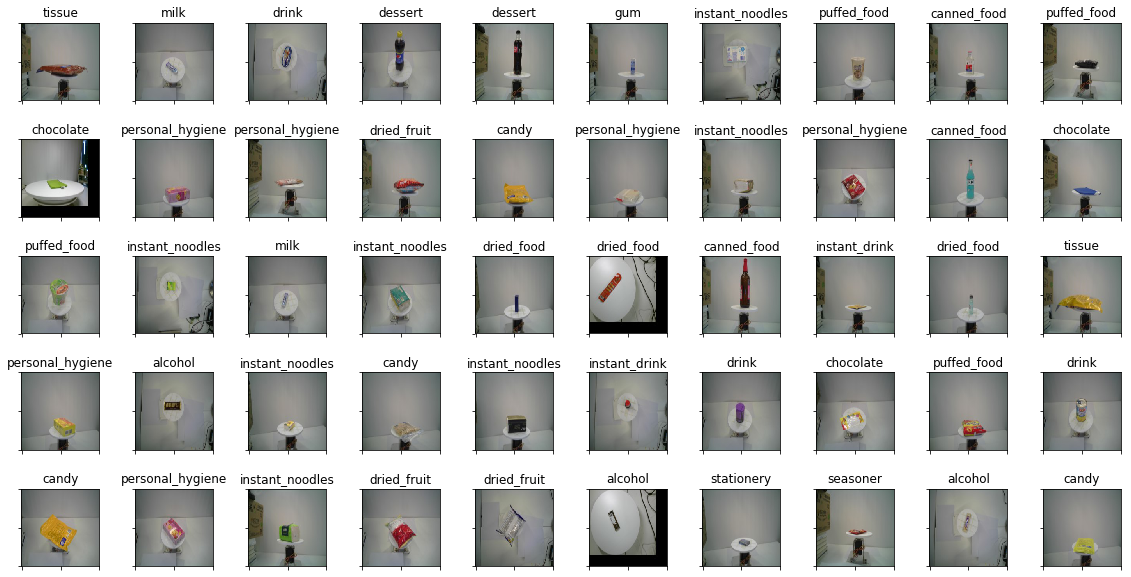

In [22]:
fig = plt.figure(figsize=(20,10))
for i in range(imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(imgs[i], interpolation="nearest")
    plt.subplots_adjust(hspace=0.5)
    ax.set_title(lab[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])